#### In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')

from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from io_functions import *
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *
import sklearn

Couldn't import dot_parser, loading of dot files will not be possible.


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from msm_resampled import *

In [3]:
%matplotlib inline

In [4]:
from detect_intermediates import *
from interpret_tICs import *

we are operating on biox3


In [5]:
from mor_h8_protein_ligand_feature_types import *
from get_variable_names import *
from mor_h8_protein_ligand_tica_config import *
from residue import Residue, Atom
from mor_h8_feature_types import feature_name_residues_dict


[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,

In [6]:
#feature_name = "bp_residues_4dkl_5c1m_restricted_pairs"
rho = 0.01
rho_string = "_rho0pt01-normalized"

feature_name = "bp_residues_4dkl_5c1m_restricted_pairs_10A"
#rho = 0.0025
#rho_string = "_rho0pt0025-normalized"

lag_time=50
n_clusters=1000
n_components=10

In [7]:
feature_name

'bp_residues_4dkl_5c1m_restricted_pairs_10A'

In [8]:
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
tica_dir = "%s-aromatic-binarize" %tica_dir
ori_tica_dir = copy.deepcopy(tica_dir)
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A
/home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A


In [9]:
all_ligand_features_dir = "%s-with-aromatic" %features_dir
if not os.path.exists(all_ligand_features_dir): os.makedirs(all_ligand_features_dir)

In [10]:
ligand_residue = Residue(resSeq=900, chain_id="L", res_name="LIG")

In [11]:
active_crystal = md.load_frame([t for t in get_trajectory_files(traj_dir, traj_ext) if "bu72" in t][0], index=0)
ligand = [r for r in active_crystal.topology.residues if "LIG" in str(r)][0]
ligand_atom_names = [a.name for a in ligand.atoms if "H" not in a.name]
print(ligand_atom_names)

[u'C6', u'C7', u'C8', u'C9', u'C10', u'C11', u'C23', u'C24', u'C25', u'C26', u'C27', u'C28', u'C1', u'C2', u'N1', u'C3', u'C4', u'C5', u'O1', u'C12', u'C13', u'N2', u'C14', u'O2', u'C15', u'C16', u'C17', u'C18', u'C19', u'C20', u'C21', u'C22']


In [12]:
#ligand_atom_names = ["N1", "O1", "C7", "C17", "O2", "N2", "C26"]
ligand_atoms = []
for atom_name in ligand_atom_names:
    ligand_atoms.append(Atom(resSeq=900, chain_id="L", atom_name=atom_name, res_name="LIG"))

In [13]:
user_specified_atom_residue_pairs = [x for x in itertools.product(ligand_atoms, bp_residue_objects)]
user_specified_atom_residue_pairs = [ContactFeature(pair[0], pair[1]) for pair in user_specified_atom_residue_pairs]

In [14]:
len(user_specified_atom_residue_pairs)

3040

In [15]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
protein_file = "/home/enf/md_simulations/MOR/mor_active_bu72_h8/ionized.pdb"
refined_atom_residue_pairs = compute_atom_residue_pairs_under_cutoff(ligand_atoms, bp_residue_objects, protein_file, cutoff=1., all_lig_atoms=True)

In [16]:
refined_atom_residue_pairs

[(LIG900-C6, CYS292),
 (LIG900-C6, TRP293),
 (LIG900-C6, THR294),
 (LIG900-C6, PRO295),
 (LIG900-C6, ILE296),
 (LIG900-C6, HIS297),
 (LIG900-C6, ILE298),
 (LIG900-C6, TYR299),
 (LIG900-C6, VAL300),
 (LIG900-C6, ILE301),
 (LIG900-C6, TRP318),
 (LIG900-C6, CYS321),
 (LIG900-C6, ILE322),
 (LIG900-C6, ALA323),
 (LIG900-C6, LEU324),
 (LIG900-C6, GLY325),
 (LIG900-C6, TYR326),
 (LIG900-C6, LEU232),
 (LIG900-C6, LEU219),
 (LIG900-C6, PHE237),
 (LIG900-C6, VAL236),
 (LIG900-C6, ALA240),
 (LIG900-C6, PHE241),
 (LIG900-C6, LYS233),
 (LIG900-C6, ILE144),
 (LIG900-C6, ASP147),
 (LIG900-C6, TYR148),
 (LIG900-C6, THR120),
 (LIG900-C6, GLN124),
 (LIG900-C6, MET151),
 (LIG900-C6, ASN150),
 (LIG900-C6, PHE152),
 (LIG900-C6, ILE155),
 (LIG900-C6, ILE198),
 (LIG900-C7, CYS292),
 (LIG900-C7, TRP293),
 (LIG900-C7, THR294),
 (LIG900-C7, PRO295),
 (LIG900-C7, ILE296),
 (LIG900-C7, HIS297),
 (LIG900-C7, ILE298),
 (LIG900-C7, TYR299),
 (LIG900-C7, VAL300),
 (LIG900-C7, ILE301),
 (LIG900-C7, TRP318),
 (LIG900-C

In [17]:
refined_atom_residue_pairs = [ContactFeature(pair[0], pair[1]) for pair in refined_atom_residue_pairs]
print(len(refined_atom_residue_pairs))


1023


In [19]:
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))

162


<AsyncMapResult: chdir>

In [18]:
import residue
reload(residue)
from residue import *
aromatic_features_dir = "%s/bu72_aromatic_features" %traj_dir
if not os.path.exists(aromatic_features_dir):
    os.makedirs(aromatic_features_dir)
aromatic_features_file = "%s/aromatic_features.dataset" %aromatic_features_dir
ring_dict = {}
bu72_ring_dict = {}
bu72_ring_dict["bu72_ring1"] = [Atom(atom_name=n, res_name="LIG") for n in ["C23", "C28", "C27", "C26", "C25", "C24"]]
bu72_ring_dict["bu72_ring2"] = [Atom(atom_name=n, res_name="LIG") for n in ["C6", "C11", "C10", "C9", "C8", "C7"]]
ring_dict["tyr326_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=326) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["tyr148_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=148) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["tyr128_ring"] = [Atom(atom_name=n, res_name="TYR", resSeq=128) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["phe289_ring"] = [Atom(atom_name=n, res_name="PHE", resSeq=289) for n in ["CG", "CD2", "CE2", "CZ", "CE1", "CD1"]]
ring_dict["trp293_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=293) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp293_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=293) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["trp133_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=133) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp133_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=133) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["trp318_ring1"] = [Atom(atom_name=n, res_name="TRP", resSeq=318) for n in ["CD2", "CE2", "CZ2", "CH2", "CZ3", "CE3"]]
ring_dict["trp318_ring2"] = [Atom(atom_name=n, res_name="TRP", resSeq=318) for n in ["CG", "CD1", "NE1", "CE2", "CD2"]]
ring_dict["his297_ring"] = [Atom(atom_name=n, res_name="HIS", resSeq=297) for n in ["ND1", "CE1", "NE2", "CD2", "CG"]]
ring_dict["his319_ring"] = [Atom(atom_name=n, res_name="HIS", resSeq=319) for n in ["ND1", "CE1", "NE2", "CD2", "CG"]]

cation = Atom(atom_name="N1", res_name="LIG")

In [19]:
bu72_ring_dict

{'bu72_ring1': [LIG-C23, LIG-C28, LIG-C27, LIG-C26, LIG-C25, LIG-C24],
 'bu72_ring2': [LIG-C6, LIG-C11, LIG-C10, LIG-C9, LIG-C8, LIG-C7]}

In [20]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *

import aromatic_featurizer
reload(aromatic_featurizer)
from aromatic_featurizer import *

In [21]:

pi_pi_ring_pairs = [(ring_dict["trp293_ring1"], ring_dict["phe289_ring"]), (ring_dict["trp293_ring2"], ring_dict["phe289_ring"])]
#ring_pairs = []
#for i, ring_i in enumerate(bu72_ring_dict.values()):
#    for j, ring_j in enumerate(ring_dict.values()):
#        pi_pi_ring_pairs.append((ring_i, ring_j))

for i, ring_i in enumerate(bu72_ring_dict.values()):
    for j, ring_j in enumerate(ring_dict.values()):
        pi_pi_ring_pairs.append((ring_i, ring_j))
cation_pi_pairs = [(cation, ring) for ring in ring_dict.values()]

In [ ]:
bu72_traj_files = [t for t in get_trajectory_files(traj_dir, traj_ext) if "bu72" in t]

compute_aromatic_features_wrapper(traj_dir, traj_ext, None, pi_pi_ring_pairs, cation_pi_pairs,
    aromatic_features_file, aromatic_features_dir, worker_pool=dview, 
    parallel=False, traj_files=bu72_traj_files)


In [22]:
aromatic_feature_objects = get_aromatic_feature_names(pi_pi_ring_pairs, cation_pi_pairs)
aromatic_names = [str(a) for a in aromatic_feature_objects]
aromatic_names

['TRP293-CD2 to PHE289-CG: Pi Parallel',
 'TRP293-CG to PHE289-CG: Pi Parallel',
 'LIG-C23 to TRP293-CG: Pi Parallel',
 'LIG-C23 to TRP293-CD2: Pi Parallel',
 'LIG-C23 to TRP318-CG: Pi Parallel',
 'LIG-C23 to TYR326-CG: Pi Parallel',
 'LIG-C23 to PHE289-CG: Pi Parallel',
 'LIG-C23 to HIS319-ND1: Pi Parallel',
 'LIG-C23 to TRP133-CG: Pi Parallel',
 'LIG-C23 to TRP133-CD2: Pi Parallel',
 'LIG-C23 to TYR148-CG: Pi Parallel',
 'LIG-C23 to TRP318-CD2: Pi Parallel',
 'LIG-C23 to TYR128-CG: Pi Parallel',
 'LIG-C23 to HIS297-ND1: Pi Parallel',
 'LIG-C6 to TRP293-CG: Pi Parallel',
 'LIG-C6 to TRP293-CD2: Pi Parallel',
 'LIG-C6 to TRP318-CG: Pi Parallel',
 'LIG-C6 to TYR326-CG: Pi Parallel',
 'LIG-C6 to PHE289-CG: Pi Parallel',
 'LIG-C6 to HIS319-ND1: Pi Parallel',
 'LIG-C6 to TRP133-CG: Pi Parallel',
 'LIG-C6 to TRP133-CD2: Pi Parallel',
 'LIG-C6 to TYR148-CG: Pi Parallel',
 'LIG-C6 to TRP318-CD2: Pi Parallel',
 'LIG-C6 to TYR128-CG: Pi Parallel',
 'LIG-C6 to HIS297-ND1: Pi Parallel',
 'TRP293-

In [ ]:
if not os.path.exists(features_dir): os.makedirs(features_dir)
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
import time
#time.sleep(60*120)
featurize_contacts_custom(traj_dir, features_dir = features_dir, traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, structures=[], contact_residues=[],
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs=user_specified_atom_residue_pairs, worker_pool=dview, excluded_trajs=["apo", "oxy", "bu"])

In [23]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
new_features_dir = "%s/reduced_features" %features_dir
if not os.path.exists(new_features_dir):
    os.makedirs(new_features_dir)
new_features_file = "%s/reduced_features.dataset" %new_features_dir
new_features_pkl = "%s/reduced_feature_names.pkl" %new_features_dir
#retain_features_within_range(features_dir, feature_residues_pkl, 0.66,
#                             0.01, new_features_file, new_features_pkl, worker_pool=dview)

In [24]:
with open(new_features_pkl) as f:
    new_feature_names = pickle.load(f)
    feature_residues = new_feature_names
print(new_feature_names)
print(len(new_feature_names))

[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, Lig900-C23 to Asp147, Lig900-C23 to Gln124, Lig900-C24 to Cys217, Lig900-C24 to Trp318, Lig900-C24 to Ile144, Lig900-C24 to Gln124, Lig900-C25 to Cys217, Lig900-C25 to Thr218, Lig900-C25 to Leu219, Lig900-C25 to Trp318, Lig900-C25 to

In [25]:
with open(feature_residues_pkl) as f:
    ori_feature_names = pickle.load(f)

In [26]:
all_features_df = pd.DataFrame(all_features_np, columns=[str(n) for n in ori_feature_names])

NameError: name 'all_features_np' is not defined

In [27]:
import pickle
reload(pickle)
with open(new_features_pkl, "rb") as f:
    feature_residues = pickle.load(f)
all_ligand_features_pkl = "%s/feature_names.pkl" %all_ligand_features_dir
all_ligand_feature_names = feature_residues + aromatic_names #[n for n in aromatic_names if "lig" in str(n).lower()]
all_ligand_feature_objects = feature_residues + aromatic_feature_objects #[n for n in aromatic_feature_objects if "lig" in str(n).lower()]
with open(all_ligand_features_pkl, "wb") as f:
    pickle.dump(all_ligand_feature_objects, f)
print(all_ligand_feature_objects)

[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, Lig900-C23 to Asp147, Lig900-C23 to Gln124, Lig900-C24 to Cys217, Lig900-C24 to Trp318, Lig900-C24 to Ile144, Lig900-C24 to Gln124, Lig900-C25 to Cys217, Lig900-C25 to Thr218, Lig900-C25 to Leu219, Lig900-C25 to Trp318, Lig900-C25 to

In [ ]:
all_contact_features = load_file(new_features_file)
all_contact_features = [sklearn.preprocessing.binarize(f, 0.5) for f in all_contact_features]
aromatic_features = load_file(aromatic_features_file)
indices = [i for i in range(0,len(aromatic_names)) if "lig" in str(aromatic_names[i]).lower()]
print(indices)
#all_ligand_features = [np.hstack([all_contact_features[i], aromatic_features[i][:,indices]]) for i in range(0,len(all_contact_features))]
all_ligand_features = [np.hstack([all_contact_features[i], aromatic_features[i]]) for i in range(0,len(all_contact_features))]

In [ ]:
#os.system("rm -rf %s" % tica_dir)
#lag_time = 5
#n_components = 5
#sparse = True
#wolf = True
#rho = 0.0025
#shrinkage = None
#traj_ext = ".h5"
import custom_tica
reload(custom_tica)
from custom_tica import *
fit_normalizer(features_dir, features=load_file(new_features_file))
#fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=False, features=load_file(new_features_file))
#fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True, partial_fit=False, features=load_file(new_features_file))
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=False, partial_fit=False, features=all_ligand_features)

In [ ]:
import custom_tica
reload(custom_tica)
from custom_tica import *
if not os.path.exists(ref_features_dir):
    os.makedirs(ref_features_dir)
transform(existing_model = projection_operator_dir, features_directory = ref_features_dir, tica_dir = ref_tica_dir, normalizer=verboseload("%s/normalizer.h5" %features_dir))

In [28]:
tica_object = verboseload(projection_operator_dir)
tica_object.timescales_

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_tica_coords.h5"...


array([ 649.02240559,  337.16501737,  258.96714347,  177.71034605,
        167.43702193,  142.3049199 ,  122.61217604,   89.33781567,
         79.285741  ,   71.39962496])

In [29]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_components_dir = tica_dir
#important_contact_features, all_tIC_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, new_features_pkl, n_tica_components=n_components, percentile=95)
important_contact_features, all_tIC_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, all_ligand_features_pkl, n_tica_components=n_components, percentile=95)

Interpreting tIC 1
feature_importances_df.shape
(8, 5)
residue_importances_df.shape
(13, 2)
           feature_name       res_i   res_j  importance               feature
5  Lig900-C15 To Gln124  Lig900-C15  Gln124    1.053971  Lig900-C15 to Gln124
4  Lig900-C15 To Cys321  Lig900-C15  Cys321   -0.432531  Lig900-C15 to Cys321
3   Lig900-O2 To Gln124   Lig900-O2  Gln124    0.404973   Lig900-O2 to Gln124
7  Lig900-C21 To Thr120  Lig900-C21  Thr120    0.335677  Lig900-C21 to Thr120
2   Lig900-C5 To Gly325   Lig900-C5  Gly325   -0.235047   Lig900-C5 to Gly325
6  Lig900-C17 To Gly325  Lig900-C17  Gly325   -0.232325  Lig900-C17 to Gly325
1   Lig900-C3 To Ala117   Lig900-C3  Ala117   -0.190728   Lig900-C3 to Ala117
0  Lig900-C27 To Trp133  Lig900-C27  Trp133    0.156538  Lig900-C27 to Trp133
Using dark_background
               residue  importance
Gln124          Gln124    1.021521
Lig900-C15  Lig900-C15    0.979646
Cys321          Cys321   -0.432531
Lig900-O2    Lig900-O2    0.404973
Thr120   

In [30]:
tic_subsampled_features_file= "%s/features_subsampled.pkl" % tica_dir



In [31]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

print tic_subsampled_features_file
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features, feature_residues)
#subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file, features=load_file(new_features_file))

/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/features_subsampled.pkl


TypeError: 'AromaticFeature' object is not iterable

In [34]:
tica_coords = verboseload(projected_features_dir)
print(np.shape(np.concatenate(tica_coords)))

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
(248499, 10)


In [ ]:
import analysis
reload(analysis)
from analysis import *
plot_columns(tica_dir, projected_features_dir, titles = ["bu72_tIC%d" %j for j in range(1,11)], tICA = True, scale = 1.0, refcoords_file = None)

In [35]:
bu72_trajs = []
apo_trajs = []
suf_trajs = []

bu72_reseeded_trajs = []
bu72_ori_trajs = []
apo_reseeded_trajs = []
apo_ori_trajs = []
suf_ori_trajs = []
suf_reseeded_trajs = []
#trajs = [t for t in get_trajectory_files(traj_dir, traj_ext) if "apo_reimaged" not in t and "oxy" not in t]
trajs = [t for t in get_trajectory_files(traj_dir, traj_ext)]
for i, traj in enumerate(trajs):
    if "bu72" in traj:
        bu72_trajs.append(i)
        if "reseeded" in traj:
            bu72_reseeded_trajs.append(i)
        else:
            bu72_ori_trajs.append(i)
    elif "apo" in traj:
        apo_trajs.append(i)
        if "reseeded" in traj:
            apo_reseeded_trajs.append(i)
        else:
            apo_ori_trajs.append(i)
    elif "suf" in traj:
        suf_trajs.append(i)
        if "reseeded" in traj:
            suf_reseeded_trajs.append(i)
        else:
            suf_ori_trajs.append(i)

user_defined_coords = load_file(user_defined_features_file)

            

loading /home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/user_defined_features.h5"...


In [36]:
#pp_tica_dir = "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t5_n_components5all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt0025"
pp_tica_dir = "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup"

In [37]:
protein_tica_file = "%s/phi_psi_chi2_allprot_projected.h5" %pp_tica_dir
protein_tica = verboseload(protein_tica_file)
protein_tica_bu72 = [protein_tica[i] for i in bu72_trajs]

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/phi_psi_chi2_allprot_projected.h5"...


In [33]:
plt.clf()
plt.hist([t.shape[0] for t in protein_tica], bins=5)
plt.xlabel("Simulation length, ns")
plt.title("Histogram of simulation length")
hist_fig_file = "%s/simulation_length_histogram.png" %traj_dir
plt.savefig(hist_fig_file)

In [34]:
len(protein_tica)

1778

In [35]:
print(np.sum([protein_tica[i].shape[0] for i in bu72_ori_trajs]))
print(np.sum([protein_tica[i].shape[0] for i in apo_ori_trajs]))
print(np.sum([protein_tica[i].shape[0] for i in suf_ori_trajs]))
print(np.sum([protein_tica[i].shape[0] for i in bu72_reseeded_trajs]))
print(np.sum([protein_tica[i].shape[0] for i in apo_reseeded_trajs]))
print(np.sum([protein_tica[i].shape[0] for i in suf_reseeded_trajs]))
print(np.sum([t.shape[0] for t in protein_tica]))


102705
115839
105298
145794
119620
166723
755979


In [38]:
protein_tica_bu72_conc = np.concatenate(protein_tica_bu72)
ligand_tica_bu72_conc =  np.concatenate(verboseload(projected_features_dir))

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...


In [33]:
import plots
reload(plots)
from plots import *

#plot_data_vs_data(protein_tica_bu72_conc, ligand_tica_bu72_conc, ["mOR_tIC%d" %i for i in range(1,n_components+1)], ["bu72_tIC%d" %i for i in range(1,n_components+1)], analysis_dir)

In [ ]:
n_clusters = 1000
clusterer_dir = "%s/bu72clusterer_%dclusters.h5" % (tica_dir, n_clusters)
cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters, clusterer_dir)

In [ ]:
import custom_msm
reload(custom_msm)
from custom_msm import *
plot_timescales(clusterer_dir, n_clusters, tica_dir, main="", lag_times=list(range(1,51,10)))

In [ ]:
lag_time = 30
msm_model_dir = "%s/msm_lag_time%d.h5" % (tica_dir, lag_time)
if not os.path.exists(msm_model_dir):
    build_msm(clusterer_dir, lag_time=lag_time, msm_model_dir=msm_model_dir)
bu72_msm = verboseload(msm_model_dir)

In [ ]:
'%s/bu72_clusterer1000.h5' %pp_tica_dir

In [39]:
pp_msm_lag_time=25
pp_n_clusters = 1500
prior_counts = 10.
bu72_pp_resampled_traj_to_frames_file = "%s/bu72_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_resampled_traj_to_frames = verboseload(bu72_pp_resampled_traj_to_frames_file)
bu72_pp_msm_file = "%s/bu72_msm_lag-time%d_prior-counts0.0_clusters%d.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_msm = verboseload(bu72_pp_msm_file)
bu72_pp_clusterer_file ='%s/bu72_clusterer%d.h5' %(pp_tica_dir, pp_n_clusters)
bu72_pp_clusterer = verboseload(bu72_pp_clusterer_file)
bu72_pp_clusters_map = make_clusters_map(bu72_pp_clusterer)
bu72_pp_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %pp_tica_dir
bu72_pp_tic_components_dir = "%s" %pp_tica_dir
bu72_pp_tica_dir = bu72_pp_tic_components_dir
bu72_pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
pp_tic_subsampled_features = "%s/features_subsampled.pkl" %pp_tica_dir
bu72_pp_tica = verboseload("%s/bu72_tica_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters))
bu72_pp_pnas_file = "%s/bu72_pnas_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
bu72_pp_pnas = verboseload(bu72_pp_pnas_file)
bu72_pp_ref_tica = "%s/reference_receptors/refcoords.csv" %pp_tica_dir
bu72_pp_ref_features_dir = '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors'

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time25_prior-counts0.0_clusters1500_resampled_20000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_msm_lag-time25_prior-counts0.0_clusters1500.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_clusterer1500.h5"...
0
429
0
0
1
438
0
0
89
651
17
237
418
151
16
0
184
323
350
429
1
1480
0
650
0
310
27
11
0
58
167
20
37
3
663
136
20
10
0
144
0
507
54
1474
5
372
0
30
822
0
11
674
0
298
1
3
0
0
0
1122
0
0
82
15
0
239
0
511
966
1069
0
450
460
312
0
0
0
313
0
39
0
73
296
4
220
0
82
953
0
0
376
212
299
0
5
37
1637
155
1326
796
0
339
0
16
289
53
1
14
427
30
744
11

In [40]:
pp_msm_lag_time=25
pp_n_clusters = 1500
apo_pp_resampled_traj_to_frames_file = "%s/apo_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_resampled_traj_to_frames = verboseload(apo_pp_resampled_traj_to_frames_file)
apo_pp_msm_file = "%s/apo_msm_lag-time%d_prior-counts0.0_clusters%d.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_msm = verboseload(apo_pp_msm_file)
apo_pp_clusterer = verboseload('%s/apo_clusterer%d.h5' %(pp_tica_dir, pp_n_clusters))
apo_pp_clusters_map = make_clusters_map(apo_pp_clusterer)
apo_pp_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %pp_tica_dir
apo_pp_tic_components_dir = "%s" %pp_tica_dir
apo_pp_tica_dir = apo_pp_tic_components_dir
apo_pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
pp_tic_subsampled_features = "%s/features_subsampled.pkl" %pp_tica_dir
apo_pp_tica = verboseload("%s/apo_tica_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters))
apo_pp_pnas_file = "%s/apo_pnas_msm_lag-time%d_prior-counts0.0_clusters%d_resampled_20000.h5" %(pp_tica_dir, pp_msm_lag_time, pp_n_clusters)
apo_pp_pnas = verboseload(apo_pp_pnas_file)
apo_pp_ref_tica = "%s/reference_receptors/refcoords.csv" %pp_tica_dir
apo_pp_ref_features_dir = '/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/reference_receptors'

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_msm_lag-time25_prior-counts0.0_clusters1500_resampled_20000.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_msm_lag-time25_prior-counts0.0_clusters1500.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_clusterer1500.h5"...
1
123
393
46
0
1
497
100
160
9
59
0
391
392
7
0
21
817
0
0
1
1284
7
262
184
269
264
20
0
974
2
58
218
104
84
161
27
52
0
1083
153
1812
64
355
261
0
106
20
313
1
235
434
260
343
0
2
131
1
110
973
113
0
1
112
53
0
169
0
1004
182
416
48
161
776
0
0
2
485
0
8
0
33
242
9
253
1
0
95
0
460
7
656
45
0
251
35
0
1
641
0
178
312
0
0
3
615
0
6
458
83
117
83


In [41]:
pp_analysis_dir = "%s-%sclusters_%dlag-time" %(analysis_dir, pp_n_clusters,pp_msm_lag_time)
analysis_dir = pp_analysis_dir
if not os.path.exists(analysis_dir):
    os.makedirs(analysis_dir)

In [42]:
ref_receptors_dir = "/home/enf/md_simulations/MOR/bu72_ref_receptors" 
ref_features_dir = "%s/bu72_ref_receptors" %features_dir
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
featurize_contacts_custom(ref_receptors_dir, features_dir = ref_features_dir, traj_ext = ".pdb", contact_residue_pairs_file = new_features_pkl, structures=[], contact_residues=[],
                          residues_map = None, contact_cutoff = cutoff, parallel = False, exacycle = exacycle, traj_top_structure = None, iterative=False,
                          user_specified_atom_residue_pairs = new_feature_names, worker_pool=None, schemes=[])

pp_n_components=10
def get_features(features_dir):
    feature_files = get_trajectory_files(features_dir, ".dataset")
    features = np.vstack([load_file(f) for f in feature_files])
    print(features.shape)
    return features

pp_feature_residues_pkl = "/home/enf/md_simulations/MOR/h8_reimaged/featuresall_residues_4dkl_5c1m_under_cutoff6A-CA/feature_residues.pkl"
with open(pp_feature_residues_pkl) as f:
    pp_feature_residues = pickle.load(f)
with open(new_features_pkl) as f:
    lp_feature_residues = pickle.load(f)

ref_pp_features = pd.DataFrame(get_features(bu72_pp_ref_features_dir), columns=[str(f) for f in pp_feature_residues])
ref_lp_features = pd.DataFrame(get_features(ref_features_dir), columns=[str(f) for f in lp_feature_residues])
ref_pp_tica = pd.read_csv(bu72_pp_ref_tica, header=None)
ref_pp_tica.columns = ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]

#ref_lp_tica = pd.read_csv(ref_tica_coords, header=None)
#ref_lp_tica.columns=["BU72 tIC.%d" %i for i in range(1,n_components+1)]

ref_pnas = load_file("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/ref_coords.h5")
ref_pnas = np.hstack([np.array(x).T for x in ref_pnas])

ref_pnas = pd.DataFrame(ref_pnas, columns=sorted(feature_name_residues_dict.keys()))

ref_features = pd.concat([ref_pp_features*10., ref_pp_tica, ref_lp_features*10., ref_pnas], axis=1)

already featurized
already featurized
dihedral_residues:
[]
There are 158 features to be used in featurization.
Saving contact feature residue pairs to disk.
About to featurize trajectories based on the chosen featurization scheme.
[Lig900-C6 to Gly325, Lig900-C6 to Met151, Lig900-C6 to Trp293, Lig900-C6 to Ile296, Lig900-C7 to His297, Lig900-C7 to Val300, Lig900-C7 to Gly325, Lig900-C7 to Met151, Lig900-C7 to Val236, Lig900-C7 to Trp293, Lig900-C7 to Ile296, Lig900-C8 to His297, Lig900-C8 to Val300, Lig900-C8 to Gly325, Lig900-C8 to Met151, Lig900-C8 to Val236, Lig900-C8 to Trp293, Lig900-C8 to Ile296, Lig900-C9 to His297, Lig900-C9 to Val300, Lig900-C9 to Tyr148, Lig900-C9 to Met151, Lig900-C9 to Lys233, Lig900-C9 to Val236, Lig900-C9 to Trp293, Lig900-C9 to Ile296, Lig900-C10 to His297, Lig900-C10 to Val300, Lig900-C10 to Tyr148, Lig900-C10 to Met151, Lig900-C10 to Val236, Lig900-C10 to Ile296, Lig900-C11 to Tyr148, Lig900-C11 to Met151, Lig900-C11 to Ile296, Lig900-C23 to Ile144, L

In [43]:
tica_coords = verboseload(projected_features_dir)
bu72_pnas_file = "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"
apo_pnas_file = "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"
bu72_pnas = verboseload(bu72_pnas_file)
apo_pnas = verboseload(apo_pnas_file)
bu72_tica_file = '%s/bu72_tica.h5' %pp_tica_dir
apo_tica_file = "%s/apo_tica.h5" %pp_tica_dir
bu72_tica = verboseload(bu72_tica_file)
apo_tica = verboseload(apo_tica_file)

bu72_aromatic = load_file(aromatic_features_file)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/apo.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/bu72_tica.h5"...
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/apo_tica.h5"...
loading /home/enf/md_simulations/MOR/h8_reimaged/trajectories/bu72_aromatic_features/aromatic_features.dataset


In [44]:
pp_n_components = 10
bu72_pnas_dfs = []
for array in bu72_pnas:
    bu72_pnas_dfs.append(pd.DataFrame(array, columns=sorted(feature_name_residues_dict.keys())))
bu72_tica_dfs = []
for array in bu72_tica:
    bu72_tica_dfs.append(pd.DataFrame(array, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]))
lp_tica_dfs = []
for array in tica_coords:
    lp_tica_dfs.append(pd.DataFrame(array, columns=["bu72 tIC.%d" %i for i in range(1,n_components+1)]))
bu72_feature_dfs = []
bu72_features = load_file(new_features_file)
print("loaded bu72 features")
for array in bu72_features:
    bu72_feature_dfs.append(pd.DataFrame(array*10., columns=[str(f) for f in new_feature_names]))

bu72_pi_dfs = []
for array in bu72_aromatic:
    bu72_pi_dfs.append(pd.DataFrame(array, columns=aromatic_names))
new_bu72_feature_dfs = []
for i in range(0, len(bu72_pi_dfs)):
    new_bu72_feature_dfs.append(pd.concat([bu72_pi_dfs[i], bu72_feature_dfs[i]], axis=1))
bu72_feature_dfs = new_bu72_feature_dfs
    
pp_n_components = 10
apo_pnas_dfs = []
for array in apo_pnas:
    apo_pnas_dfs.append(pd.DataFrame(array, columns=sorted(feature_name_residues_dict.keys())))
apo_tica_dfs = []
for array in apo_tica:
    apo_tica_dfs.append(pd.DataFrame(array, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]))
tica_dfs = []
for array in tica_coords:
    tica_dfs.append(pd.DataFrame(array, columns=["apo tIC.%d" %i for i in range(1,n_components+1)]))



loading /home/enf/md_simulations/MOR/h8_reimaged/featuresbp_residues_4dkl_5c1m_restricted_pairs_10A/reduced_features/reduced_features.dataset
loaded bu72 features


In [45]:
bu72_pnas = verboseload("/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5")
cluster_pnas_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, bu72_pnas)
cluster_pnas_averages = pd.DataFrame(cluster_pnas_averages, columns=sorted(feature_name_residues_dict.keys()))
active_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_active"] > 0.2) & (cluster_pnas_averages["rmsd_npxxy_active"] < 0.25) & (cluster_pnas_averages["tm6_tm3_packing"] > 12.75) & (cluster_pnas_averages["tm6_tm3_packing"] < 13.25)]
inactive_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_inactive"] < 0.4) & (cluster_pnas_averages["rmsd_npxxy_inactive"] > 0.3) & (cluster_pnas_averages["tm6_tm3_packing"] > 8.0) & (cluster_pnas_averages["tm6_tm3_packing"] < 9.5)]
print(active_clusters.index.values)
print(inactive_clusters.index.values)



loading "/home/enf/md_simulations/MOR/h8_reimaged/all_pnas_features/bu72.h5"...
[   1    5   13   17   34   37   41   47   48   59   91   95  101  108  116
  147  166  179  181  191  199  200  201  227  246  251  256  262  267  269
  280  282  288  302  312  315  317  326  332  352  354  386  393  430  461
  471  473  474  476  489  515  518  520  568  585  586  597  606  628  651
  658  659  660  667  668  675  676  689  694  695  724  728  743  747  790
  805  811  814  828  831  841  860  863  874  875  880  881  884  893  894
  899  905  929  935  945  948  952  957  962  964  972  974  983 1008 1014
 1023 1072 1091 1097 1100 1112 1141 1144 1145 1153 1154 1178 1180 1185 1188
 1199 1201 1204 1214 1266 1293 1299 1302 1352 1397 1418 1421 1438 1451 1452
 1466 1484 1497]
[  86  313  481  587  713  779  915 1012 1082 1357 1471]


/home/enf/software/anaconda/lib/python2.7/site-packages/numpy-1.11.0-py2.7-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [46]:
cluster_tica_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, bu72_tica)
cluster_tica_averages = pd.DataFrame(cluster_tica_averages, columns=["tIC.%d" %i for i in range(1, pp_n_components+1)])
cluster_tica_pnas = pd.concat([cluster_pnas_averages, cluster_tica_averages], axis=1).dropna()
#set(cluster_tica_averages.loc[cluster_tica_averages["tIC.4"] > 0.].index.values.tolist()).intersection(set(active_clusters.index.values.tolist()))
#cluster_tica_pnas.loc[cluster_tica_pnas["tIC.5"] > 5.]

In [47]:
intermediate_actives = cluster_tica_averages.loc[(cluster_tica_averages["tIC.2"] > 0.7) & (cluster_tica_averages["tIC.2"] < 1.2) & (cluster_tica_averages["tIC.5"] > 0.) & (cluster_tica_averages["tIC.2"] > 0.8)].index.values
msm_intermediate_actives = bu72_pp_msm.partial_transform(intermediate_actives)[0]
order = np.argsort(bu72_pp_msm.populations_[msm_intermediate_actives])
print(bu72_pp_msm.populations_[msm_intermediate_actives][order])
print(intermediate_actives)
print(intermediate_actives[order])


[  2.76032805e-06   5.32125065e-06   6.28709659e-06   6.76989713e-06
   8.44499442e-06   1.80262608e-05   2.20672675e-05   2.38091084e-05
   4.88749825e-05   5.14619853e-05   2.04819080e-04   4.07663740e-04
   3.51605162e-03   3.93374232e-02   6.43855750e-02]
[  18   99  104  131  160  186  190  293  307  313  336  346  358  431  442
  460  462  481  539  541  555  587  599  601  644  680  713  726  745  758
  762  767  779  837  915  916  966  989 1012 1050 1082 1102 1104 1129 1142
 1148 1156 1160 1190 1194 1212 1242 1247 1259 1323 1357 1419 1464 1465 1467
 1471]
[431 336 160 293 307 131 190 358 346 442 104 186 313  18  99]


In [48]:
#ligand_top_features = load_file(tic_subsampled_features_file)
protein_top_features = load_file(pp_tic_subsampled_features)
protein_top_features_apo = [protein_top_features[i]*10. for i in apo_trajs]
protein_top_features_bu72 = [protein_top_features[i]*10. for i in bu72_trajs]



loading /home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/features_subsampled.pkl


In [49]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
bu72_pp_all_features, bu72_pp_tIC_features = interpret_tIC_components(bu72_pp_projection_operator_dir, bu72_pp_tic_components_dir, bu72_pp_feature_residues_pkl, n_tica_components=n_components, percentile=95)

Interpreting tIC 1
feature_importances_df.shape
(5, 5)
residue_importances_df.shape
(6, 2)
           feature_name     res_i     res_j  importance               feature
2  Val66_Ca To Ile69_Ca  Val66_Ca  Ile69_Ca    0.716698  VAL66_CA to ILE69_CA
4  Val66_Ca To Ile71_Ca  Val66_Ca  Ile71_Ca   -0.487056  VAL66_CA to ILE71_CA
3  Thr67_Ca To Ile71_Ca  Thr67_Ca  Ile71_Ca    0.332113  THR67_CA to ILE71_CA
0        Val66 To Thr70     Val66     Thr70    0.258456        VAL66 to THR70
1  Thr67_Ca To Ile69_Ca  Thr67_Ca  Ile69_Ca   -0.229829  THR67_CA to ILE69_CA
Using dark_background
           residue  importance
Ile69_Ca  Ile69_Ca    0.669372
Val66_Ca  Val66_Ca    0.656510
Thr67_Ca  Thr67_Ca    0.304016
Ile71_Ca  Ile71_Ca    0.291155
Thr70        Thr70    0.258456
Val66        Val66    0.258456
Using dark_background
Interpreting tIC 2
feature_importances_df.shape
(1, 5)
residue_importances_df.shape
(2, 2)
      feature_name   res_i  res_j  importance          feature
0  Phe338 To Phe84  Phe338

In [50]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
sources = [bu72_pp_msm.mapping_[i] for i in active_clusters.index.values if i in bu72_pp_msm.mapping_.keys()]
sinks = [bu72_pp_msm.mapping_[i] for i in inactive_clusters.index.values if i in bu72_pp_msm.mapping_.keys()]
print(sources)
print(sinks)
bu72_pp_tpt_paths_file = "%s/bu72_clusterer1000_tpt_paths.h5" %pp_tica_dir
tpt_paths, inv_tpt_paths, _ = generate_tpt_traj_index_series(bu72_pp_msm, sources=sources, sinks=sinks, clusters_map=bu72_pp_clusters_map, num_paths=10, remove_path = 'subtract', save_file=bu72_pp_tpt_paths_file)

[0, 2, 8, 11, 25, 28, 30, 35, 36, 42, 61, 64, 69, 75, 82, 100, 110, 117, 119, 124, 129, 130, 131, 148, 158, 163, 167, 171, 175, 176, 184, 186, 187, 193, 201, 204, 205, 211, 216, 231, 232, 252, 259, 285, 307, 312, 314, 315, 317, 326, 341, 343, 344, 376, 390, 391, 399, 406, 420, 435, 438, 439, 440, 444, 445, 449, 450, 458, 461, 462, 485, 488, 501, 504, 537, 547, 550, 553, 560, 562, 568, 576, 579, 587, 588, 591, 592, 595, 599, 600, 603, 607, 624, 630, 637, 639, 641, 645, 649, 656, 658, 662, 677, 681, 689, 723, 737, 743, 746, 757, 777, 780, 781, 786, 787, 806, 808, 812, 815, 824, 826, 828, 835, 869, 888, 892, 894, 928, 962, 979, 981, 989, 998, 999, 1009, 1021, 1029]
[58, 202, 319, 392, 477, 528, 614, 679, 731, 931, 1013]
([array([110, 816, 282, 512, 725,  58]), array([216, 816, 282,  68, 308, 477]), array([285, 113, 616, 430, 319]), array([591, 816, 282, 528]), array([ 285,  442,  680,  813, 1030,  430,  319]), array([285, 977, 885, 616, 430, 319]), array([658, 113, 885, 467, 616, 471, 430

In [ ]:
inv_tpt_paths

In [ ]:
tm6_out_clusters = cluster_pnas_averages.loc[cluster_pnas_averages["tm6_tm3_packing"] > 12.75].index.values
sources = [bu72_pp_msm.mapping_[i] for i in tm6_out_clusters if i in bu72_pp_msm.mapping_.keys()]
sinks = copy.deepcopy(sources)
bu72_pp_tpt_paths_file = "%s/bu72_clusterer1000_tm6_out_tpt_paths.h5" %pp_tica_dir
tm6_tpt_paths, tm6_inv_tpt_paths, _ = generate_tpt_traj_index_series(bu72_pp_msm, sources=sources, sinks=sinks, clusters_map=bu72_pp_clusters_map, num_paths=5, remove_path = 'subtract', save_file=bu72_pp_tpt_paths_file)

In [ ]:
sources

In [ ]:
#random.choice(active_clusters.index.values.tolist())

In [ ]:
active_clusters = cluster_pnas_averages.loc[(cluster_pnas_averages["rmsd_npxxy_active"] > 0.2) & (cluster_pnas_averages["rmsd_npxxy_active"] < 0.25) & (cluster_pnas_averages["tm6_tm3_packing"] > 12.75) & (cluster_pnas_averages["tm6_tm3_packing"] < 13.25) & (cluster_features_averages["Lig900-N1 to Asp147"] < 2.8) & (cluster_features_averages["Lig900-C25 to Trp133"] < 6.)]
active_clusters


In [156]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
n_steps = 100000
save_file = "%s/msm1000_clusters_t%d_%d_steps_1.h5" % (bu72_pp_tica_dir, 25, n_steps)
if not os.path.exists(save_file):
    msm_traj_index_pairs = generate_msm_traj_index_series(bu72_pp_msm, random.choice(active_clusters.index.values.tolist()), n_steps, bu72_pp_clusters_map, save_file)
else:
    msm_traj_index_pairs = verboseload(save_file)

ERROR! Session/line number was not unique in database. History logging moved to new session 1026
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10all_residues_4dkl_5c1m_under_cutoff6A-CA_regularization_wolf_autoShrinkage0pt05-backup/msm1000_clusters_t25_100000_steps_1.h5"...


In [157]:
#lig_features = list(set([str(g) for l in all_tIC_features for g in l]))
#prot_features = list(set([str(g) for l in bu72_pp_tIC_features for g in l]))
#f0 = pd.concat([f*10. for f in ligand_top_features], axis=0)
#f0 = pd.concat([f*10. for f in ligand_top_features], axis=0)
#f1 = pd.concat([f*10. for f in protein_top_features_bu72], axis=0)
#f2 = pd.concat([f for f in bu72_tica_dfs])
#f3 = pd.concat([f for f in bu72_pnas_dfs])
#prot_lig_features = pd.concat([f0,f1,f2,f3],axis=1)
all_traj_features = [pd.concat([bu72_feature_dfs[i], protein_top_features_bu72[i], bu72_tica_dfs[i], bu72_pnas_dfs[i]], axis=1) for i in range(0, len(bu72_tica_dfs))]

protein_ligand_msm_featurized = resample_features_by_msm_trajectory(all_traj_features, msm_traj_index_pairs)

we are operating on biox3


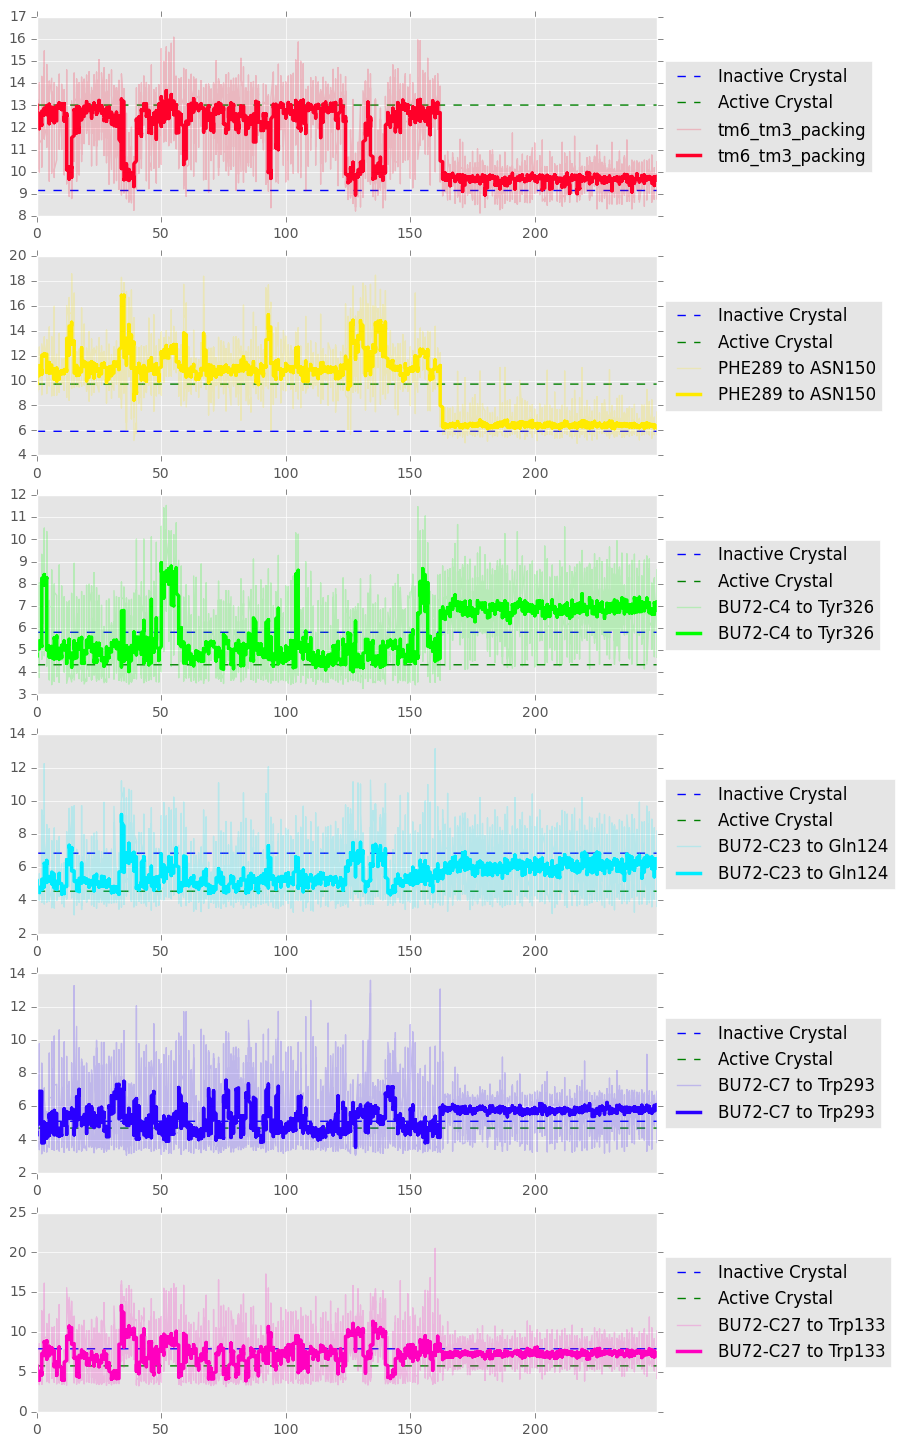

In [186]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
plmf = copy.deepcopy(protein_ligand_msm_featurized)
smoothing=25
names = plmf.columns.values.tolist()
for i, name in enumerate(names):
    if "LIG" in str(name):
        names[i] = "BU72" + name[3:]
    if "Lig900" in str(name):
        names[i] = "BU72" + name[6:]
plmf.columns = names
plmf.index = (plmf.index.values * pp_msm_lag_time) / 1000

names = ref_features.columns.values.tolist()
for i, name in enumerate(names):
    if "LIG" in str(name):
        names[i] = "BU72" + name[3:]
    if "Lig900" in str(name):
        names[i] = "BU72" + name[6:]
new_ref_df = copy.deepcopy(ref_features)
new_ref_df.columns=names


pp_lp_features = ["tm6_tm3_packing", "PHE289 to ASN150", "BU72-C4 to Tyr326", "BU72-C23 to Gln124", "BU72-C7 to Trp293", "BU72-C27 to Trp133"]
#plot_features = plmf[["tm6_tm3_packing", "PHE338 to PHE84", "PHE289 to ASN150", "TRP293 to ALA240", "HIS319_CA to TYR75_CA", "TYR336 to ASP114",  "BU72-N1 to Tyr326", "BU72-C25 to Trp133", "BU72-C23 to Gln124", "BU72-C26 to Leu219"]]
plot_features = plmf[pp_lp_features]

plot_df_rolling(plot_features.iloc[:10000], "%s/key_measurements_pp_lp_rainbow.png" %(analysis_dir), True, smoothing=smoothing, include_original=True, subplots=True, min_periods=None, ref_df=new_ref_df, color="rainbow")
plt.show()

In [184]:
"%s/key_measurements_pp_lp_rainbow.png" %(analysis_dir)

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/key_measurements_pp_lp_rainbow.png'

In [168]:
range(0., 0.3, 5)

TypeError: range() integer end argument expected, got float.

In [188]:
"%s/key_measurements_tIC5_3.png" %(analysis_dir)

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/key_measurements_tIC5_3.png'

In [ ]:
[n for n in ref_features.columns.values.tolist() if "Lig" in n]

In [ ]:
names

In [ ]:
all_features_conc = pd.concat(all_traj_features, axis=0)

In [ ]:
data = all_features_conc.loc[(all_features_conc[ 'TRP293-CD2 to PHE289-CG: Pi T'] == 1.) | (all_features_conc['TRP293-CG to PHE289-CG: Pi T'] == 1.)]["PHE289 to ASN150"].values
print(data.shape)
plt.hist(data, bins=100)
plt.show()

In [ ]:
plt.hist(all_features_conc.loc[(all_features_conc[ 'TRP293-CD2 to PHE289-CG: Pi T'] == 0.) & (all_features_conc['TRP293-CG to PHE289-CG: Pi T'] == 0.)]["PHE289 to ASN150"].values, bins=100)
plt.show()

In [51]:
projected_features = verboseload(projected_features_dir)
tica_resampled_file = os.path.join(tica_dir, "tica_msm_lag-time%d_clusters%d_resampled.h5" %(lag_time, n_clusters))
resample_features_by_msm_equilibirum_pop(projected_features, bu72_pp_resampled_traj_to_frames, tica_resampled_file)
tica_resampled = verboseload(tica_resampled_file)
#plot_columns(tica_dir, tica_resampled_file, titles = ["tIC.%d" %i for i in range(1,n_components+1)], main = "mOR_bu72_BP_MSM_", tICA = False, scale = 1.0, refcoords_file = None, axes=None, concatenate=False, reshape=True)

bu72_pp_resampled_traj_index_pairs = []
for traj in bu72_pp_resampled_traj_to_frames.keys():
    [bu72_pp_resampled_traj_index_pairs.append((traj, frame)) for frame in bu72_pp_resampled_traj_to_frames[traj]]

apo_pp_resampled_traj_index_pairs = []
for traj in apo_pp_resampled_traj_to_frames.keys():
    [apo_pp_resampled_traj_index_pairs.append((traj, frame)) for frame in apo_pp_resampled_traj_to_frames[traj]]

def create_features_eq_df(resampled_traj_index_pairs, feature_dfs, protein_top_features, ligand_top_features, pp_tica_resampled, ligand_tica_resampled, pp_pnas):
    all_dfs = []
    pp_features_eq = resample_features_by_msm_trajectory(protein_top_features, resampled_traj_index_pairs)
    all_dfs.append(pp_features_eq)
    if ligand_top_features is not None:
        ligand_features_eq = resample_features_by_msm_trajectory(ligand_top_features, resampled_traj_index_pairs)
        all_dfs.append(ligand_features_eq)
    pp_tica_eq = pd.DataFrame(pp_tica_resampled, columns=["mOR tIC.%d" %i for i in range(1,pp_n_components+1)])
    all_dfs.append(pp_tica_eq)
    if ligand_tica_resampled is not None:
        ligand_tica_eq = pd.DataFrame(ligand_tica_resampled, columns=["bu72 tIC.%d" %i for i in range(1,n_components+1)])
        all_dfs.append(ligand_tica_eq)
    pnas_eq = pd.DataFrame(pp_pnas, columns=sorted(feature_name_residues_dict.keys()))
    all_dfs.append(pnas_eq)
    features_eq = pd.concat(all_dfs, axis=1)
    features_eq.columns = [str(f) for f in features_eq.columns.values.tolist()]
    return features_eq

features_eq = create_features_eq_df(bu72_pp_resampled_traj_index_pairs, bu72_feature_dfs, protein_top_features_bu72, bu72_feature_dfs, bu72_pp_tica, tica_resampled, bu72_pp_pnas)
apo_features_eq = create_features_eq_df(apo_pp_resampled_traj_index_pairs, None, protein_top_features_apo, None, apo_pp_tica, None, apo_pp_pnas)

loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/phi_psi_chi2_allprot_projected.h5"...
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/tica_msm_lag-time50_clusters1000_resampled.h5"... (<type 'numpy.ndarray'>)
loading "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/tica_msm_lag-time50_clusters1000_resampled.h5"...


In [ ]:
import sklearn
lig_names = bu72_feature_dfs[0].columns.values.tolist()
a = features_eq[lig_names].values
print(a.shape)
b = features_eq[aromatic_names].values
print(b.shape)
x = np.nan_to_num(np.hstack([a, b]))
pm = compute_pearson_matrix(x, features_eq[["tm6_tm3_packing", "PHE289 to ASN150"]].values)
print(x.shape)
pmdf = pd.DataFrame(pm, columns=["a" , "b"], index=(lig_names+aromatic_names))
pmdf["a"].loc[[n for n in pmdf.index.values.tolist() if "trp" in n.lower() or "tyr" in n.lower() or "phe" in n.lower() or "his" in n.lower()]].dropna().sort(ascending=False,inplace=False)

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

(9315,)


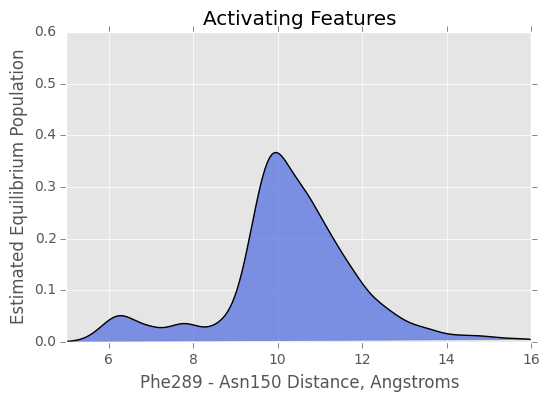

In [320]:
activating_features = ["LIG-C6 to HIS297-ND1: Pi T"]
#activating_features = ["TRP293-CG to TYR326-CG: Pi T"]
data_indices = []
for f in activating_features:
    data_indices += features_eq.loc[features_eq[f] == 1].index.values.tolist()
data = features_eq.iloc[list(set(data_indices))]["PHE289 to ASN150"]
#data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 10) | (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "Activating Features" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

In [ ]:
data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 0) & (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP318: Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

In [ ]:
data = features_eq.loc[(features_eq['LIG-C22 to TRP293-CD2: Pi T'] == 0) & (features_eq['LIG-C22 to TRP293-CG: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP293: Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_7A.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

In [ ]:
features_eq.columns.values.tolist()

In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

In [ ]:
data = features_eq.loc[(features_eq['LIG-C22 to TRP293-CD2: Pi T'] == 10) | (features_eq['LIG-C22 to TRP293-CG: Pi T'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
#data = features_eq.loc[(features_eq['TRP293-CD2 to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CD2 to PHE289-CG, Pi Parallel'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi T'] == 0) & (features_eq['TRP293-CG to PHE289-CG, Pi Parallel'] == 0)]["tm6_tm3_packing"].values
title = "bu72 to TRP293: Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
custom_bounds = [features_eq["tm6_tm3_packing"].min(), features_eq["tm6_tm3_packing"].max()]
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])

In [ ]:
title = "bu72entanil and Tyr326 Pi Parallel" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C22 to TYR326-CG: Pi Parallel'] == 10)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

In [ ]:
title = "bu72entanil and Tyr326 Not Pi Parallel" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C22 to TYR326-CG: Pi Parallel'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

In [ ]:
title = "bu72entanil and Trp318 Not Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_2.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C19 to TRP318-CG: Pi T'] == 0) & (features_eq['LIG-C19 to TRP318-CD2: Pi T'] == 0)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

In [ ]:
title = "bu72entanil and Trp133 Pi T" 
xlabel = "Phe289 - Asn150 Distance, Angstroms"
fig_file = "%s/%s_%s_2.pdf" %(analysis_dir, title, xlabel)
data = features_eq.loc[(features_eq['LIG-C19 to TRP133-CG: Pi Parallel'] == 1) | (features_eq['LIG-C19 to TRP133-CD2: Pi T'] == 1)]["PHE289 to ASN150"].values
print(data.shape)
compute_and_plot_single_kde(data, title, xlabel, fig_file, custom_bounds=[5,16], custom_y_bounds=[0,.6])
plt.show()

In [ ]:
data.shape

In [ ]:
#pm = compute_pearson_matrix(features_eq["tm6_tm3_packing"].values.reshape((-1,1)), features_eq.values).reshape((-1,1))
titles_i = ["tm6_tm3_packing"] + pp_tica_eq.columns.values.tolist() + list(set(pp_features_eq.columns.values.tolist()))
titles_j = list(set(bu72_features_eq.columns.values.tolist())) + bu72_tica_eq.columns.values.tolist()
pm = compute_pearson_matrix(features_eq[titles_i].values, features_eq[titles_j].values)
pmdf = pd.DataFrame(pm, index=titles_i, columns=titles_j)

In [ ]:
pmdf.loc["tm6_tm3_packing"].sort(inplace=False)

In [ ]:
try:
    plt.rcParams['xtick.labelsize'] = 6.
    plt.rcParams['ytick.labelsize'] = 8.
    g = sns.clustermap(pmdf, figsize=(10,10))
    plt.show()
except:
    pass

In [ ]:
plt.hexbin(features_eq["Lig900-N1 to Tyr326"], features_eq["tm6_tm3_packing"])

In [ ]:
pmdf.loc[[str(f) for f in bu72_features_eq.columns.values.tolist()]].abs().sort("correlation", ascending=False,inplace=False).iloc[:50].plot(kind='barh')

In [ ]:
def custom_lim_finder(values):
    mins = np.min(values, axis=0)
    maxs = np.max(values, axis=0)
    stds = np.std(values, axis=0)
    custom_lims = [[mins[i] - 1.*stds[i], maxs[i] + 1.*stds[i]] for i in range(0,len(mins))]
    return custom_lims

In [ ]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *
keep_steps = 100000
subsample = 100
ligand_msm_featurized_traj = resample_features_by_msm_trajectory(ligand_top_features, msm_traj_index_pairs[0:keep_steps])
protein_msm_featurized_traj = resample_features_by_msm_trajectory(protein_top_features_bu72, msm_traj_index_pairs[0:keep_steps])
protein_msm_tica_traj = resample_features_by_msm_trajectory(bu72_tica_dfs, msm_traj_index_pairs[0:keep_steps])
protein_msm_pnas_traj = resample_features_by_msm_trajectory(bu72_pnas_dfs, msm_traj_index_pairs[0:keep_steps])
bu72_msm_tica_traj = resample_features_by_msm_trajectory(tica_dfs, msm_traj_index_pairs[0:keep_steps])


protein_ligand_msm_featurized = pd.concat([ligand_msm_featurized_traj, protein_msm_featurized_traj, protein_msm_tica_traj, protein_msm_pnas_traj, bu72_msm_tica_traj], axis=1)
plmf = protein_ligand_msm_featurized.iloc[::10]

In [ ]:
all_traj_features_np = [f.values for f in all_traj_features]
cluster_features_averages = calculate_cluster_averages_per_feature(bu72_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features[0].columns)

In [180]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

#intermediates = cluster_features_averages.loc[(cluster_features_averages["rmsd_npxxy_active"] < 0.3)].index.values# & (cluster_features_averages["Lig1-C9 to Trp318"] < 6.)].index.values
#intermediates = cluster_features_averages.loc[(cluster_features_averages["PHE338 to PHE84"] < 8.) & (cluster_features_averages["tm6_tm3_packing"] < 10.) & (cluster_features_averages["rmsd_npxxy_active"] < 5.)].index.values
intermediates = cluster_features_averages.loc[(cluster_features_averages["PHE338 to PHE84"] > 10.) & (cluster_features_averages["rmsd_npxxy_active"] < 0.4)].index.values
intermediates = intermediates.tolist()
print(intermediates)
counts = [len(bu72_pp_clusters_map[i]) for i in range(0, pp_n_clusters)]
for c in np.argsort(-1.0*np.array(counts)):
    if c in intermediates:
        print(c)
#print(intermediates)
#find_most_populated_intermediates(bu72_pp_msm, intermediates)

we are operating on biox3
[20, 42, 133, 140, 314, 365, 411, 419, 460, 479, 527, 578, 581, 656, 698, 813, 817, 909, 922, 1028, 1065, 1080, 1108, 1235, 1255, 1292, 1301, 1336, 1366, 1384, 1388, 1450, 1468]
1108
1255
527
817
581
419
133
1388
698
479
1080
578
1450
1235
42
365
922
1028
813
909
1384
1366
1292
1301
1336
411
656
1065
460
1468
20
314
140


In [ ]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
intermediates = cluster_features_averages.loc[(cluster_features_averages["TYR336 to PHE289"] > 12.)].index.values
#intermediates = cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] > 13.) & (cluster_features_averages["PHE289 to ASN150"] > 16.) & (cluster_features_averages["TYR336 to PHE289"] > 12.)].index.values# & (cluster_features_averages["Lig1-C9 to Trp318"] < 6.)].index.values
print(intermediates)
find_most_populated_intermediates(bu72_pp_msm, intermediates)

In [ ]:

all_traj_features_np = [f.values for f in all_traj_features_apo]

cluster_features_averages = calculate_cluster_averages_per_feature(apo_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features_apo[0].columns)

intermediate_actives = cluster_features_averages.loc[(cluster_features_averages["tm6_tm3_packing"] < 10.) & (cluster_features_averages["PHE338 to PHE84"] < 10.)].index.values
print(intermediate_actives)
msm_intermediate_actives = np.concatenate(apo_pp_msm.partial_transform(intermediate_actives))
order = np.argsort(apo_pp_msm.populations_[msm_intermediate_actives])
print(np.sum(apo_pp_msm.populations_[msm_intermediate_actives][order]))
print(intermediate_actives[order])

#tpt_paths_features = []
#for tpt_path in inv_tpt_paths:
#    tpt_paths_features.append(cluster_features_averages.iloc[tpt_path])

In [ ]:
prot_features = list(set([str(g) for l in bu72_pp_tIC_features for g in l]))
f1 = pd.concat([f*10. for f in protein_top_features_apo], axis=0)
f2 = pd.concat([f for f in apo_tica_dfs])
f3 = pd.concat([f for f in apo_pnas_dfs])
prot_lig_features = pd.concat([f1,f2,f3],axis=1)
all_traj_features_apo = [pd.concat([protein_top_features_apo[i], apo_tica_dfs[i], apo_pnas_dfs[i]], axis=1) for i in range(0, len(apo_tica_dfs))]



all_traj_features_np = [f.values for f in all_traj_features_apo]
cluster_features_averages = calculate_cluster_averages_per_feature(apo_pp_clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_traj_features_apo[0].columns)

intermediate_actives = cluster_features_averages.loc[(cluster_features_averages["PHE338 to PHE84"] < 8.) & (cluster_features_averages["tm6_tm3_packing"] < 10.)].index.values
msm_intermediate_actives = apo_pp_msm.partial_transform(intermediate_actives)[0]
order = np.argsort(bu72_pp_msm.populations_[msm_intermediate_actives])
print(bu72_pp_msm.populations_[msm_intermediate_actives][order])
print(intermediate_actives)
print(intermediate_actives[order])

In [ ]:
graph_file = "%s/bu72_clusters_%d_msm_lag_time%d_graph_3.graphml" % (tica_dir, n_clusters, pp_msm_lag_time)
bu72_cluster_attributes = {}
for i, title in enumerate(["mOR tIC.%d" %i for i in range(1,n_components+1)]):
    bu72_cluster_attributes[title] = cluster_features_averages[title].values
attributes = ["tm6_tm3_packing", "rmsd_npxxy_inactive", 'PHE338 to PHE84', "HIS319_CA to TYR75_CA", "MET281_CA to ILE107_CA", "PHE289 to ASN150", "TYR336 to PHE289", "PHE338 to PHE84", "TYR336 to ASP114"]
for attribute in attributes:
    bu72_cluster_attributes[attribute] = cluster_features_averages[attribute].values
msm_attributes = {'eq_pops': bu72_pp_msm.populations_}
construct_graph(bu72_pp_msm_file, bu72_pp_clusterer_file, pp_n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None, msm_attributes=msm_attributes, cluster_attributes=bu72_cluster_attributes)

In [ ]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
    r2_scores, importances = compute_rf_matrix(tica_resampled, bu72_pp_tica, n_trees=500, n_folds=10)
    verbosedump(r2_scores, "%s/rfr_r2_scores.h5" %analysis_dir)
    verbosedump(importances, "%s/rfr_importances.h5" %analysis_dir)
else:
    r2_scores = verboseload("%s/rfr_r2_scores.h5" %analysis_dir)
    importances = verboseload("%s/rfr_importances.h5" %analysis_dir)

In [ ]:
r2_scores_df = pd.Series(r2_scores, index=["mOR tIC.%d" %i for i in range(1, len(r2_scores)+1)])
title = "Predicting Protein Conformation by Ligand Orientation"
r2_scores_df.plot(kind='barh', title=title)
plt.xlabel("RFR Test R^2")
plt.ylabel("Protein tIC")
plt.savefig("%s/%s.pdf" %(analysis_dir, title))
plt.show()

In [ ]:
plt.scatter(features_eq["mOR tIC.10"].iloc[::10], features_eq["tm6_tm3_packing"].iloc[::10])
plt.show()

In [ ]:
#if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
#pd.concat([pp_features_eq, bu72_features_eq, pp_tica_eq, bu72_tica_eq, bu72_pnas_eq], axis=1)
#y = pd.concat([pp_tica_eq, bu72_pnas_eq["tm6_tm3_packing", "rmsd_npxxy_active"]], axis=1)
y = features_eq[["mOR tIC.%d" %i for i in range(1,pp_n_components+1)]]

#y = features_eq[protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]]
#x = features_eq[[str(f) for f in new_feature_names]]
x = features_eq[[str(n) for n in all_ligand_feature_names] + ["bu72 tIC.%d" %i for i in range(1, n_components+1)]]

#if not os.path.exists("%s/all_features_rfc_scores.h5" %analysis_dir):
    #print("hi")
scores, importances = compute_rf_matrix(x.values, y.values, n_trees=500, n_folds=10)
verbosedump(scores, "%s/all_features_rfc_scores.h5" %analysis_dir)
verbosedump(importances, "%s/all_features_rfc_importances.h5" %analysis_dir)
#else:
#    scores = verboseload("%s/all_features_rfc_scores.h5" %analysis_dir)
#    importances = verboseload("%s/all_features_rfc_importances.h5" %analysis_dir)

In [ ]:
r2_scores_df = pd.Series(scores, index=y.columns)
title = "Predicting Protein Conformation by Ligand Orientation"
r2_scores_df.plot(kind='barh', title=title)
plt.xlabel("RFR Test R^2")
plt.ylabel("Protein Feature")
plt.show()
plt.savefig("%s/all_features_%s.pdf" %(analysis_dir, title))

In [253]:
#if not os.path.exists("%s/rfr_r2_scores.h5" %analysis_dir):
#pd.concat([pp_features_eq, bu72_features_eq, pp_tica_eq, bu72_tica_eq, bu72_pnas_eq], axis=1)
#y = pd.concat([pp_tica_eq, bu72_pnas_eq["tm6_tm3_packing", "rmsd_npxxy_active"]], axis=1)


y_name_mapping = {}
x_name_mapping = {}

y = features_eq[protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]]
rows = []
old_names = [str(f) for f in new_feature_names]
names = []
#boundaries = [2., 2.5, 3., 3.5, 4., 4.5, 5.]
boundaries = [5.]
values = features_eq[[str(f) for f in new_feature_names]].values
new_values = []
for j in range(0,values.shape[1]):
    new_values.append(multi_onehot(values[:,j], boundaries))
    names.append("%s < %f" %(old_names[j], boundaries[0]))
    for i in range(0, len(boundaries)-1):
        names.append("%f < %s < %f" %(boundaries[i], old_names[j], boundaries[i+1]))
    names.append("%s > %f" %(old_names[j], boundaries[len(boundaries)-1]))
print(names)
new_values = np.hstack(new_values)
x = pd.DataFrame(new_values, columns=names)
print(x.columns.values)
#x = sklearn.preprocessing.binarize(features_eq[[str(f) for f in new_feature_names]].values, 5.)
#x = np.hstack([x, features_eq[[n for n in aromatic_names if "lig" in n.lower()]].values])
#x = pd.DataFrame(x, columns = [str(f) for f in new_feature_names] + [n for n in aromatic_names if "lig" in n.lower()])
#x = features_eq[ligand_top_features[0].columns.values.tolist() + [n for n in aromatic_names if "lig" in n.lower()]]

y_classified = copy.deepcopy(y.values)
for j in range(0, y.values.shape[1]):
    try:
        minima = get_kde_mins(y.values[:,j])
        y_classified[:,j] = multi_binarizer(y.values[:,j], minima)
    except:
        continue
y_classified = pd.DataFrame(y_classified, columns = y.columns)



['Lig900-C6 to Gly325 < 5.000000', 'Lig900-C6 to Gly325 > 5.000000', 'Lig900-C6 to Met151 < 5.000000', 'Lig900-C6 to Met151 > 5.000000', 'Lig900-C6 to Trp293 < 5.000000', 'Lig900-C6 to Trp293 > 5.000000', 'Lig900-C6 to Ile296 < 5.000000', 'Lig900-C6 to Ile296 > 5.000000', 'Lig900-C7 to His297 < 5.000000', 'Lig900-C7 to His297 > 5.000000', 'Lig900-C7 to Val300 < 5.000000', 'Lig900-C7 to Val300 > 5.000000', 'Lig900-C7 to Gly325 < 5.000000', 'Lig900-C7 to Gly325 > 5.000000', 'Lig900-C7 to Met151 < 5.000000', 'Lig900-C7 to Met151 > 5.000000', 'Lig900-C7 to Val236 < 5.000000', 'Lig900-C7 to Val236 > 5.000000', 'Lig900-C7 to Trp293 < 5.000000', 'Lig900-C7 to Trp293 > 5.000000', 'Lig900-C7 to Ile296 < 5.000000', 'Lig900-C7 to Ile296 > 5.000000', 'Lig900-C8 to His297 < 5.000000', 'Lig900-C8 to His297 > 5.000000', 'Lig900-C8 to Val300 < 5.000000', 'Lig900-C8 to Val300 > 5.000000', 'Lig900-C8 to Gly325 < 5.000000', 'Lig900-C8 to Gly325 > 5.000000', 'Lig900-C8 to Met151 < 5.000000', 'Lig900-C8 to

In [254]:
#if not os.path.exists("%s/all_features_multionehot_rfc_scores.h5" %analysis_dir):
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

scores, importances = compute_rf_matrix(x.values, y_classified.values, n_trees=500, max_depth=3, n_folds=5, task="classification")
verbosedump(scores, "%s/all_features_multionehot_classified_rfc_scores.h5" %analysis_dir)
verbosedump(importances, "%s/all_features_multionehot_classified_rfc_importances.h5" %analysis_dir)
#else:
#    scores = verboseload("%s/all_features_multionehot_classified_rfc_scores.h5" %analysis_dir)
#    importances = verboseload("%s/all_features_multionehot_classified_rfc_importances.h5" %analysis_dir)

#if not os.path.exists("%s/all_features_rfr_r2_scores.h5" %analysis_dir):
#    print("hi")
#r2_scores, importances = compute_rf_matrix(x.values, y.values, n_trees=500, n_folds=10)
#verbosedump(r2_scores, "%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#verbosedump(importances, "%s/all_features_rfr_importances.h5" %analysis_dir)
#else:
#r2_scores = verboseload("%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#importances = verboseload("%s/all_features_rfr_importances.h5" %analysis_dir)

Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/all_features_multionehot_classified_rfc_scores.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/all_features_multionehot_classified_rfc_importances.h5"... (<type 'numpy.ndarray'>)


interpret_tICs.py:573: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  score.append(roc_auc_score(y_test_matrix,rfm.predict_proba(X_test)))


In [56]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

pp_feature_names = protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]
lp_feature_names = [str(f) for f in new_feature_names]

#y = features_eq[protein_top_features[0].columns.values.tolist() + sorted(feature_name_residues_dict.keys()) + ["mOR tIC.%d" %i for i in range(1,pp_n_components+1)] + [n for n in aromatic_names if "lig" not in n.lower()]]
#x = features_eq[[str(f) for f in new_feature_names]]

all_pp_features_onehot, pp_names_onehot = multi_onehot_trajectories([t[pp_feature_names].values for t in all_traj_features], pp_feature_names, subsample=100)
all_lp_features_onehot, lp_names_onehot = multi_onehot_trajectories([t[lp_feature_names].values for t in all_traj_features], lp_feature_names, custom_bounds=[5.0], subsample=100)

all_pp_features_onehot = [pd.DataFrame(t, columns=pp_names_onehot) for t in all_pp_features_onehot]
all_lp_features_onehot = [pd.DataFrame(t, columns=lp_names_onehot) for t in all_lp_features_onehot]

we are operating on biox3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


In [61]:
data_j.shape

(248499, 269)

In [62]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

Examining response variable 0 out of 269
Examining response variable 1 out of 269
Examining response variable 2 out of 269
Examining response variable 3 out of 269
Examining response variable 4 out of 269
Examining response variable 5 out of 269
Examining response variable 6 out of 269
Examining response variable 7 out of 269
Examining response variable 8 out of 269
Examining response variable 9 out of 269
Examining response variable 10 out of 269
Examining response variable 11 out of 269
Examining response variable 12 out of 269
Examining response variable 13 out of 269
Examining response variable 14 out of 269
Examining response variable 15 out of 269
Examining response variable 16 out of 269
Examining response variable 17 out of 269
Examining response variable 18 out of 269
Examining response variable 19 out of 269
Examining response variable 20 out of 269
Examining response variable 21 out of 269
Examining response variable 22 out of 269
Examining response variable 23 out of 269
Ex

/home/enf/software/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [63]:
if not os.path.exists("%s/all_features_multionehot_logistic_scores.h5" %analysis_dir):
    data_i = pd.concat(all_lp_features_onehot, axis=0).values[::100]
    data_j = pd.concat(all_pp_features_onehot, axis=0).values[::100]
    onehot_scores, onehot_importances = compute_sl_matrix(data_i, data_j, n_trees=500, n_folds=5, max_depth=3, task="classification", model_type="logistic")
    verbosedump(onehot_scores, "%s/all_features_multionehot_classified_logistic_scores.h5" %analysis_dir)
    verbosedump(onehot_importances, "%s/all_features_multionehot_classified_logistic_importances.h5" %analysis_dir)
else:
    scores = verboseload("%s/all_features_multionehot_classified_logistic_scores.h5" %analysis_dir)
    importances = verboseload("%s/all_features_multionehot_classified_logistic_importances.h5" %analysis_dir)




Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/all_features_multionehot_classified_logistic_scores.h5"... (<type 'list'>)
Saving "/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/all_features_multionehot_classified_logistic_importances.h5"... (<type 'numpy.ndarray'>)


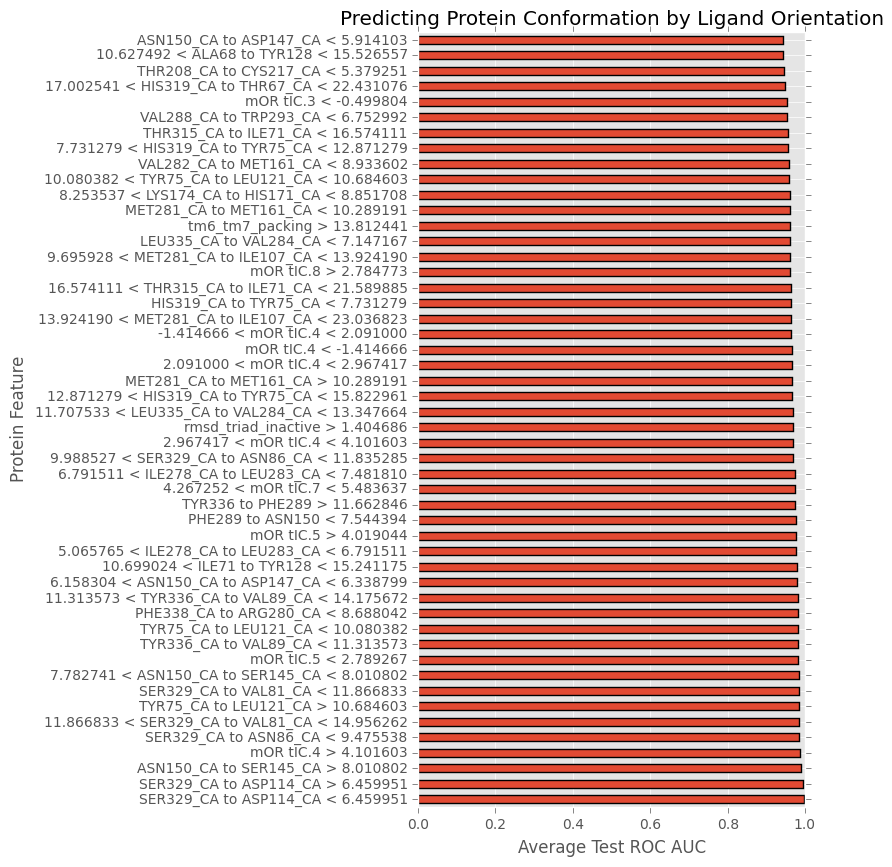

In [73]:
reload(matplotlib)
auc_scores_df = pd.Series(onehot_scores, index=pp_names_onehot).sort(ascending=False, inplace=False)
auc_scores_df = auc_scores_df.iloc[:50]
title = "Predicting Protein Conformation by Ligand Orientation"
auc_scores_df.plot(kind='barh', title=title, figsize=(5,10))
plt.xlabel("Average Test ROC AUC")
plt.ylabel("Protein Feature")
plt.savefig("%s/all_features_oneshot_%s.pdf" %(analysis_dir, title))
plt.show()

we are operating on biox3
['PHE289 to ASN150 < 7.544394', '7.544394 < PHE289 to ASN150 < 13.636208', '13.636208 < PHE289 to ASN150 < 17.079408', 'PHE289 to ASN150 > 17.079408', 'tm6_tm3_packing < 10.647170', 'tm6_tm3_packing > 10.647170', 'MET281_CA to MET161_CA < 10.289191', 'MET281_CA to MET161_CA > 10.289191', 'TYR336 to PHE289 < 8.597809', '8.597809 < TYR336 to PHE289 < 11.662846', 'TYR336 to PHE289 > 11.662846']
PHE289 to ASN150 < 7.544394
PHE289 to ASN150
Lig900-C5 to Trp293 < 5.000000     1.156598
Lig900-C9 to His297 < 5.000000     0.462903
Lig900-C5 to Met151 < 5.000000     0.404122
Lig900-C25 to Trp133 < 5.000000    0.385149
Lig900-C8 to Val300 < 5.000000     0.380241
Lig900-C5 to Ile296 < 5.000000     0.343401
Lig900-C17 to Ile296 < 5.000000    0.339540
Lig900-C21 to Tyr326 < 5.000000    0.325754
Lig900-C15 to Ile296 < 5.000000    0.314635
Lig900-C21 to Asp147 < 5.000000    0.312348
Lig900-C27 to Asn127 < 5.000000    0.294432
Lig900-C13 to Tyr148 < 5.000000    0.274926
Lig900

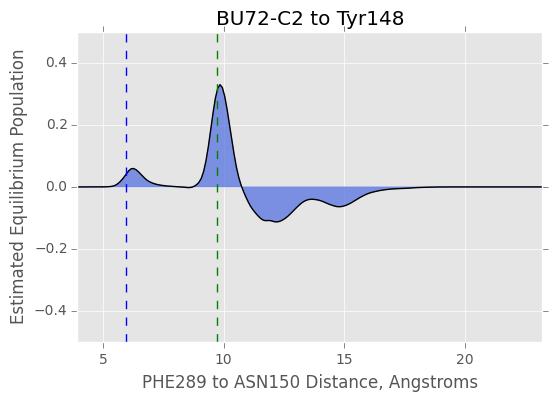

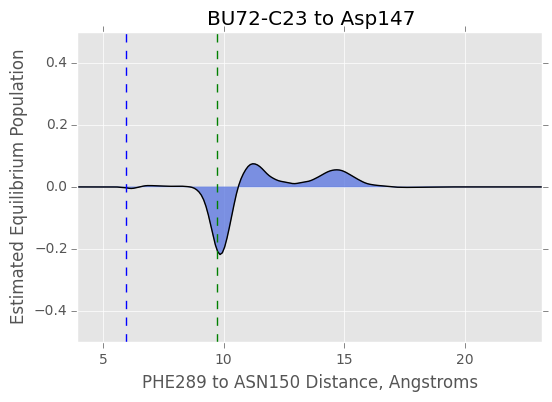

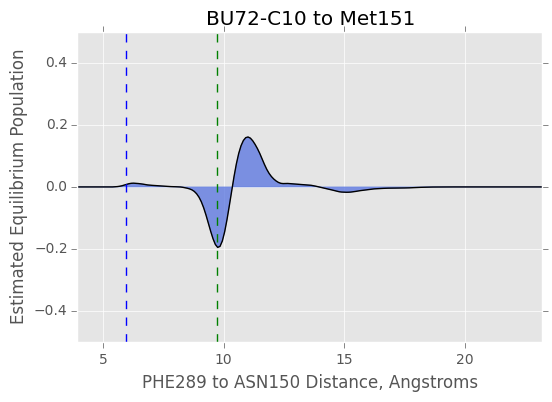

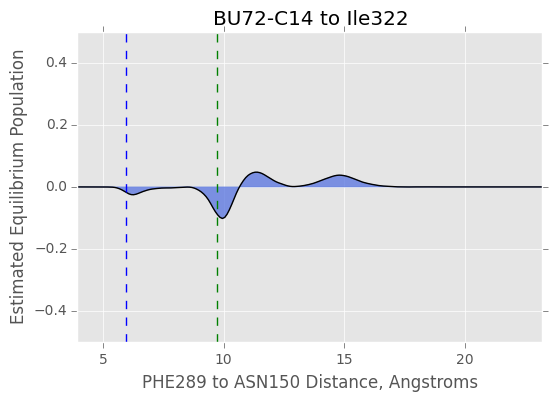

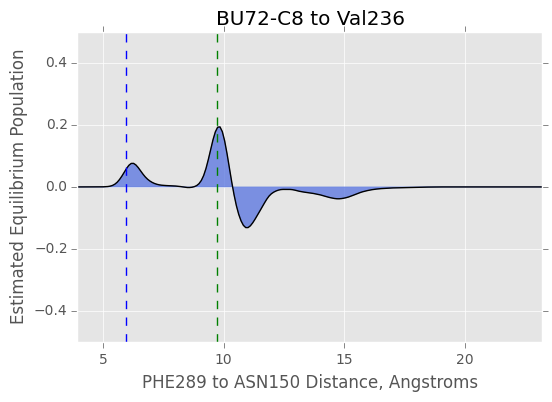

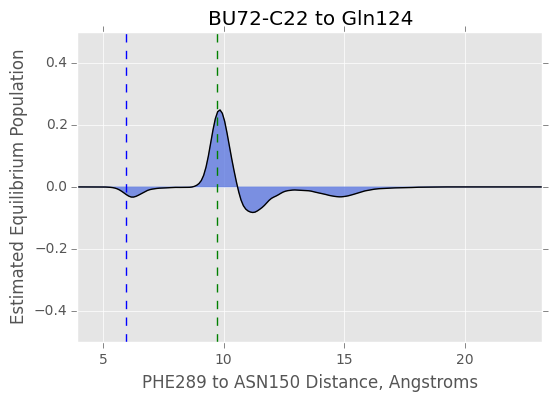

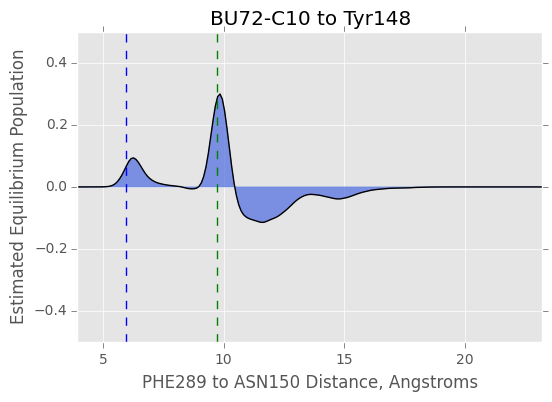

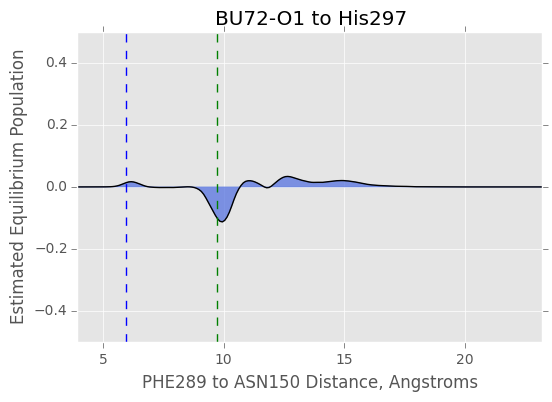

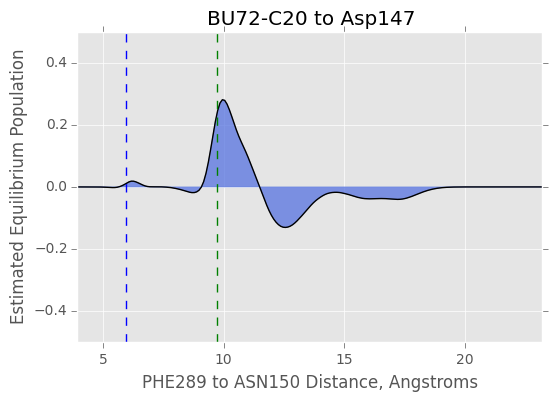

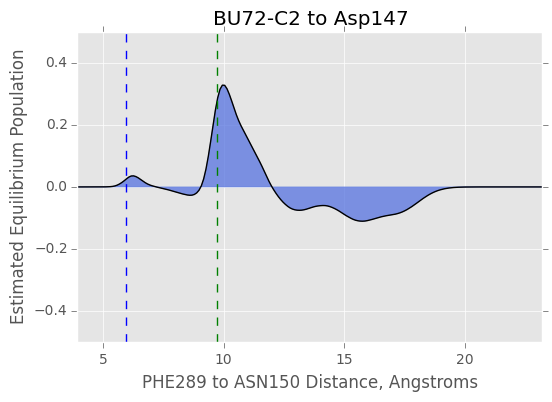

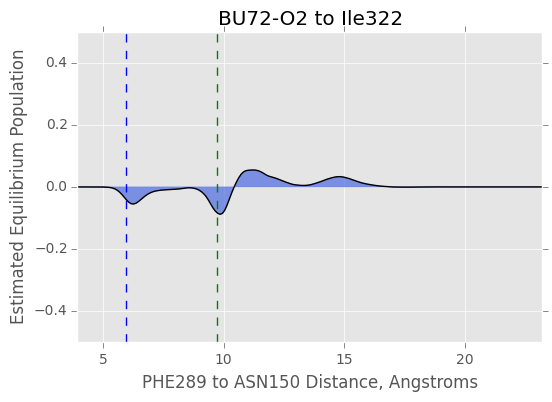

7.544394 < PHE289 to ASN150 < 13.636208
PHE289 to ASN150
Lig900-C7 to Trp293 < 5.000000     0.646672
Lig900-C6 to Trp293 < 5.000000     0.487892
Lig900-C21 to Gln124 < 5.000000    0.382138
Lig900-C19 to Tyr326 < 5.000000    0.301115
Lig900-C3 to Tyr326 < 5.000000     0.271694
Lig900-C16 to Gln124 < 5.000000    0.261133
Lig900-C1 to Asp147 < 5.000000     0.254534
Lig900-C13 to Asp147 < 5.000000    0.234868
Lig900-C7 to His297 < 5.000000     0.232813
Lig900-C9 to Ile296 < 5.000000     0.227900
Lig900-C28 to Val143 < 5.000000    0.222413
Lig900-C4 to Tyr326 < 5.000000     0.214349
Lig900-C7 to Met151 < 5.000000     0.209121
Lig900-C26 to Trp133 < 5.000000    0.202426
Lig900-C24 to Ile144 < 5.000000    0.200918
Lig900-C15 to Trp318 < 5.000000    0.195990
Lig900-C8 to Trp293 < 5.000000     0.185561
Lig900-C19 to Gln124 < 5.000000    0.178991
Lig900-C22 to Gln124 < 5.000000    0.178285
Lig900-C6 to Met151 < 5.000000     0.166240
Lig900-C10 to Val236 < 5.000000    0.159717
Lig900-C8 to His297

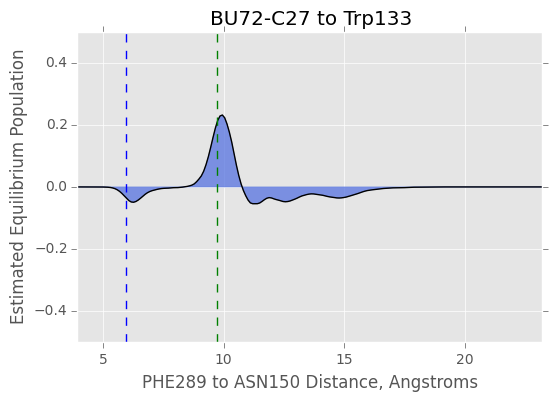

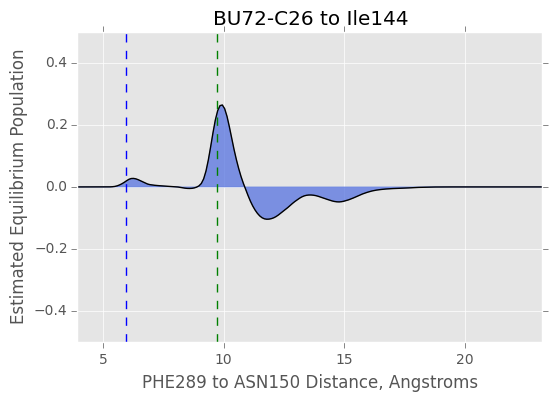

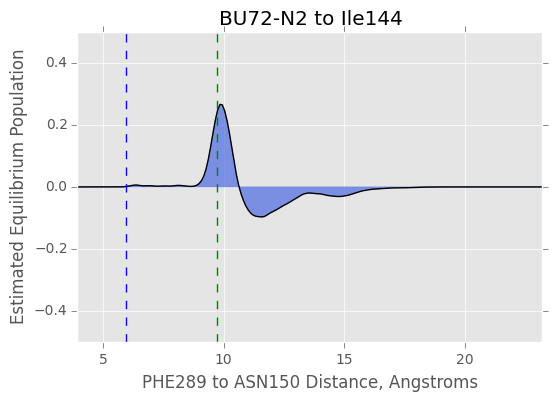

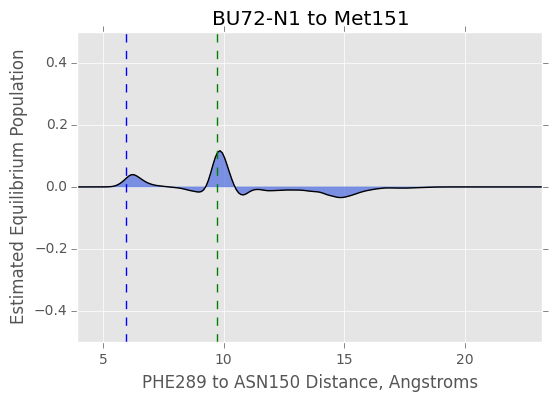

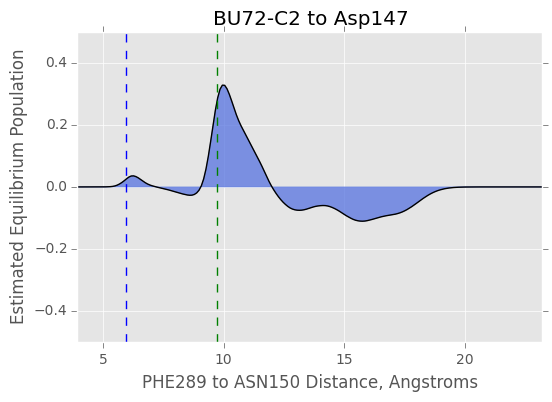

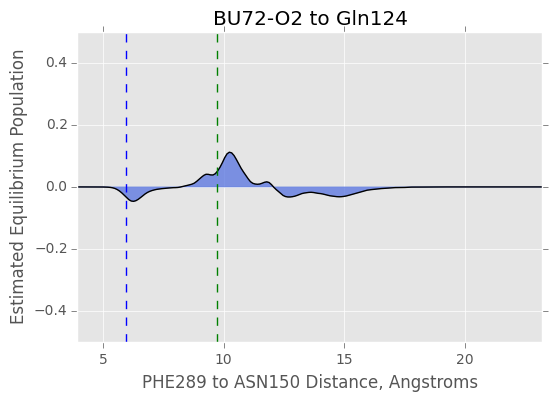

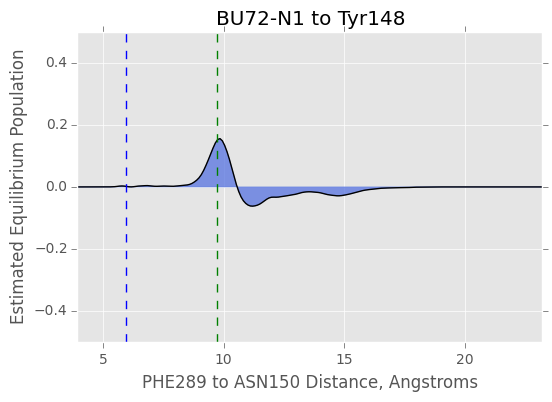

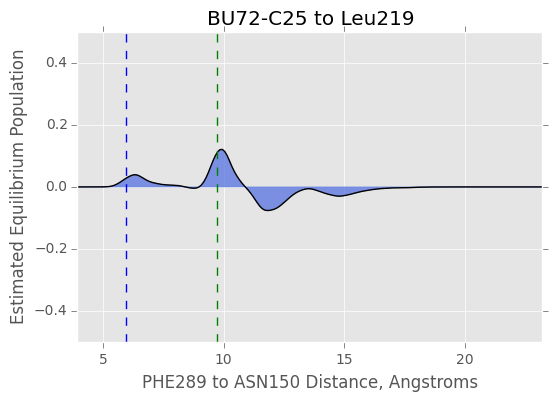

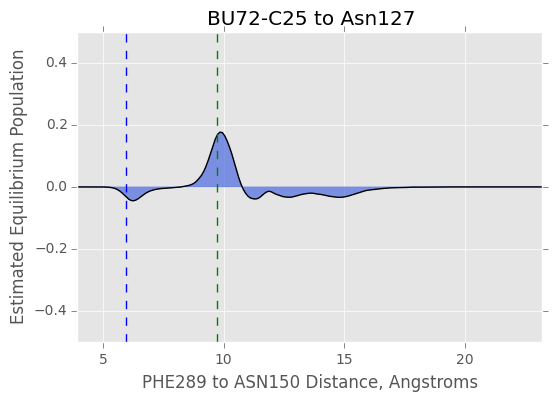

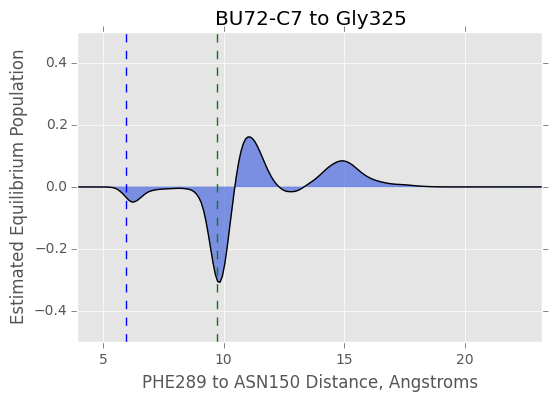

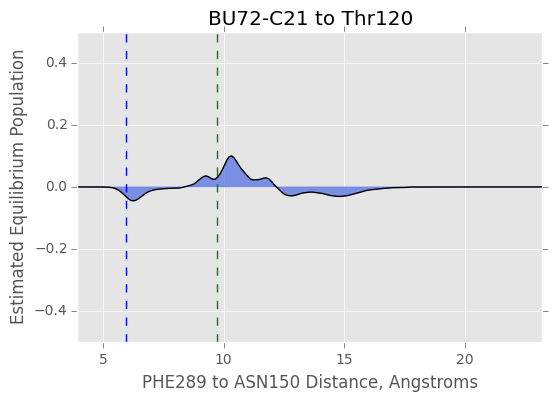

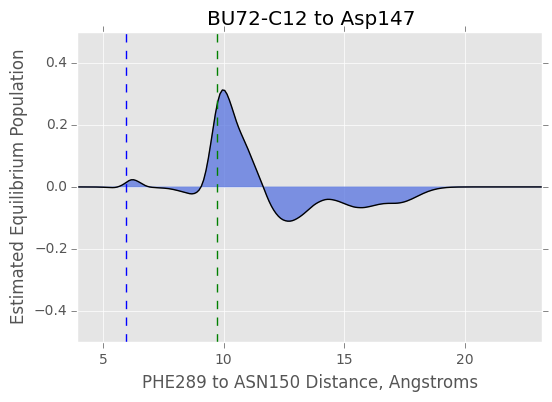

13.636208 < PHE289 to ASN150 < 17.079408
PHE289 to ASN150
Lig900-C3 to Asn150 < 5.000000     0.301881
Lig900-O2 to Cys321 < 5.000000     0.284808
Lig900-C15 to Val300 < 5.000000    0.281315
Lig900-C28 to Asp147 < 5.000000    0.277337
Lig900-O1 to Trp293 < 5.000000     0.257652
Lig900-C16 to Cys321 < 5.000000    0.221992
Lig900-C10 to His297 < 5.000000    0.178215
Lig900-C7 to Val300 < 5.000000     0.161886
Lig900-C16 to Gly325 < 5.000000    0.157393
Lig900-C11 to Ile296 < 5.000000    0.142186
Lig900-C25 to Cys217 < 5.000000    0.133432
Lig900-C25 to Trp318 < 5.000000    0.130424
Lig900-C17 to Gly325 < 5.000000    0.124658
Lig900-C23 to Asp147 < 5.000000    0.121751
Lig900-C20 to Gln124 < 5.000000    0.114689
Lig900-C3 to Ala117 < 5.000000     0.113388
Lig900-C7 to Val236 < 5.000000     0.110401
Lig900-C19 to Asp147 < 5.000000    0.107880
Lig900-C28 to Gln124 < 5.000000    0.106934
Lig900-C22 to Tyr148 < 5.000000    0.106848
Lig900-C3 to Met151 < 5.000000     0.099019
Lig900-C2 to Met15

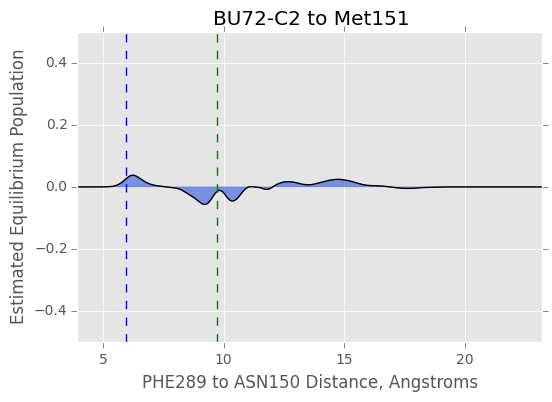

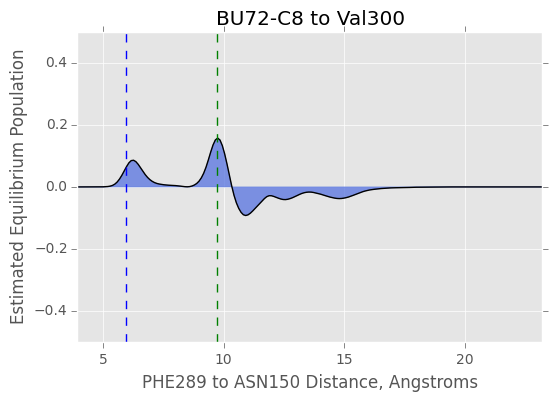

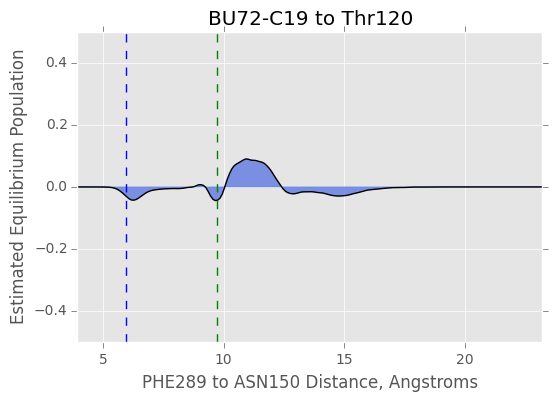

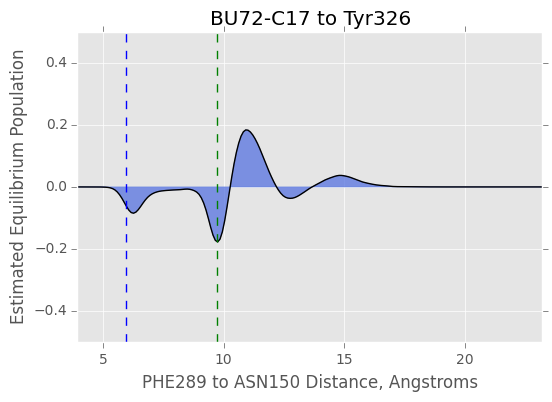

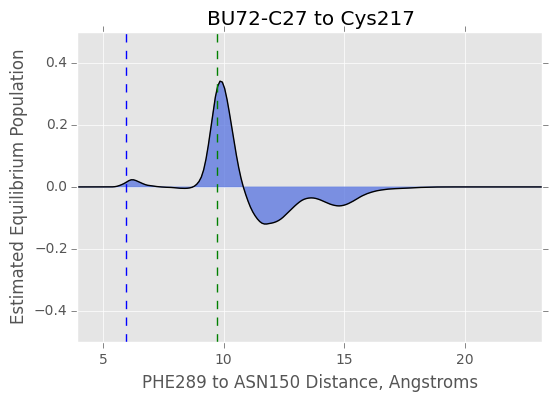

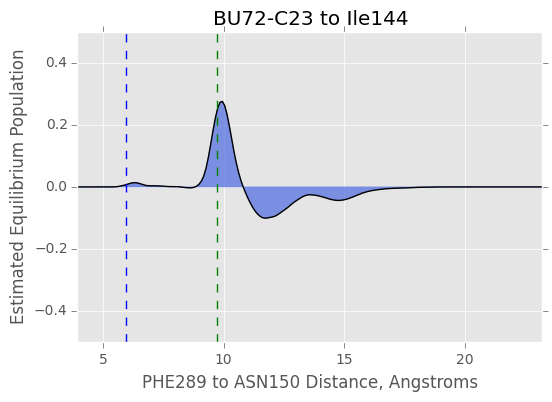

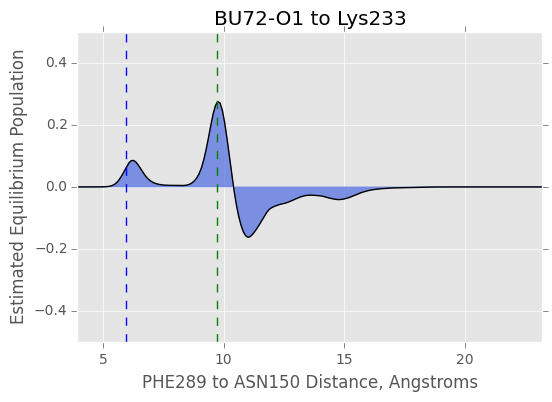

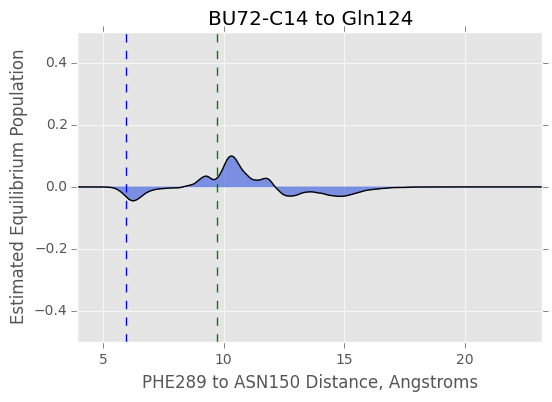

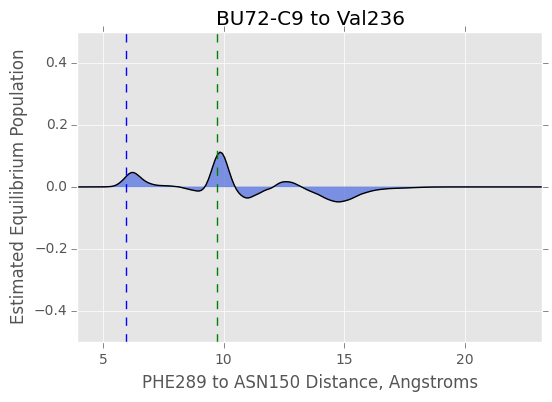

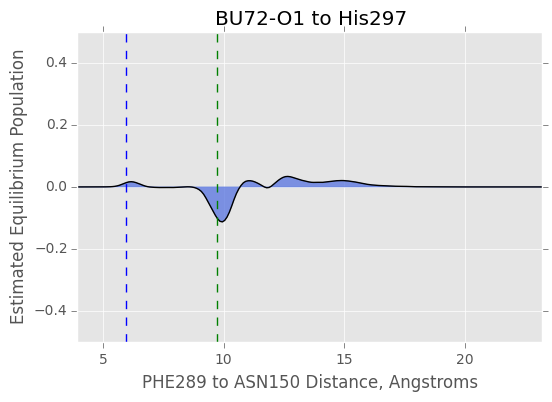

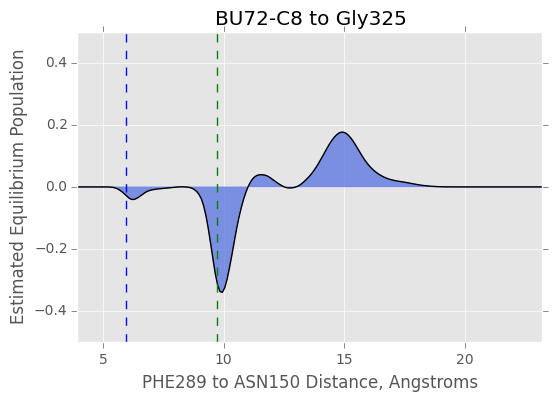

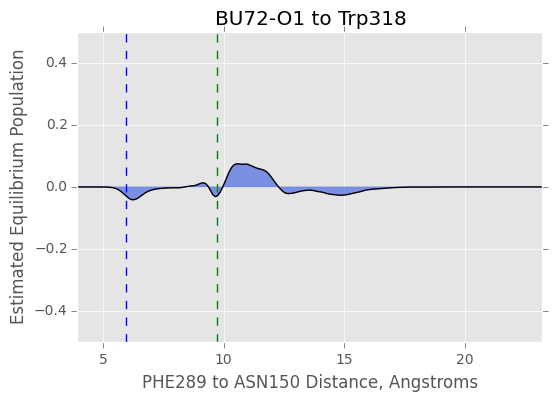

PHE289 to ASN150 > 17.079408
PHE289 to ASN150
Lig900-C8 to Gly325 < 5.000000     0.000452
Lig900-O1 to Trp293 < 5.000000     0.000439
Lig900-C6 to Gly325 < 5.000000     0.000389
Lig900-C7 to Gly325 < 5.000000     0.000371
Lig900-C3 to Ala117 < 5.000000     0.000319
Lig900-C13 to Ile296 < 5.000000    0.000316
Lig900-C15 to Cys321 < 5.000000    0.000293
Lig900-C9 to Trp293 < 5.000000     0.000280
Lig900-C5 to Tyr326 < 5.000000     0.000268
Lig900-C10 to His297 < 5.000000    0.000245
Lig900-O1 to Ile296 < 5.000000     0.000237
Lig900-O2 to Cys321 < 5.000000     0.000231
Lig900-C10 to Ile296 < 5.000000    0.000228
Lig900-C18 to Tyr326 < 5.000000    0.000220
Lig900-O2 to Ile296 < 5.000000     0.000207
Lig900-C16 to Gly325 < 5.000000    0.000192
Lig900-C25 to Trp318 < 5.000000    0.000191
Lig900-C20 to Tyr326 < 5.000000    0.000190
Lig900-C15 to Val300 < 5.000000    0.000182
Lig900-C17 to Gly325 < 5.000000    0.000171
Lig900-C4 to Tyr326 < 5.000000     0.000166
Name: PHE289 to ASN150 > 17.07

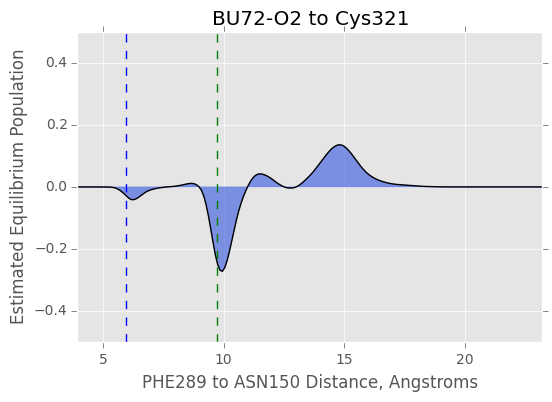

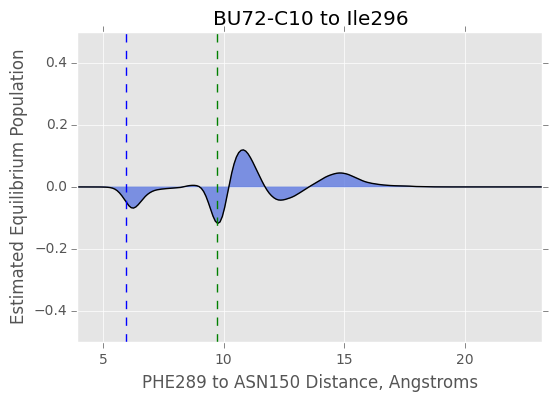

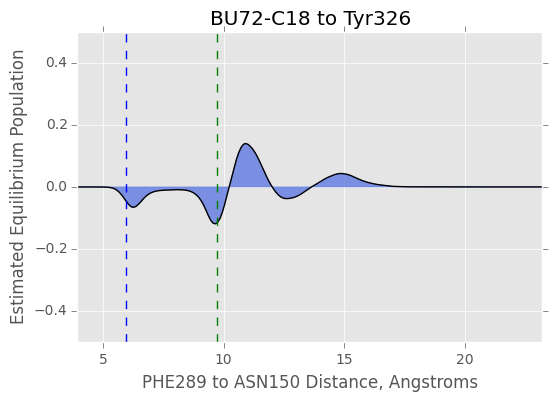

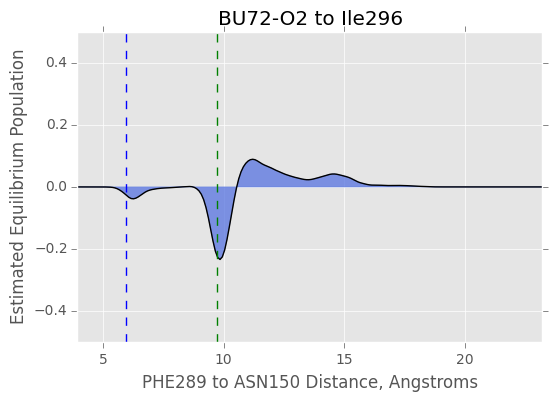

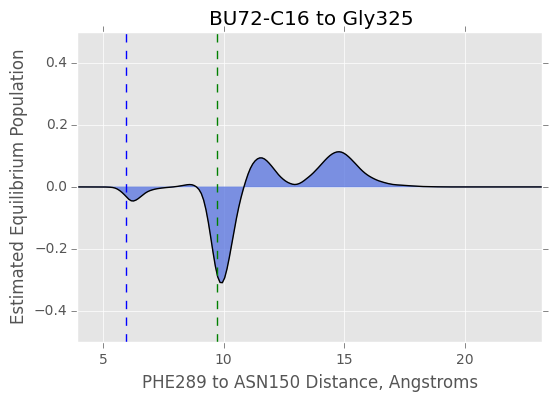

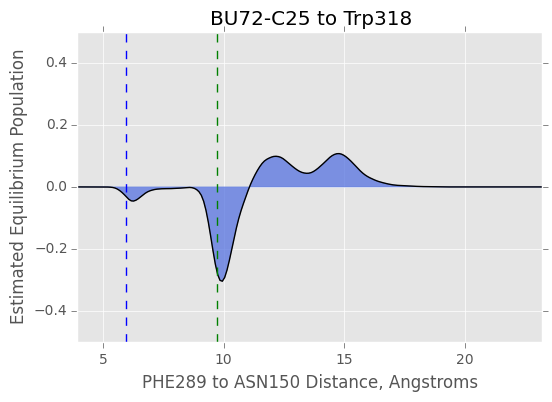

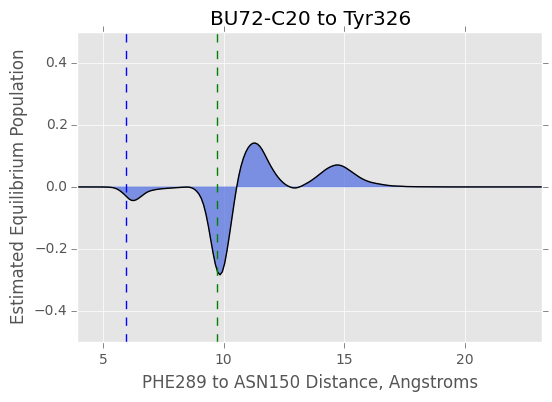

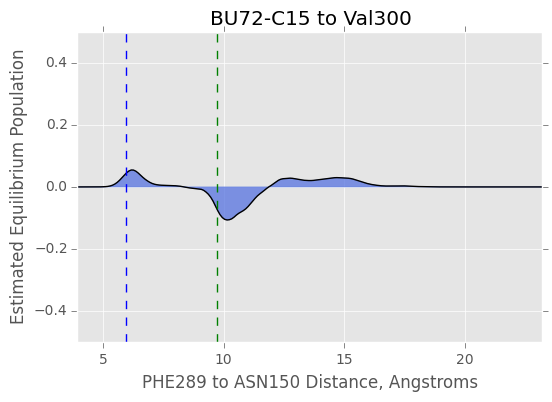

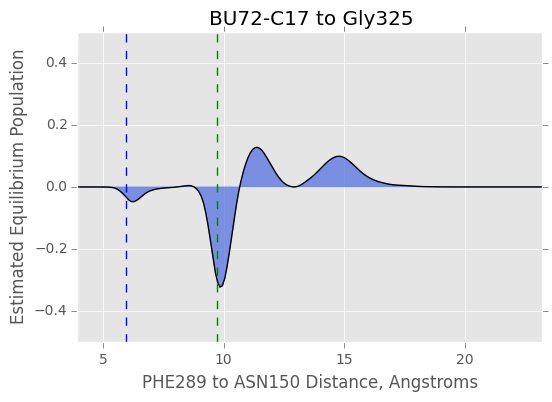

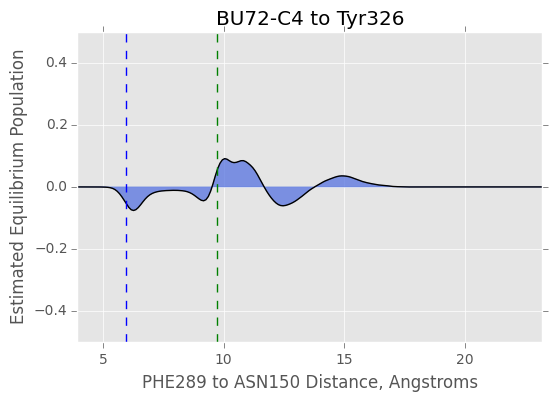

tm6_tm3_packing < 10.647170
tm6_tm3_packing
Lig900-O1 to Trp293 < 5.000000     0.319301
Lig900-C13 to Tyr148 < 5.000000    0.316373
Lig900-C16 to Gly325 < 5.000000    0.292280
Lig900-C21 to Tyr326 < 5.000000    0.286379
Lig900-C16 to Cys321 < 5.000000    0.251273
Lig900-C13 to Ile296 < 5.000000    0.247297
Lig900-C10 to Val300 < 5.000000    0.239920
Lig900-O2 to Cys321 < 5.000000     0.232781
Lig900-C8 to Met151 < 5.000000     0.221483
Lig900-C8 to Gly325 < 5.000000     0.216839
Lig900-C17 to Gly325 < 5.000000    0.209301
Lig900-C7 to Gly325 < 5.000000     0.207449
Lig900-C17 to Ile296 < 5.000000    0.198857
Lig900-C27 to Asn127 < 5.000000    0.197226
Lig900-C19 to Thr120 < 5.000000    0.188965
Lig900-O1 to His297 < 5.000000     0.175860
Lig900-C16 to Ile296 < 5.000000    0.168600
Lig900-O1 to Lys233 < 5.000000     0.164869
Lig900-C19 to Asp147 < 5.000000    0.153478
Lig900-C5 to Trp293 < 5.000000     0.151319
Lig900-C7 to Ile296 < 5.000000     0.148842
Lig900-C26 to Leu219 < 5.000000 

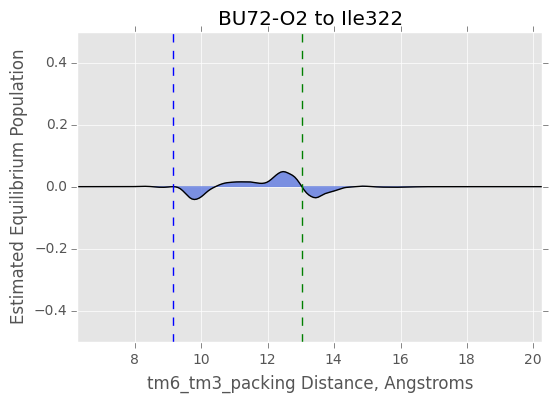

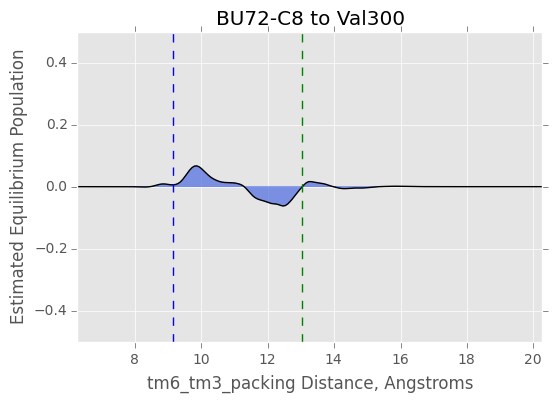

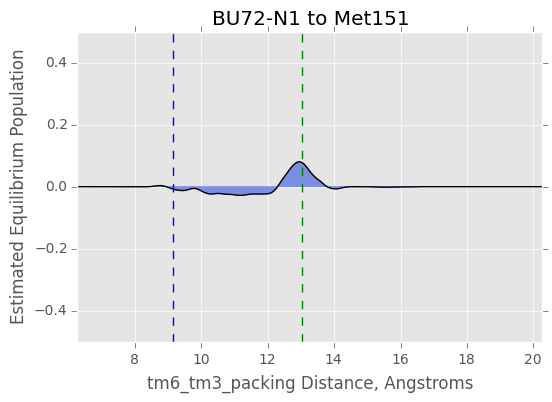

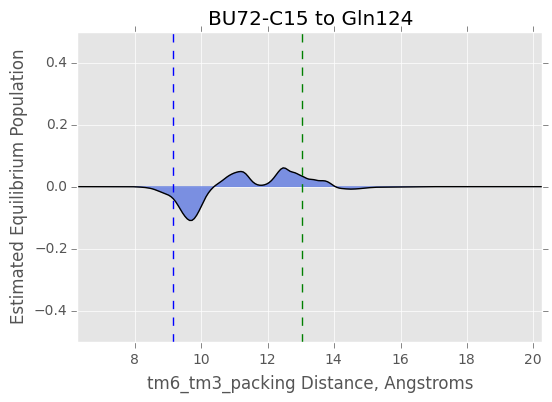

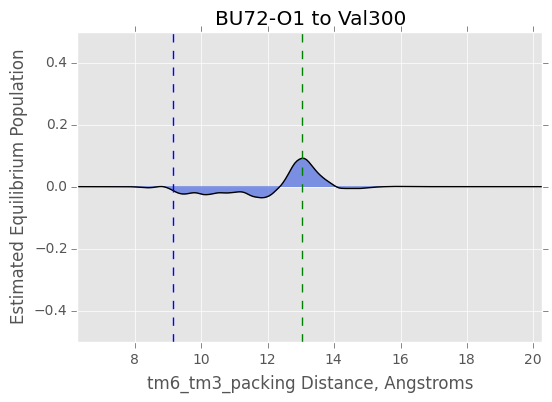

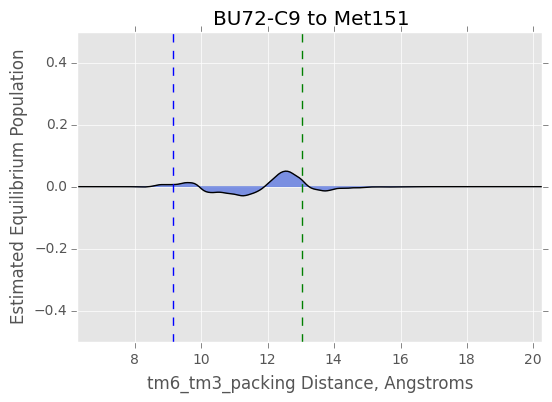

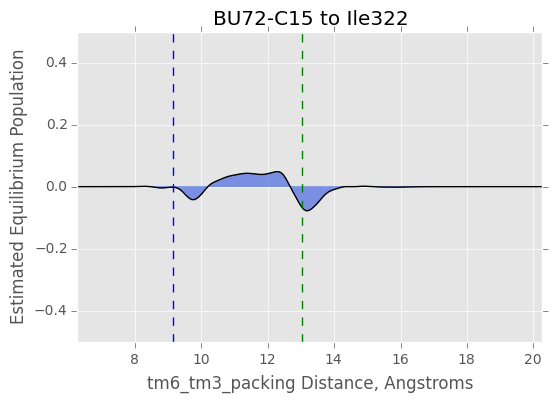

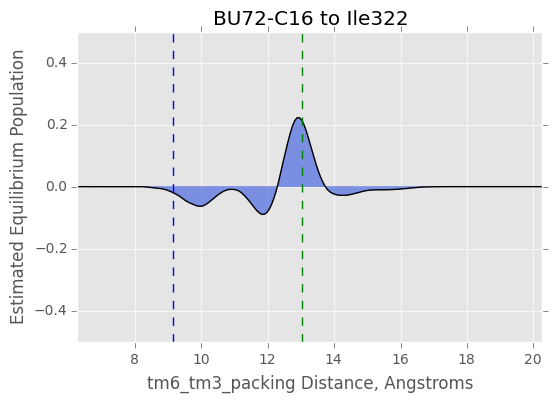

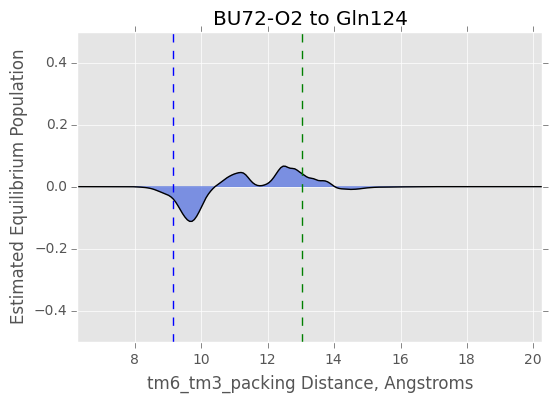

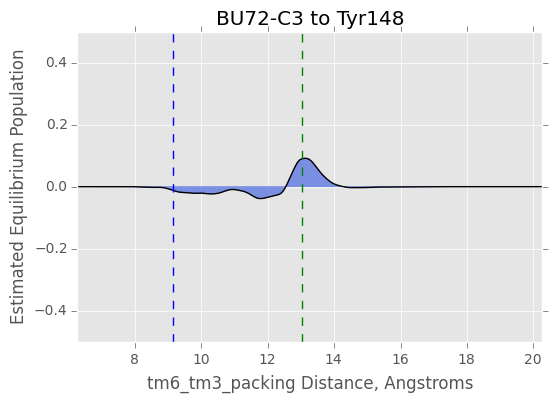

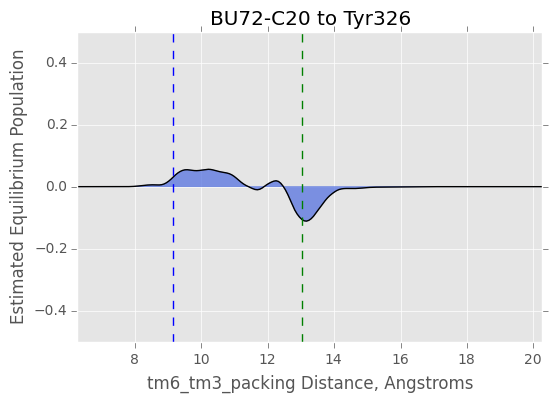

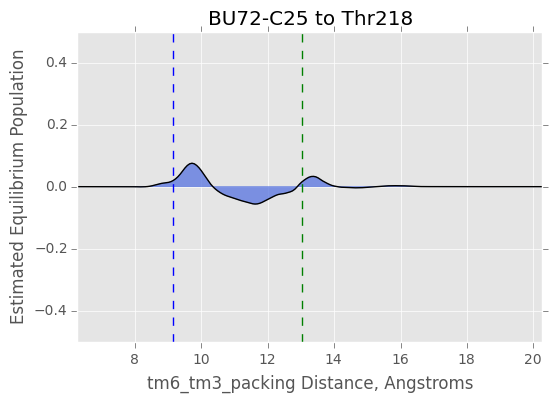

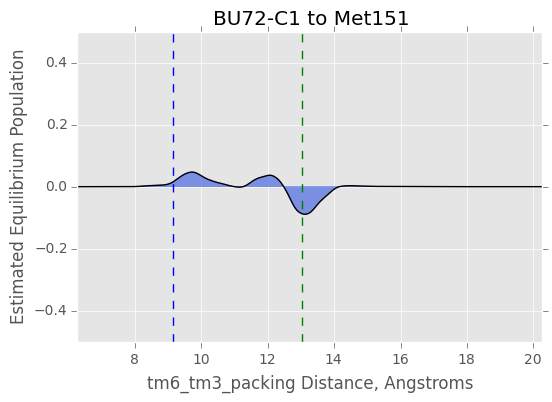

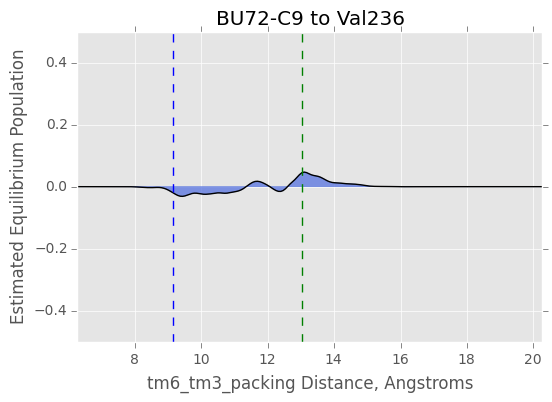

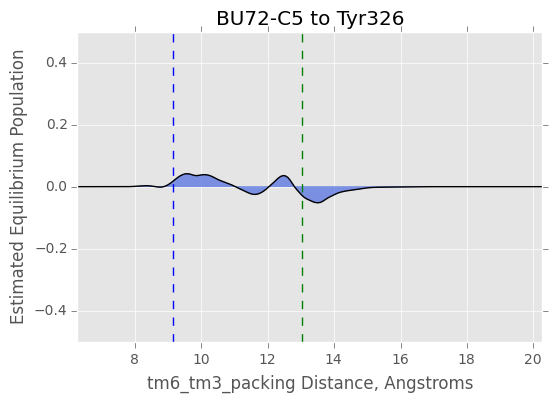

tm6_tm3_packing > 10.647170
tm6_tm3_packing
Lig900-C7 to Trp293 < 5.000000     0.567637
Lig900-C3 to Tyr326 < 5.000000     0.451568
Lig900-C19 to Tyr326 < 5.000000    0.323794
Lig900-C5 to Asp147 < 5.000000     0.275902
Lig900-O1 to Trp318 < 5.000000     0.260733
Lig900-C8 to Ile296 < 5.000000     0.260345
Lig900-C7 to Met151 < 5.000000     0.255648
Lig900-C6 to Trp293 < 5.000000     0.250408
Lig900-C27 to Trp133 < 5.000000    0.243769
Lig900-C12 to Asp147 < 5.000000    0.243747
Lig900-O1 to Ala240 < 5.000000     0.236924
Lig900-C4 to Tyr326 < 5.000000     0.215949
Lig900-C8 to Trp293 < 5.000000     0.206221
Lig900-N1 to Tyr326 < 5.000000     0.197046
Lig900-C19 to Gln124 < 5.000000    0.192052
Lig900-C21 to Gln124 < 5.000000    0.187014
Lig900-C6 to Gly325 < 5.000000     0.169379
Lig900-C24 to Ile144 < 5.000000    0.166794
Lig900-C26 to Thr218 < 5.000000    0.163485
Lig900-C10 to His297 < 5.000000    0.156120
Lig900-N2 to Tyr148 < 5.000000     0.156002
Lig900-C14 to Trp318 < 5.000000 

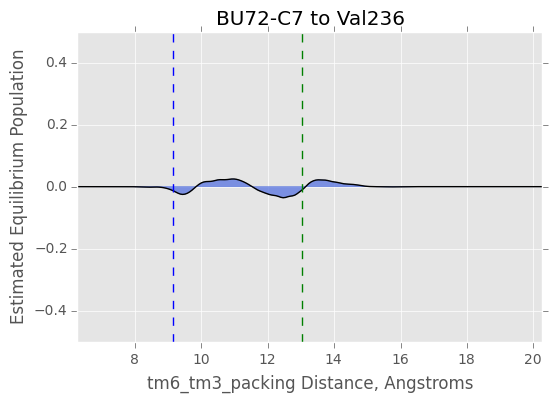

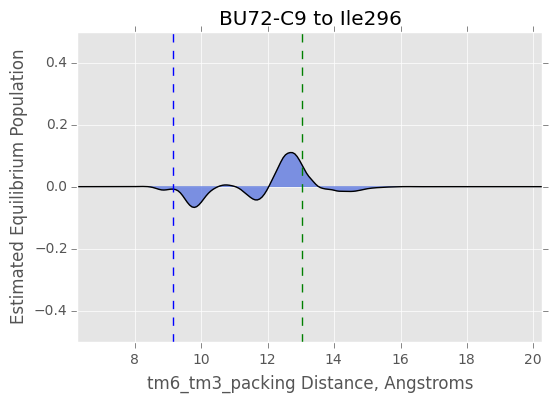

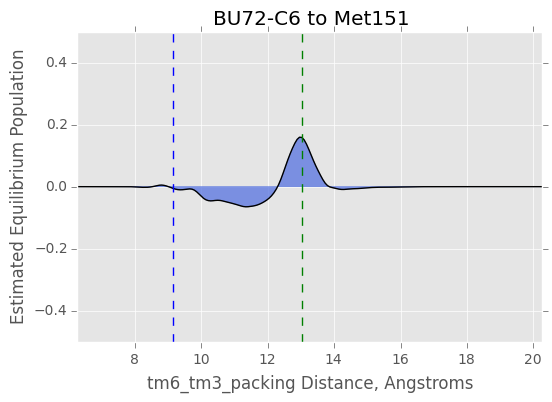

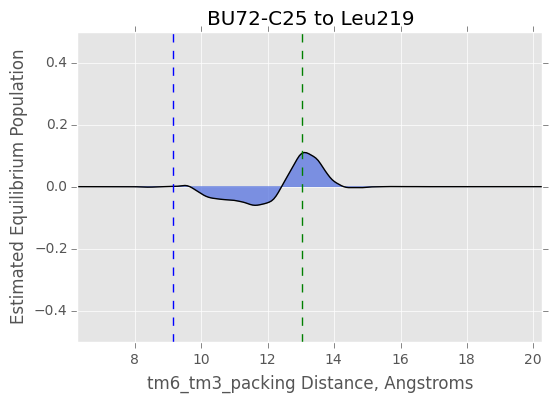

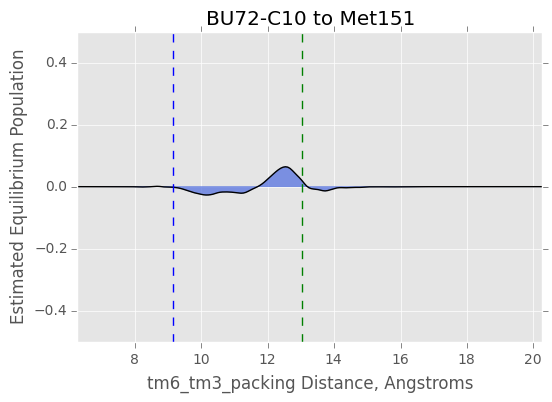

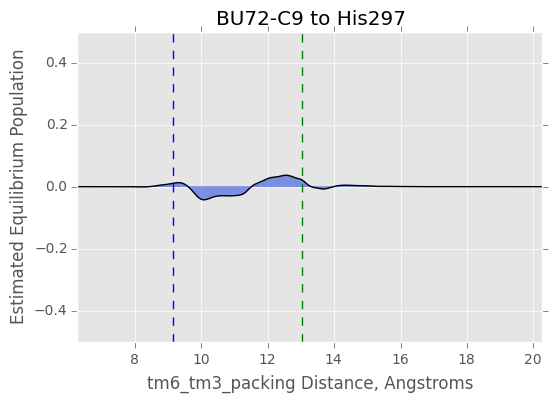

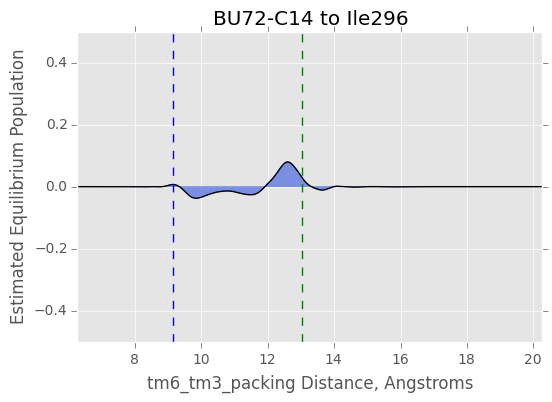

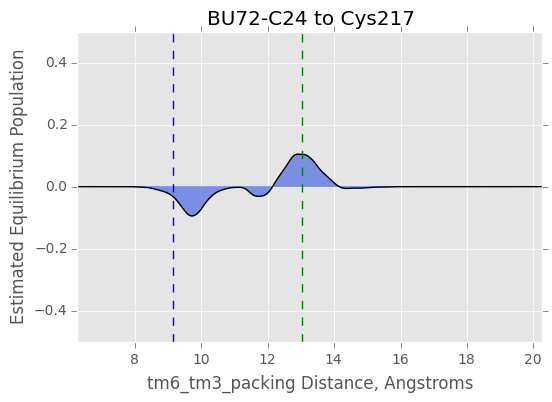

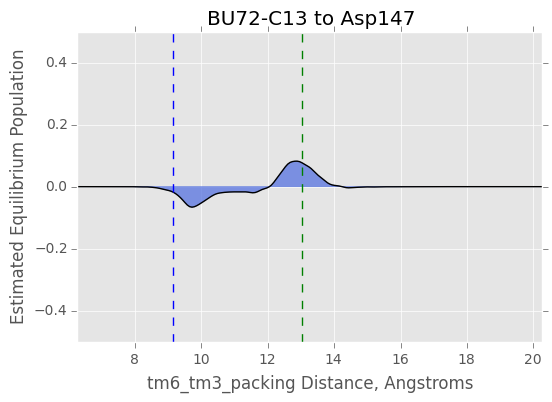

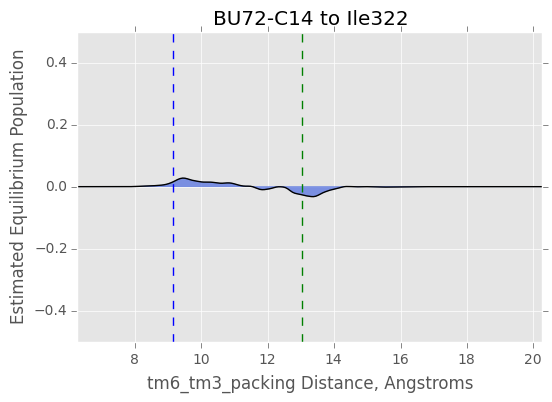

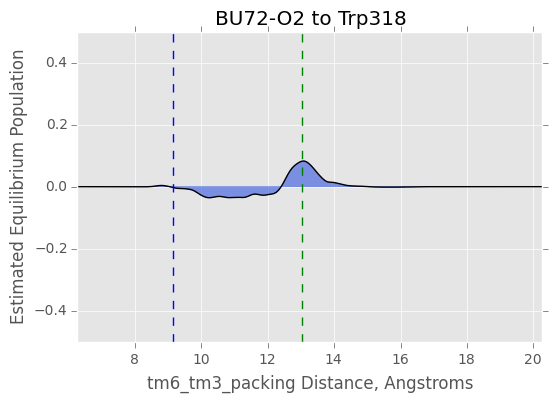

MET281_CA to MET161_CA < 10.289191
MET281_CA to MET161_CA
Lig900-C16 to Cys321 < 5.000000    0.407797
Lig900-O1 to Trp293 < 5.000000     0.305615
Lig900-C13 to Ile296 < 5.000000    0.255832
Lig900-O1 to Tyr148 < 5.000000     0.236163
Lig900-C16 to Gly325 < 5.000000    0.235605
Lig900-C15 to Cys321 < 5.000000    0.234838
Lig900-C25 to Trp318 < 5.000000    0.228264
Lig900-O2 to Cys321 < 5.000000     0.226965
Lig900-C21 to Tyr326 < 5.000000    0.215813
Lig900-C17 to Gly325 < 5.000000    0.182953
Lig900-C21 to Ile322 < 5.000000    0.167717
Lig900-O1 to Ile296 < 5.000000     0.156762
Lig900-C16 to Ile322 < 5.000000    0.144722
Lig900-C7 to Val300 < 5.000000     0.141038
Lig900-C23 to Asp147 < 5.000000    0.137171
Lig900-C26 to Leu219 < 5.000000    0.132708
Lig900-C16 to Val300 < 5.000000    0.130127
Lig900-C11 to Ile296 < 5.000000    0.126505
Lig900-C19 to Asp147 < 5.000000    0.124904
Lig900-C10 to Tyr148 < 5.000000    0.115652
Lig900-C19 to Ile322 < 5.000000    0.107216
Lig900-C7 to Ile29

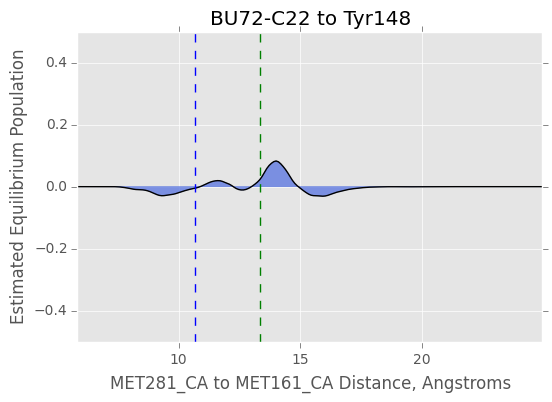

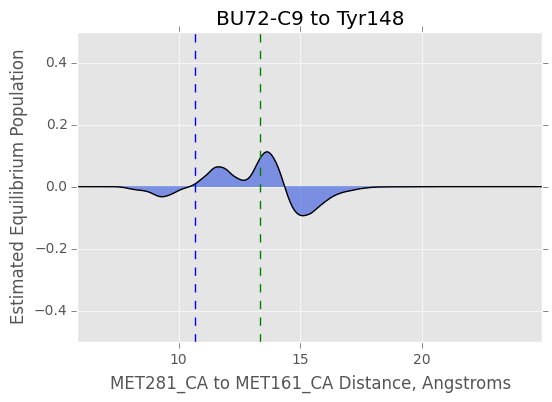

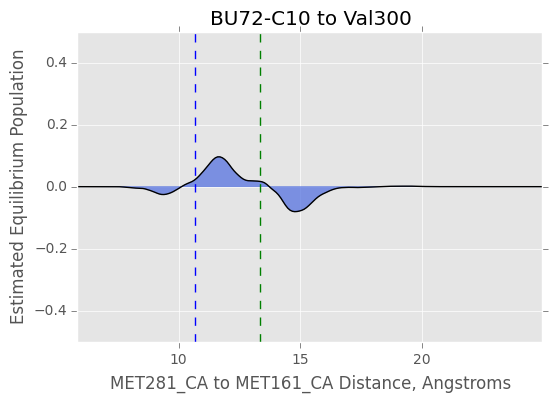

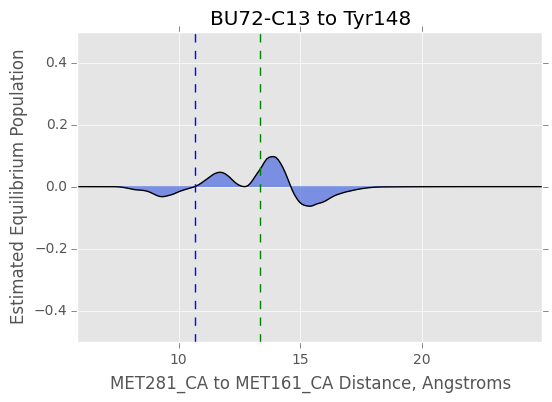

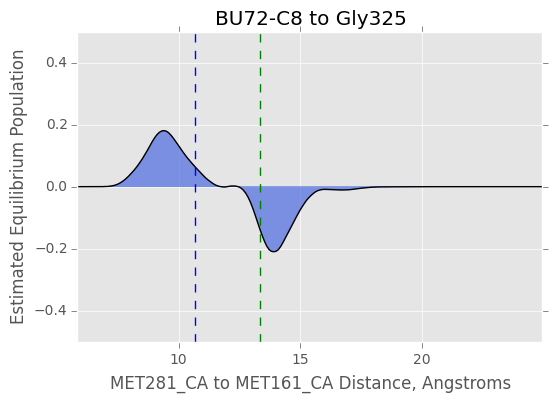

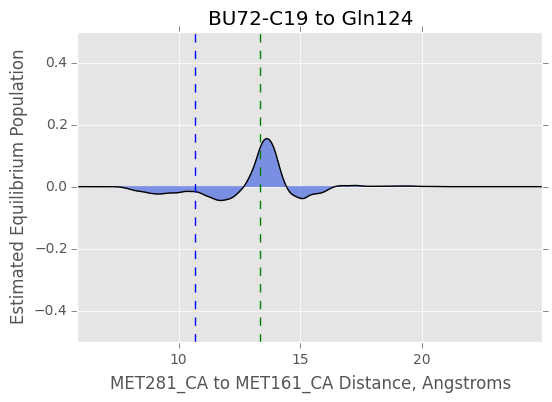

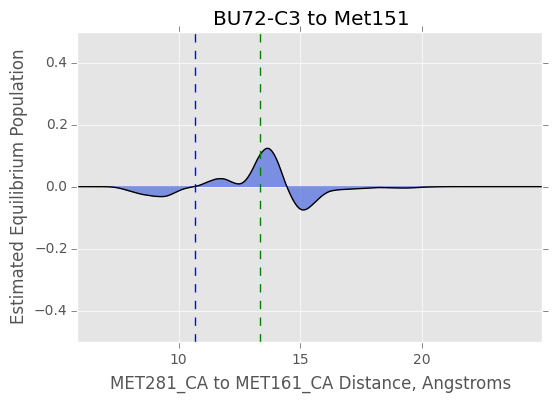

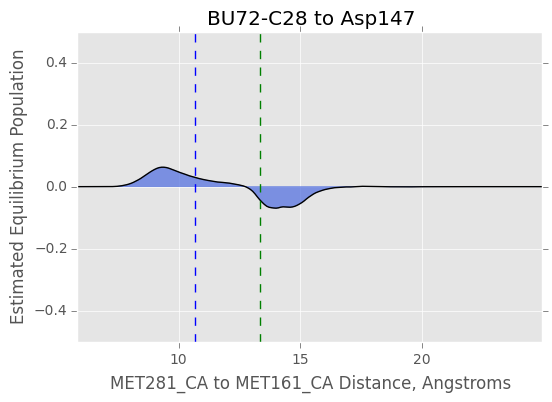

MET281_CA to MET161_CA > 10.289191
MET281_CA to MET161_CA
Lig900-C7 to Trp293 < 5.000000     0.593364
Lig900-C4 to Tyr326 < 5.000000     0.356555
Lig900-O1 to Val236 < 5.000000     0.355719
Lig900-C7 to His297 < 5.000000     0.326098
Lig900-O1 to Ala240 < 5.000000     0.320041
Lig900-C6 to Met151 < 5.000000     0.296231
Lig900-C12 to Asp147 < 5.000000    0.263139
Lig900-C26 to Gln124 < 5.000000    0.261758
Lig900-C19 to Tyr326 < 5.000000    0.248632
Lig900-C25 to Gln124 < 5.000000    0.238344
Lig900-C16 to Trp318 < 5.000000    0.228624
Lig900-C26 to Asn127 < 5.000000    0.227347
Lig900-C17 to Tyr326 < 5.000000    0.226491
Lig900-C9 to His297 < 5.000000     0.222456
Lig900-C3 to Tyr326 < 5.000000     0.219462
Lig900-C27 to Cys217 < 5.000000    0.218186
Lig900-N1 to Tyr148 < 5.000000     0.208132
Lig900-C7 to Met151 < 5.000000     0.205701
Lig900-C16 to Tyr326 < 5.000000    0.205662
Lig900-C8 to Trp293 < 5.000000     0.189282
Lig900-C21 to Asp147 < 5.000000    0.182292
Lig900-C3 to Asp14

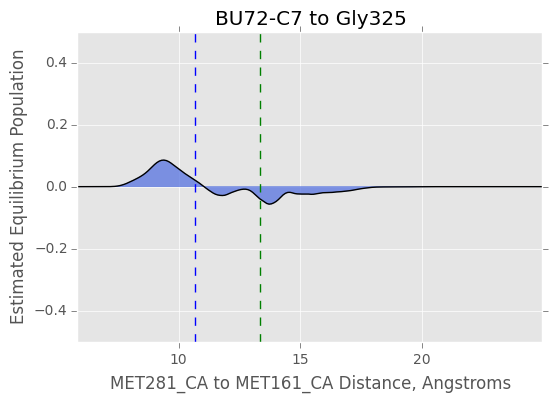

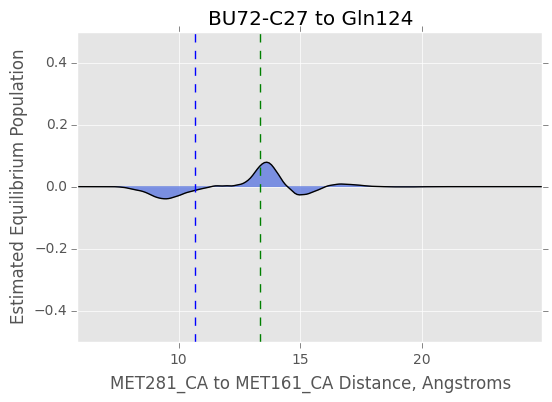

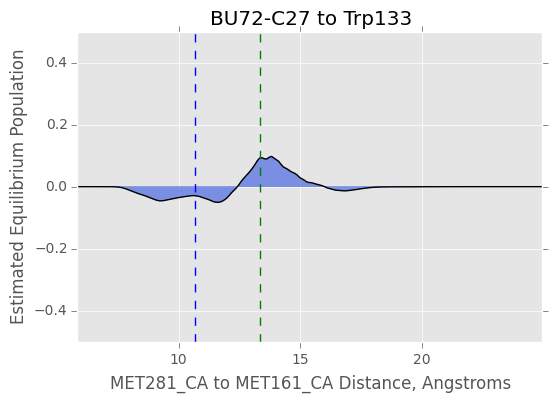

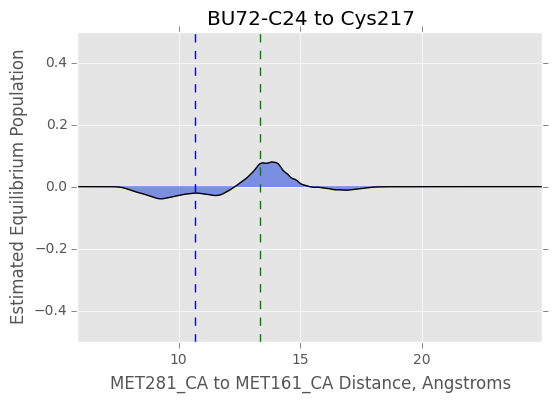

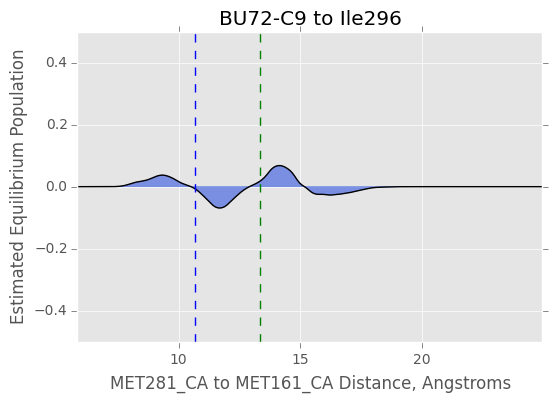

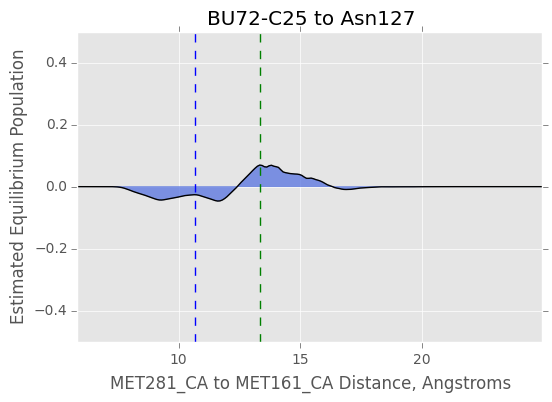

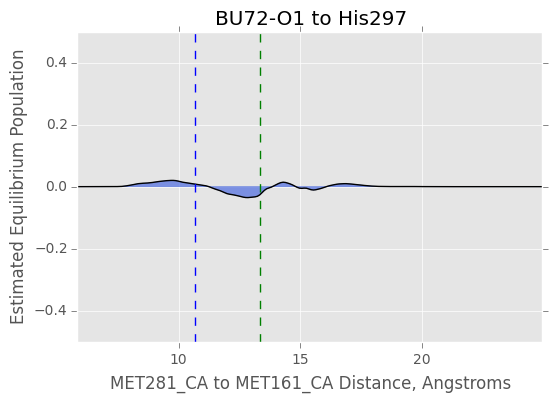

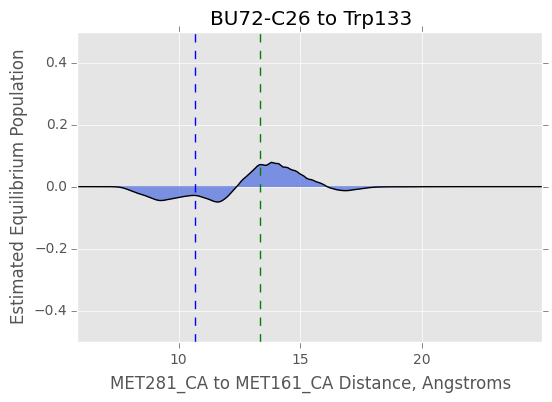

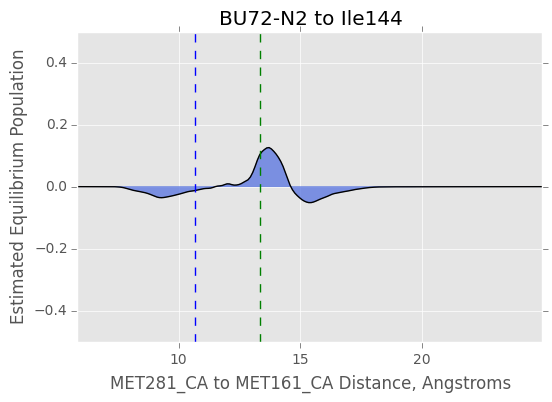

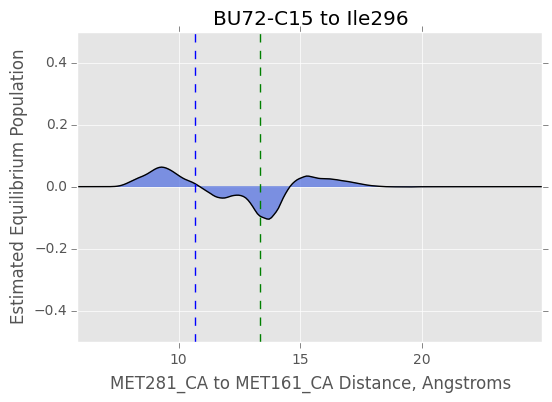

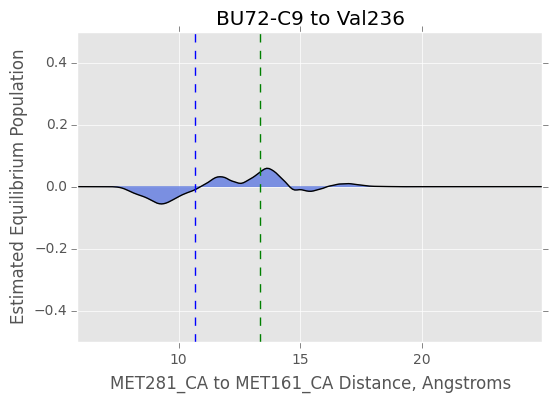

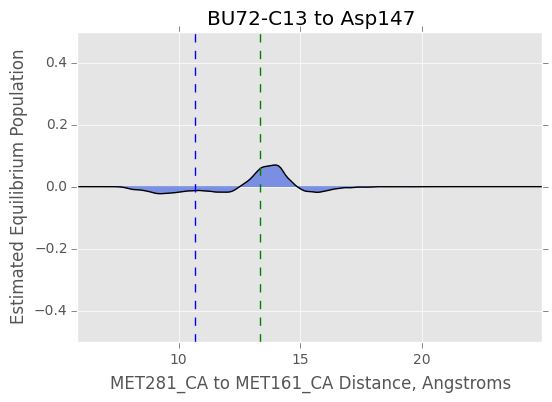

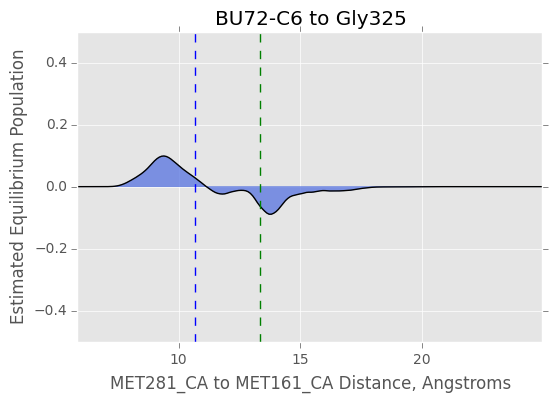

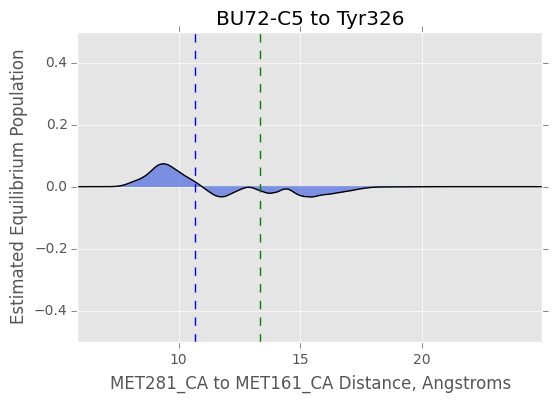

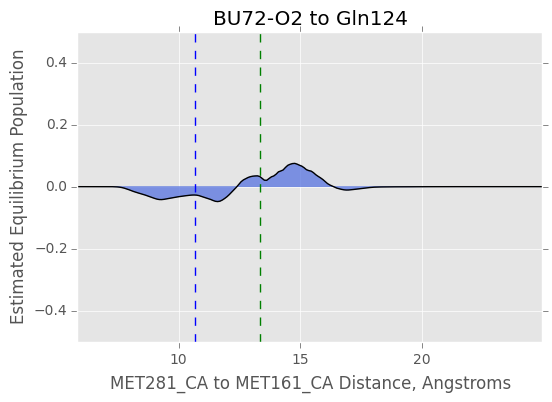

TYR336 to PHE289 < 8.597809
TYR336 to PHE289
Lig900-C7 to Trp293 < 5.000000     0.614588
Lig900-C3 to Tyr326 < 5.000000     0.261708
Lig900-N1 to Tyr326 < 5.000000     0.242235
Lig900-C25 to Cys217 < 5.000000    0.232560
Lig900-C8 to Trp293 < 5.000000     0.223036
Lig900-C6 to Met151 < 5.000000     0.212572
Lig900-C21 to Gln124 < 5.000000    0.209086
Lig900-C7 to Met151 < 5.000000     0.197306
Lig900-C6 to Trp293 < 5.000000     0.166329
Lig900-C25 to Gln124 < 5.000000    0.164918
Lig900-O1 to Ala240 < 5.000000     0.148063
Lig900-C11 to Ile296 < 5.000000    0.145347
Lig900-C19 to Tyr326 < 5.000000    0.138174
Lig900-C8 to Ile296 < 5.000000     0.130116
Lig900-C27 to Cys217 < 5.000000    0.125251
Lig900-C24 to Ile144 < 5.000000    0.125087
Lig900-C19 to Ile322 < 5.000000    0.123879
Lig900-C17 to Ile322 < 5.000000    0.117188
Lig900-C4 to Gly325 < 5.000000     0.109965
Lig900-C22 to Gln124 < 5.000000    0.108544
Lig900-C16 to Trp318 < 5.000000    0.107878
Lig900-O2 to Trp318 < 5.000000 

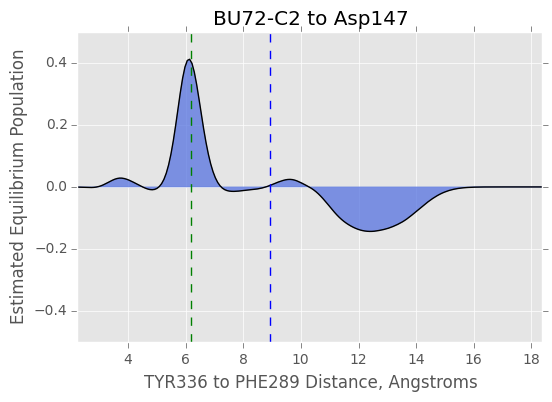

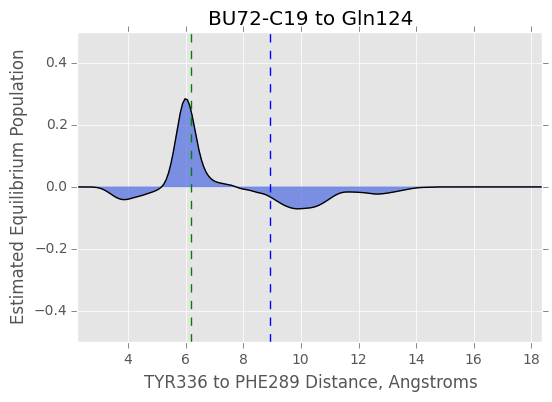

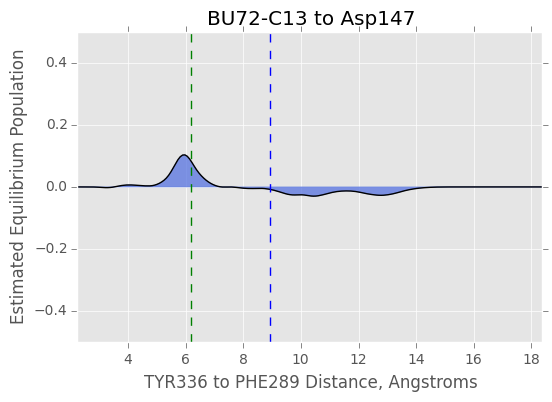

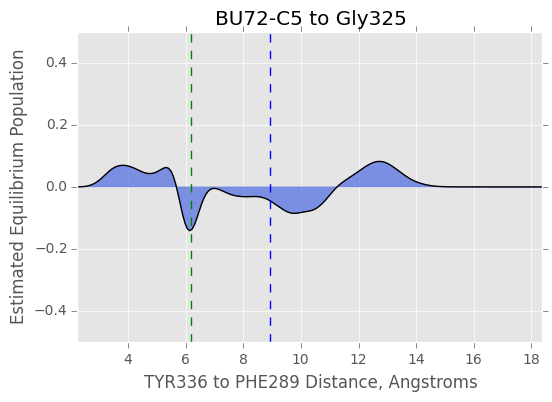

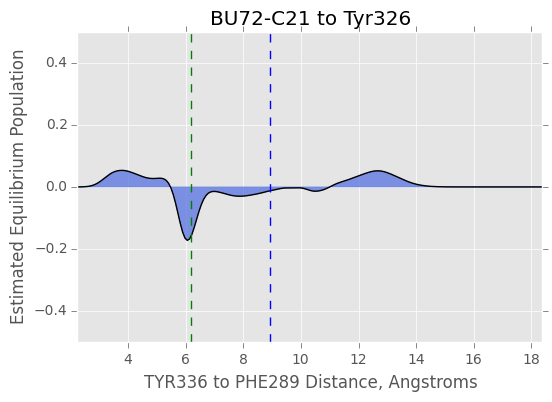

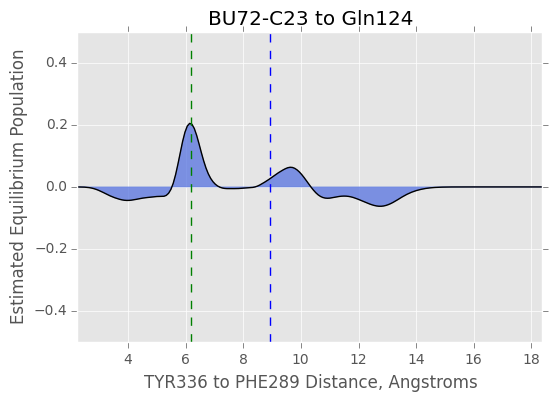

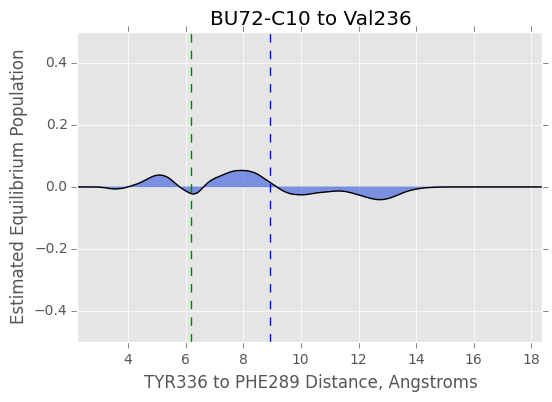

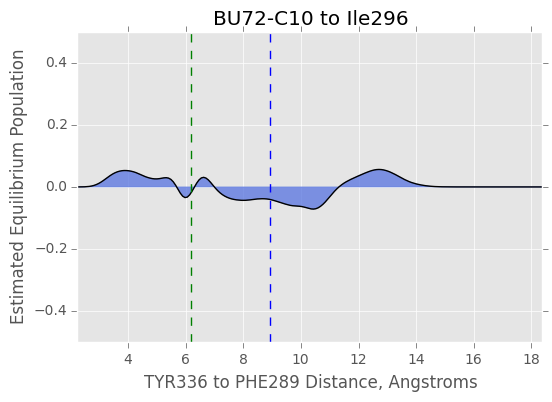

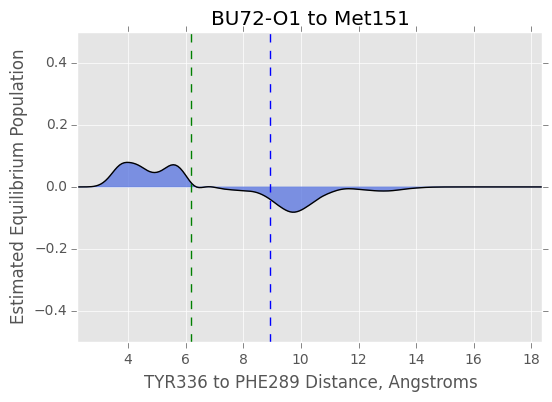

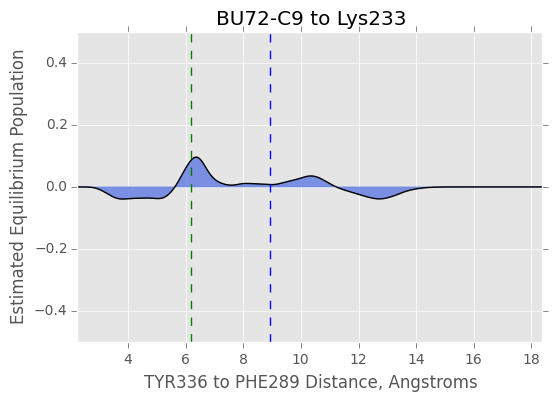

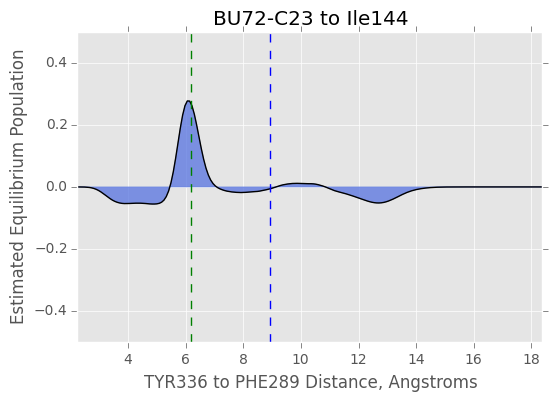

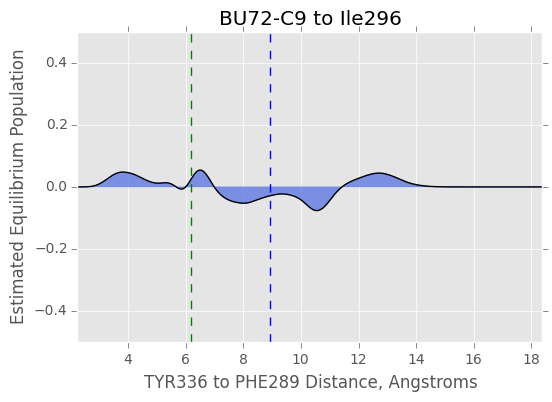

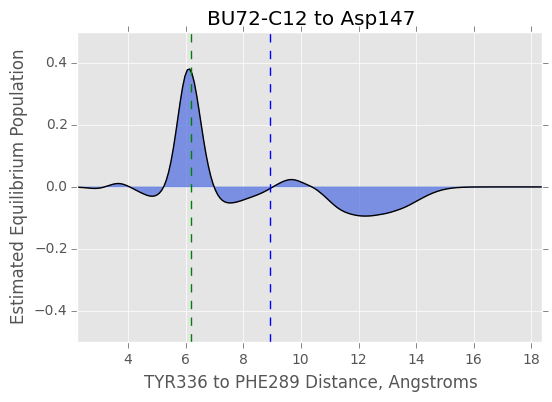

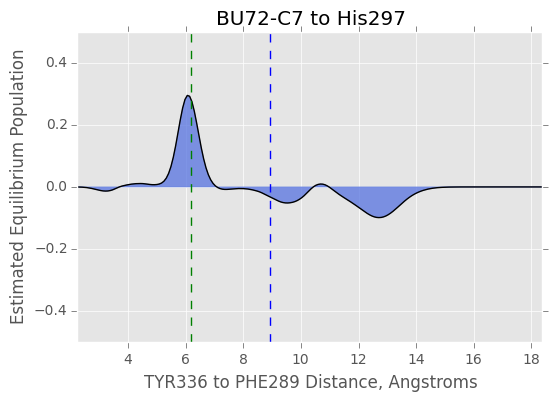

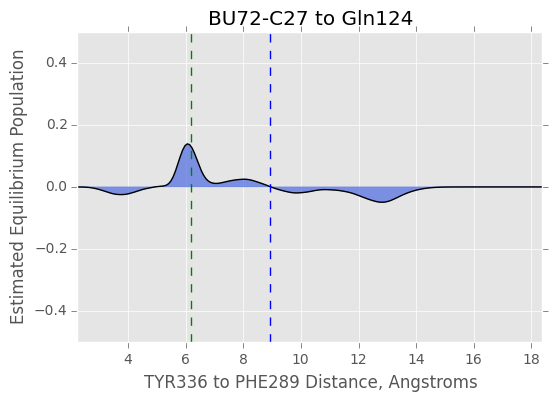

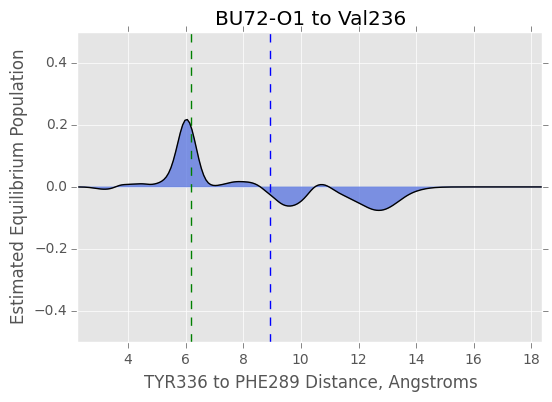

8.597809 < TYR336 to PHE289 < 11.662846
TYR336 to PHE289
Lig900-O1 to His297 < 5.000000     0.202720
Lig900-C9 to Trp293 < 5.000000     0.190986
Lig900-C19 to Thr120 < 5.000000    0.188403
Lig900-C15 to Gln124 < 5.000000    0.174901
Lig900-C21 to Thr120 < 5.000000    0.157246
Lig900-C9 to Val300 < 5.000000     0.140916
Lig900-C8 to Val236 < 5.000000     0.137330
Lig900-O2 to Ile296 < 5.000000     0.123993
Lig900-C15 to Trp318 < 5.000000    0.122768
Lig900-C9 to His297 < 5.000000     0.121437
Lig900-O2 to Gln124 < 5.000000     0.120054
Lig900-C8 to Val300 < 5.000000     0.119575
Lig900-C11 to Met151 < 5.000000    0.115435
Lig900-O1 to Trp293 < 5.000000     0.111011
Lig900-C5 to Trp293 < 5.000000     0.108308
Lig900-C25 to Thr218 < 5.000000    0.105583
Lig900-C16 to Ile322 < 5.000000    0.102912
Lig900-C5 to Ile296 < 5.000000     0.102166
Lig900-O1 to Val300 < 5.000000     0.099835
Lig900-C25 to Asn127 < 5.000000    0.099683
Lig900-C3 to Tyr148 < 5.000000     0.090428
Lig900-C6 to Ile296

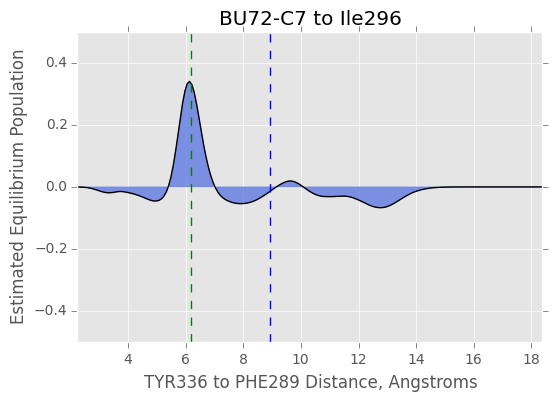

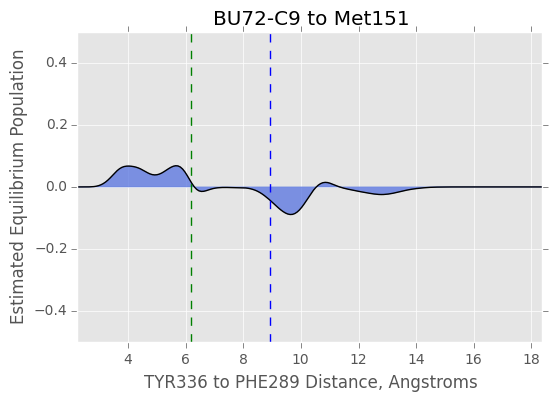

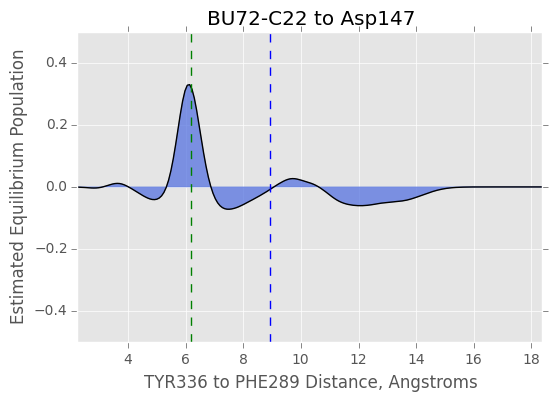

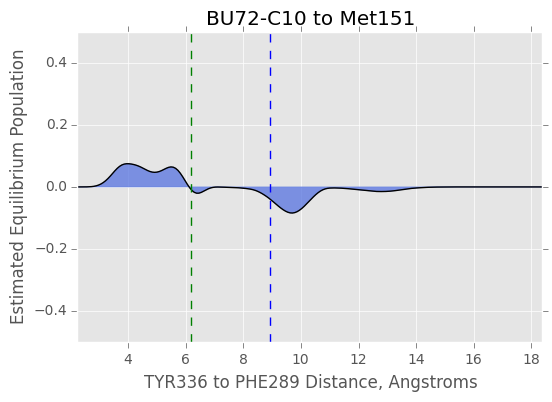

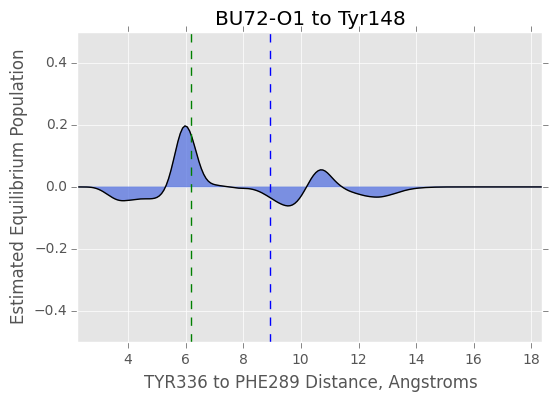

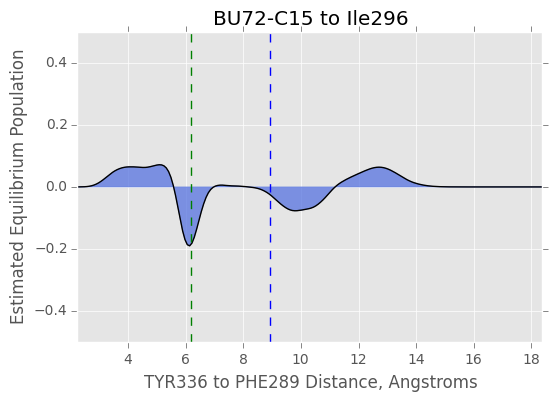

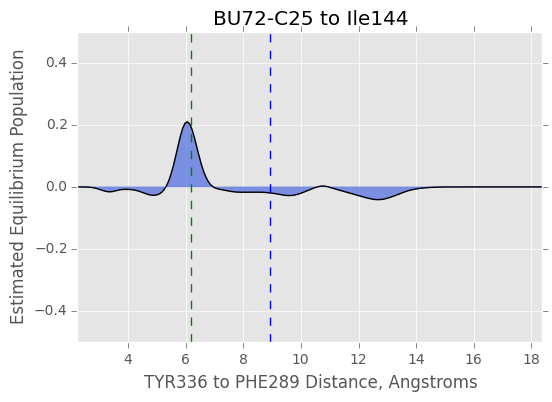

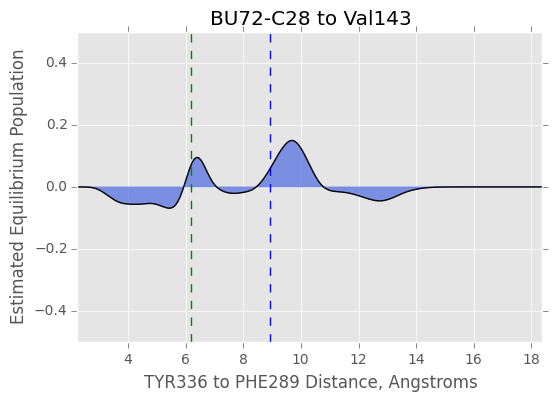

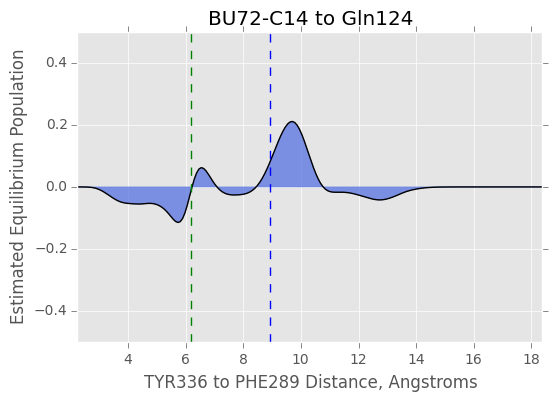

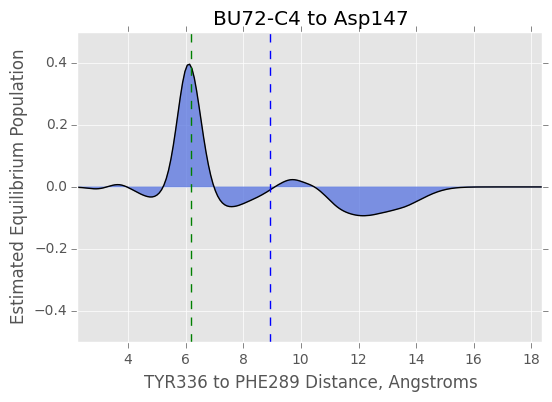

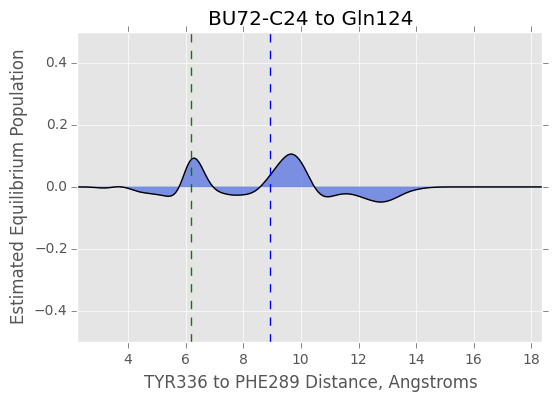

Couldn't plot, likely due to singular matrix.
Couldn't plot, likely due to singular matrix.
Traceback (most recent call last):
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 345, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/home/enf/software/anaconda/lib/python2.7/inspect.py", line 451, in getsourcefile
    if os.path.exists(filename):
  File "/home/enf/software/anaconda/lib/python2.7/genericpath.py", line 26, in exists
    os.stat(path)
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 363, in _fixed_getinnerframes
    lines = ulinecache.getlines(file)[start:end]
  File "/home/enf/software/anaconda/lib/python2.7/site-packages/IPyt


Unfortunately, your original traceback can not be constructed.

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

In [155]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
plt.clf()

importances_df = pd.DataFrame(onehot_importances, columns=pp_names_onehot, index=lp_names_onehot)
protein_features = ["PHE289 to ASN150", "tm6_tm3_packing", "MET281_CA to MET161_CA", "TYR336 to PHE289", "HIS319 to TYR75"]
plot_lp_pp_model_outcomes(importances_df, onehot_scores, analysis_dir, pd.concat(all_traj_features, axis=0), n_pp_features=25,
                                  n_lp_features=75, protein_features=protein_features, ref_features_df=ref_features)

In [138]:
save_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/clusters1000_n_components10_n_samples10_random'

In [137]:
analysis_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time'

In [136]:
#protein_features = ["PHE289 to ASN150", "tm6_tm3_packing", "MET281_CA to MET161_CA", "TYR336 to PHE289", "HIS319 to TYR75"]
plot_lp_pp_model_outcomes(importances_df, onehot_scores, save_dir, pd.concat(all_traj_features, axis=0), n_pp_features=25,
                                  n_lp_features=50, protein_features=None, ref_features_df=ref_features)

MET281_CA to ILE107_CA < 9.695928
MET281_CA to ILE107_CA
Series([], Name: MET281_CA to ILE107_CA < 9.695928, dtype: float64)
VAL300_CA to LYS233_CA > 13.164589
VAL300_CA to LYS233_CA
Series([], Name: VAL300_CA to LYS233_CA > 13.164589, dtype: float64)
12.174383 < VAL300_CA to LYS233_CA < 13.164589
VAL300_CA to LYS233_CA
Series([], Name: 12.174383 < VAL300_CA to LYS233_CA < 13.164589, dtype: float64)
SER329_CA to ASN86_CA > 11.835285
SER329_CA to ASN86_CA
Series([], Name: SER329_CA to ASN86_CA > 11.835285, dtype: float64)
THR315_CA to ILE71_CA > 21.589885
THR315_CA to ILE71_CA
Series([], Name: THR315_CA to ILE71_CA > 21.589885, dtype: float64)
LYS174 to PHE178 > 9.461942
LYS174 to PHE178
Series([], Name: LYS174 to PHE178 > 9.461942, dtype: float64)
7.455069 < LYS174 to PHE178 < 9.461942
LYS174 to PHE178
Series([], Name: 7.455069 < LYS174 to PHE178 < 9.461942, dtype: float64)
6.331220 < LYS174 to PHE178 < 7.455069
LYS174 to PHE178
Series([], Name: 6.331220 < LYS174 to PHE178 < 7.455069, 

In [155]:
import mdentropy
from mdentropy.core.information import ncmutinf


"""
Compute Transfer Entropy between all pairs of features
from a list of timeseries data.
----------
Parameters:

featurized_timeseries: list
  List of Numpy arrays, each with shape (n_frames, n_features).
lag_time: int
  Lag time to be used in computation of Transfer Entropy
feature_names: list of str
  If your features have names (e.g., "Arg325" or "Temp.in Kansas"),
  you can optionally include them here.

Returns:
tentropy_pairs: Numpy array of shape (1, n_features^2-n_features), containing
  the transfer entropy between each possible pair of features.
tentropy_pairs_id_tuples: List of tuples of ints. 
 In same order as columns of tentropy_pairs.
 Each tuple contains two ints describing the ids of the features for which
 tentropy was calculated. 
tentropy_pairs_names: List of tuples of strings.

Caveats:
Implemented weighted mean is not optimal and may not be numerically stable.
This is an area for improvement.
"""
def compute_tentropy_pairs(featurized_timeseries, lag_time,
                           feature_names=None):

  total_frames = 0.
  n_vars = featurized_timeseries[0].shape[1]
  n_tent_pairs = n_vars ** 2 - n_vars
  tentropy_pairs = np.zeros((1, n_tent_pairs))
  tentropy_pairs_names = []

  for t_id, t in enumerate(featurized_timeseries):
    print("Examining trajectory %d" %t_id)
    k = 0
    for i in range(0, t.shape[1]):
      for j in range(0, t.shape[1]):
        if i == j: 
          continue
        x = t[lag_time::lag_time, i]
        y = t[::lag_time, j][:-1]
        z = t[::lag_time, i][:-1]
        n_frames = x.shape[0]
        n_bins = np.floor(np.sqrt(n_frames / 5.))
        tent = ncmutinf(n_bins, x, y, z, n_bins)

        tentropy_pairs[k] += tent * n_frames
        if k==0:
          total_frames += n_frames

        k += 1

        if t_id == 0 and feature_names is not None:
          tentropy_pairs_names.append((feature_names[i], 
                                       feature_names[j]))

  tentropy_pairs /= total_frames

  return tentropy_pairs, tentropy_pairs_id_tuples, tentropy_pairs_names

onehot_trajectories = [pd.concat([all_pp_features_onehot[i], 
                                  all_lp_features_onehot[i]], axis=1).values for i in range(0,3)]

all_onehot_names = pp_names_onehot + lp_names_onehot
tentropy_pairs, tentropy_pairs_id_tuples, tentropy_pairs_names = compute_tentropy_pairs(onehot_trajectories, 25, all_onehot_names)

ImportError: No module named mdentropy

In [154]:
os.chdir("/home/enf/software/mdentropy")
import subprocess
subprocess.call(['python', 'setup.py', 'develop'])
os.chdir("/home/enf/b2ar_analysis/conformation")

In [148]:
[n for n in importances_df.columns.values.tolist() if "PHE289" in n]

['TYR336 to PHE289 < 8.597809',
 '8.597809 < TYR336 to PHE289 < 11.662846',
 'TYR336 to PHE289 > 11.662846',
 'PHE289 to ASN150 < 7.544394',
 '7.544394 < PHE289 to ASN150 < 13.636208',
 '13.636208 < PHE289 to ASN150 < 17.079408',
 'PHE289 to ASN150 > 17.079408',
 'TRP293-CD2 to PHE289-CG: Pi Parallel < 0.002012',
 'TRP293-CD2 to PHE289-CG: Pi Parallel > 0.002012',
 'TRP293-CG to PHE289-CG: Pi Parallel < 0.502513',
 'TRP293-CG to PHE289-CG: Pi Parallel > 0.502513',
 'TRP293-CD2 to PHE289-CG: Pi T < 0.507538',
 'TRP293-CD2 to PHE289-CG: Pi T > 0.507538',
 'TRP293-CG to PHE289-CG: Pi T < 0.507538',
 'TRP293-CG to PHE289-CG: Pi T > 0.507538']

In [124]:
importances_df = pd.DataFrame(onehot_importances, columns=pp_names_onehot, index=lp_names_onehot)
#importances_df["mOR tIC.5"].loc[[n for n in importances_df.index.values.tolist()]].abs().sort(inplace=False, ascending=False)
#importances_df["PHE289 to ASN150"].abs().sort(inplace=False, ascending=False).iloc[:100]
prot_feature = "7.544394 < PHE289 to ASN150 < 13.636208"
#prot_feature =  '13.636208 < PHE289 to ASN150 < 17.079408'
#"MET281_CA to MET161_CA > 10.289191"
df = importances_df[prot_feature].abs().sort(inplace=False, ascending=False)
importances_df = importances_df[prot_feature].loc[[n for n in df.index.values.tolist() if "<" in n]].iloc[:100]



we are operating on biox3
[ 5.9295125  9.7176075]
Lig900-C7 to Trp293


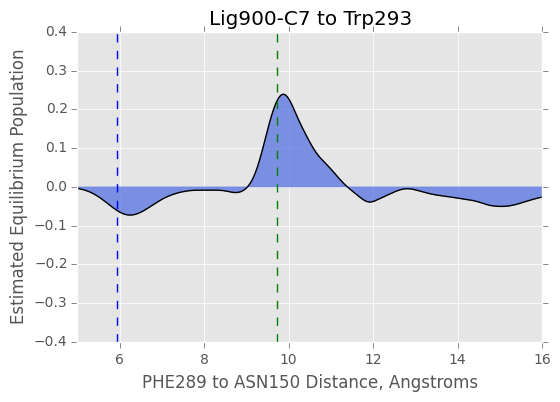

Lig900-C6 to Trp293


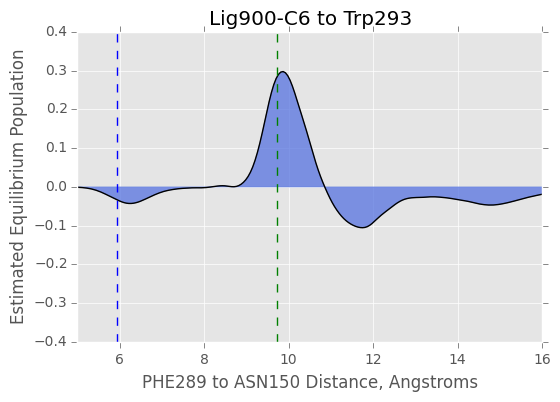

Lig900-C21 to Gln124


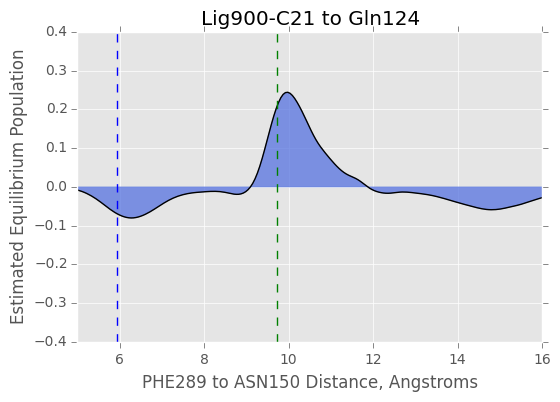

Lig900-C19 to Tyr326


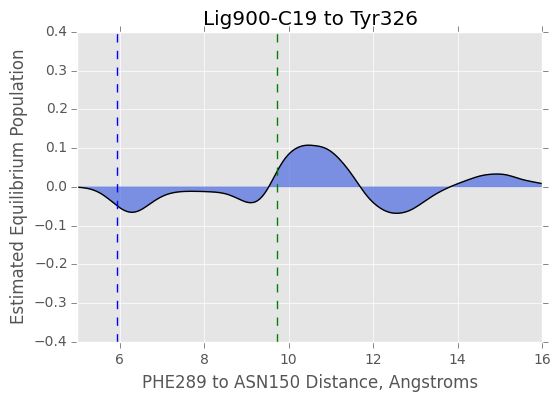

Lig900-C3 to Tyr326


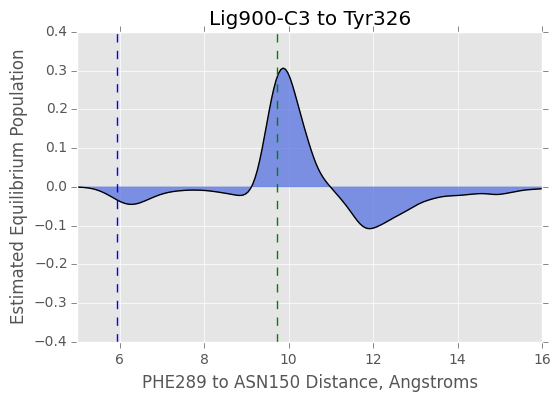

Lig900-C16 to Gln124


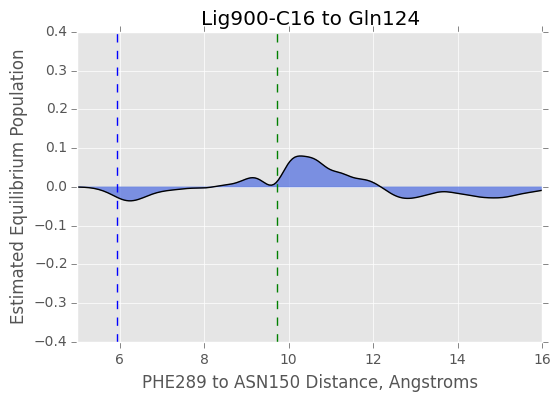

Lig900-C1 to Asp147


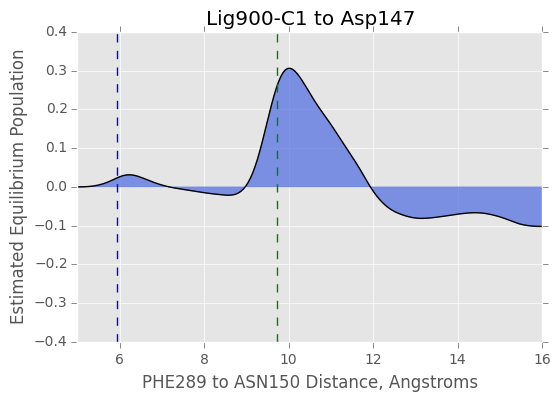

Lig900-C13 to Asp147


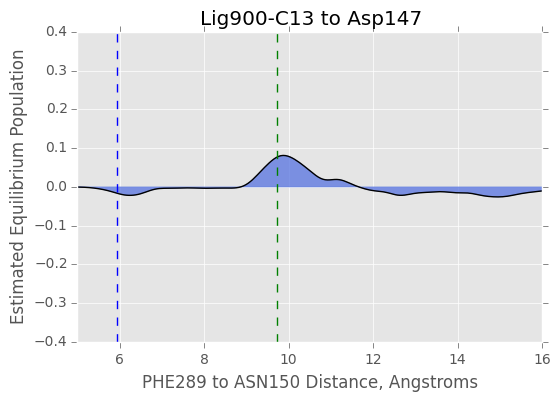

Lig900-C7 to His297


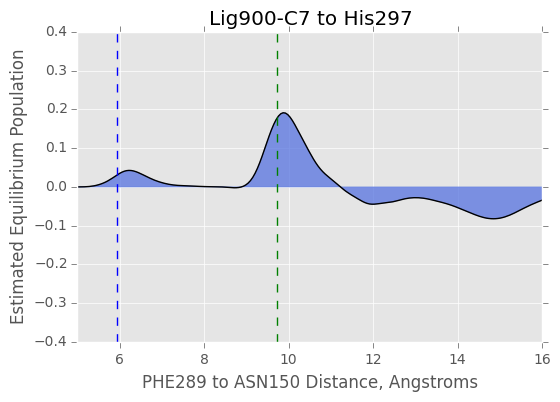

Lig900-C9 to Ile296


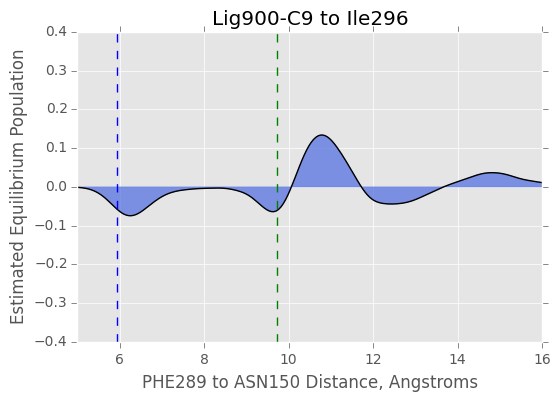

Lig900-C28 to Val143


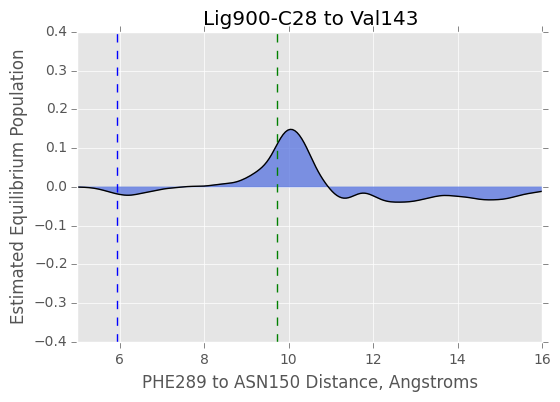

Lig900-C4 to Tyr326


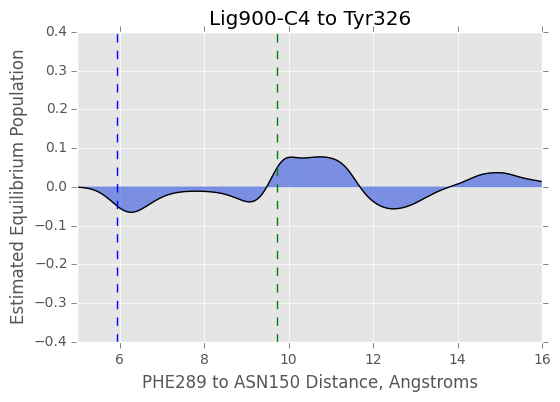

Lig900-C7 to Met151


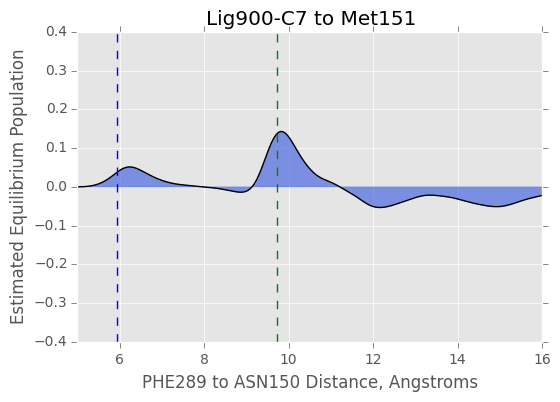

Lig900-C26 to Trp133


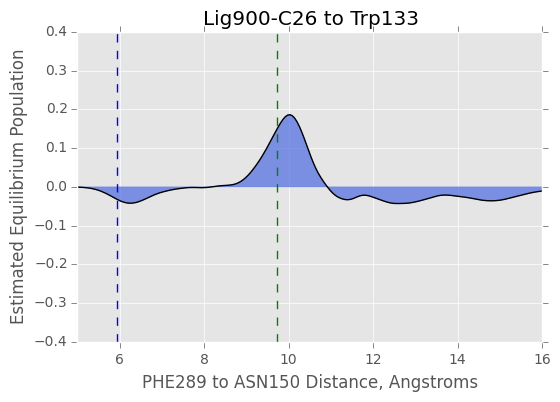

Lig900-C24 to Ile144


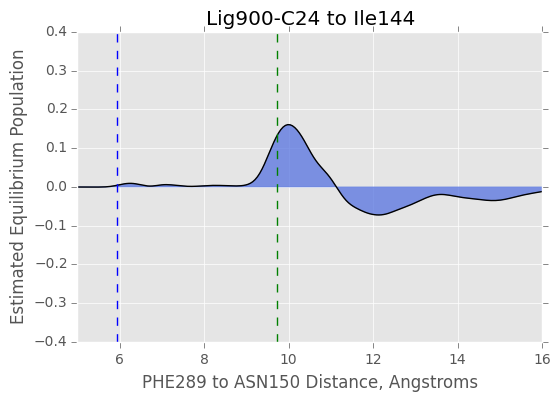

Lig900-C15 to Trp318


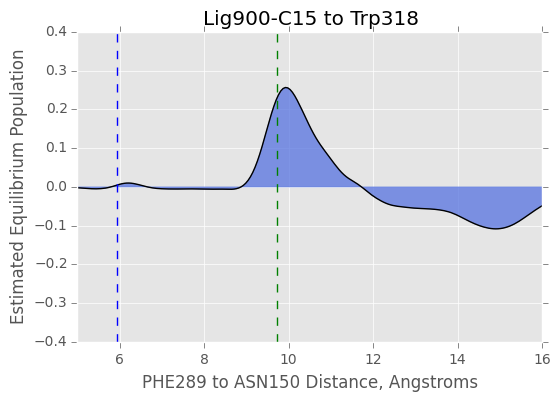

Lig900-C8 to Trp293


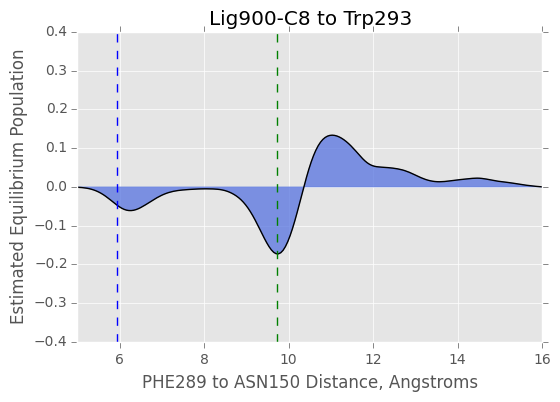

Lig900-C19 to Gln124


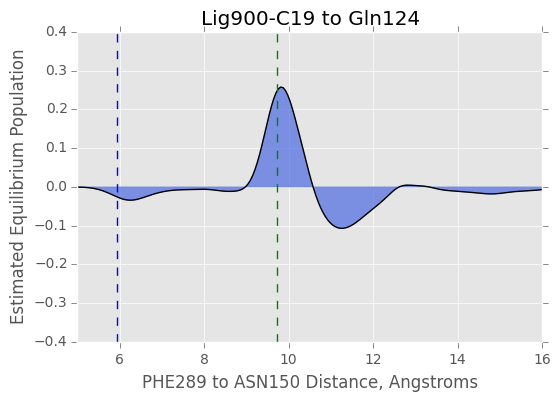

Lig900-C22 to Gln124


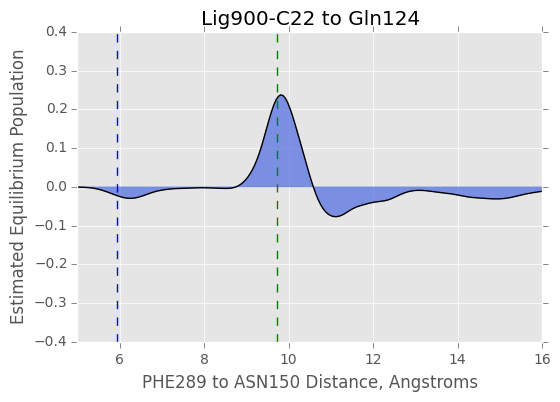

Lig900-C6 to Met151


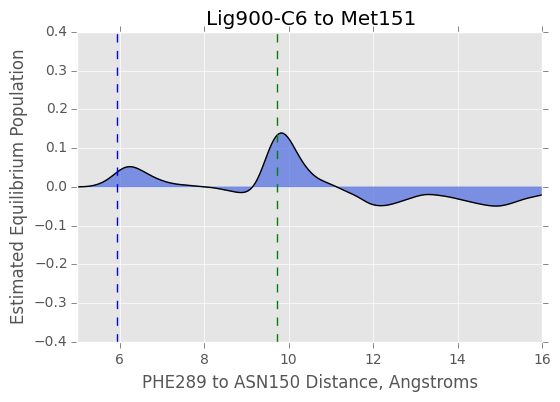

Lig900-C10 to Val236


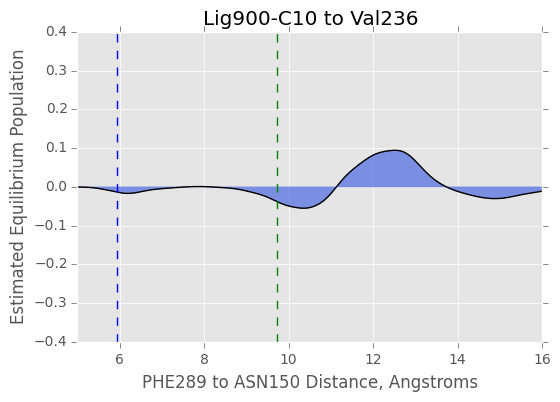

Lig900-C8 to His297


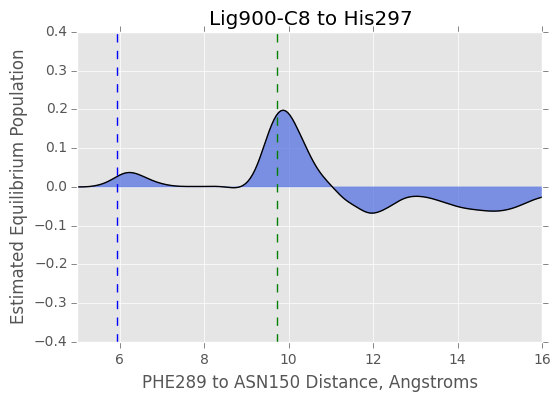

Lig900-C20 to Tyr326


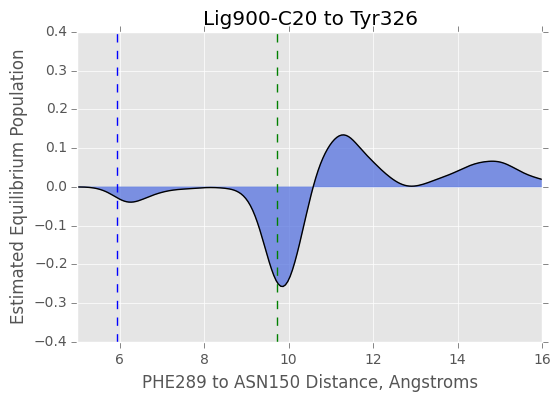

Lig900-C4 to Gly325


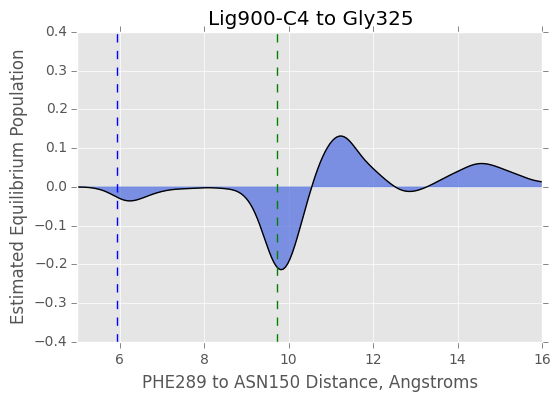

Lig900-O2 to Ile296


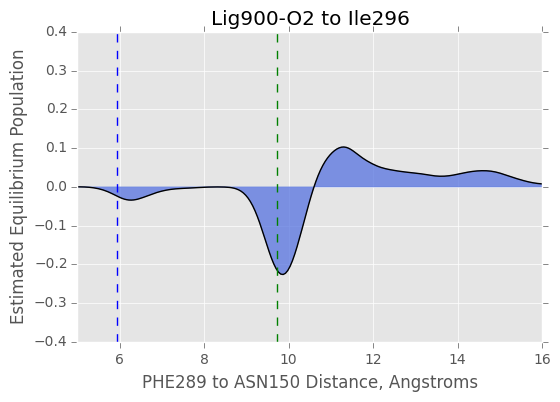

Lig900-O1 to Ala240


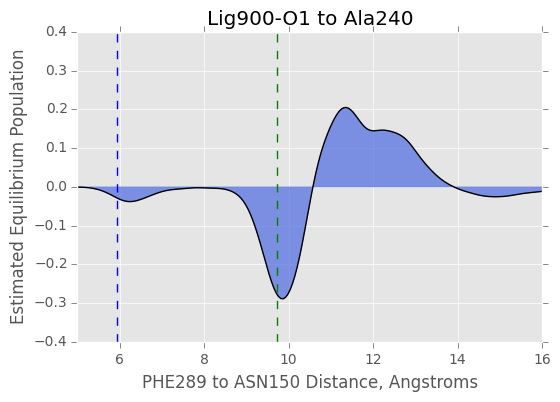

Lig900-C24 to Gln124


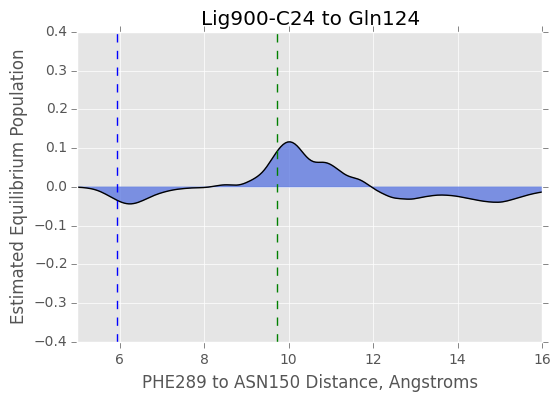

In [125]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
#prot_feature = "MET281_CA to MET161_CA"
prot_feature = "PHE289 to ASN150"
data = pd.concat(all_traj_features, axis=0).iloc[::10]
crystal_values = ref_features[prot_feature].values.flatten()
print(crystal_values)

for i in range(0, 50):
    lig_feature = importances_df.index.values.tolist()[i]
    importance = importances_df.values.flatten()[i]
    if "<" in lig_feature and importance > 0.:
        lig_feature = lig_feature.split(" <")[0]
    else:
        continue
    print(lig_feature)
    data_i = data.loc[data[lig_feature] < 5.][prot_feature].values
    data_j = data.loc[data[lig_feature] > 5.][prot_feature].values


    #data_i = features_eq.loc[features_eq[feature_name] < 5.][prot_feature].values
    #data_j = features_eq.loc[features_eq[feature_name] > 5.][prot_feature].values
        #data_i = y.loc[x[df.index.values[i]] == 1.][feature].values
        #data_j = y.loc[x[df.index.values[i]] == 0.][feature].values
        #if len(np.where(data > 10.)[0]) < 5*len(np.where(data < 10.)[0]): continue
        #if len(np.where(data > 10.)[0]) < 150: continue
    title_i = lig_feature.replace("Lig900", "BU72")
    title_j = "Not %s" %df.index.values[i].replace("Lig900", "BU72")
        #compute_and_plot_single_kde(data_i, title_i, 
        #                            "Phe289 to Asn150 Distance, Angstroms", "%s/%s.pdf" %(analysis_dir,title_i), custom_bounds=[5,16], custom_y_bounds=[0,.6])
        #compute_and_plot_single_kde(data_j, title_j, 
        #                            "Phe289 to Asn150 Distance, Angstroms", "%s/%s.pdf" %(analysis_dir,title_j), custom_bounds=[5,16], custom_y_bounds=[0,.6])
    compute_and_plot_kde_difference(data_i, data_j, lig_feature, "%s Distance, Angstroms" %prot_feature, "%s/%s_difference.pdf" %(analysis_dir,title_i), custom_bounds=[5,16], custom_y_bounds=[-.4,.4], crystal_values=crystal_values)
        

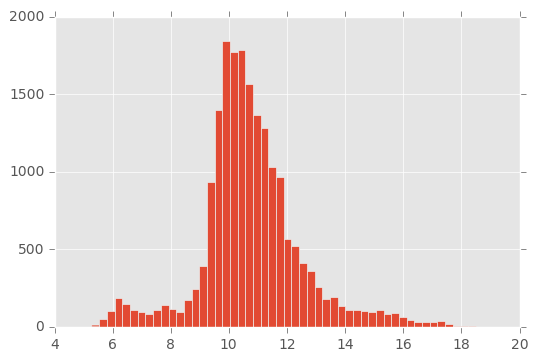

In [104]:
plt.hist(features_eq["PHE289 to ASN150"].values, bins=50)
plt.show()

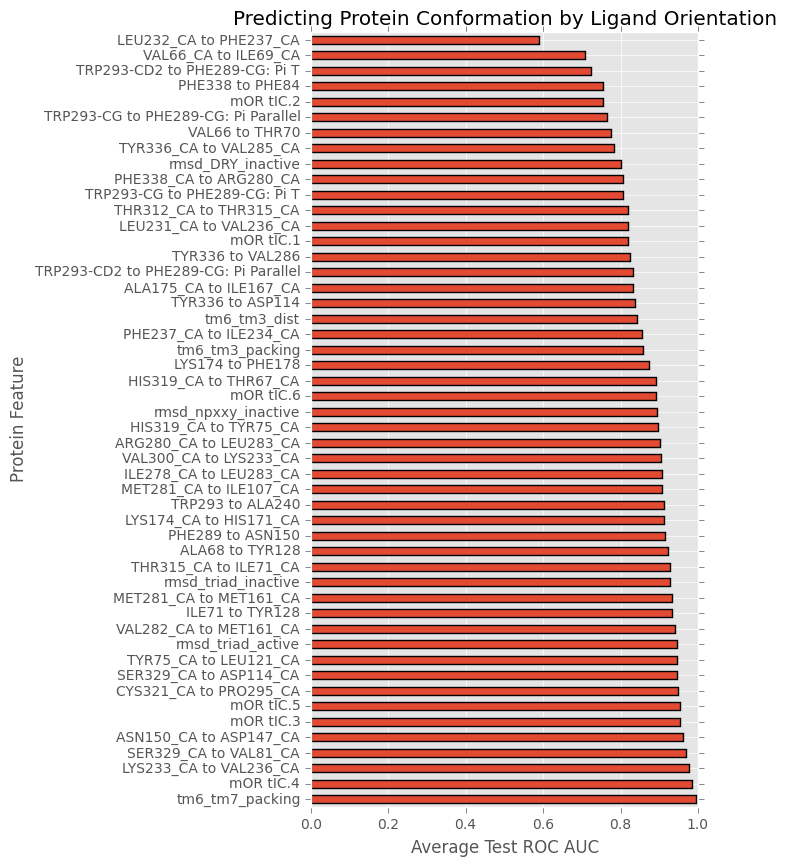

In [256]:
reload(matplotlib)
r2_scores_df = pd.Series(scores, index=y.columns).sort(ascending=False, inplace=False)
r2_scores_df = r2_scores_df.loc[r2_scores_df > 0.]
title = "Predicting Protein Conformation by Ligand Orientation"
r2_scores_df.plot(kind='barh', title=title, figsize=(5,10))
plt.xlabel("Average Test ROC AUC")
plt.ylabel("Protein Feature")
plt.savefig("%s/all_features_oneshot_%s.pdf" %(analysis_dir, title))
plt.show()

In [257]:
r2_scores_df

tm6_tm7_packing                         0.994902
mOR tIC.4                               0.984465
LYS233_CA to VAL236_CA                  0.976390
SER329_CA to VAL81_CA                   0.968258
ASN150_CA to ASP147_CA                  0.961803
mOR tIC.3                               0.952887
mOR tIC.5                               0.952114
CYS321_CA to PRO295_CA                  0.949023
SER329_CA to ASP114_CA                  0.945676
TYR75_CA to LEU121_CA                   0.945465
rmsd_triad_active                       0.945344
VAL282_CA to MET161_CA                  0.941435
ILE71 to TYR128                         0.931864
MET281_CA to MET161_CA                  0.931748
rmsd_triad_inactive                     0.926398
THR315_CA to ILE71_CA                   0.926366
ALA68 to TYR128                         0.921020
PHE289 to ASN150                        0.915225
LYS174_CA to HIS171_CA                  0.912779
TRP293 to ALA240                        0.912695
MET281_CA to ILE107_

In [160]:
"%s/all_features_oneshot_%s.pdf" %(analysis_dir, title)

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time/all_features_oneshot_Predicting Protein Conformation by Ligand Orientation.pdf'

In [174]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *

import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

we are operating on biox3


In [ ]:
if not os.path.exists("%s/all_features_multionehot_rfr_scores.h5" %analysis_dir):
    scores, importances = compute_rf_matrix(x.values, y_classified.values, n_trees=500, max_depth=3, n_folds=5, task="regression")
    verbosedump(scores, "%s/all_features_multionehot_classified_rfr_scores.h5" %analysis_dir)
    verbosedump(importances, "%s/all_features_multionehot_classified_rfr_importances.h5" %analysis_dir)
else:
    scores = verboseload("%s/all_features_multionehot_classified_rfr_scores.h5" %analysis_dir)
    importances = verboseload("%s/all_features_multionehot_classified_rfr_importances.h5" %analysis_dir)

#if not os.path.exists("%s/all_features_rfr_r2_scores.h5" %analysis_dir):
#    print("hi")
#r2_scores, importances = compute_rf_matrix(x.values, y.values, n_trees=500, n_folds=10)
#verbosedump(r2_scores, "%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#verbosedump(importances, "%s/all_features_rfr_importances.h5" %analysis_dir)
#else:
#r2_scores = verboseload("%s/all_features_rfr_r2_scores.h5" %analysis_dir)
#importances = verboseload("%s/all_features_rfr_importances.h5" %analysis_dir)

In [ ]:
scores_df = pd.Series(scores, index=y.columns)
scores_df.sort(inplace=False)

In [ ]:
#pearson_matrix = compute_pearson_matrix(x.values, y.values)
#pearson_df = pd.DataFrame(pearson_matrix, columns=y.columns, index=x.columns)
pearson_df["tm6_tm3_packing"].abs().sort(inplace=False)

In [282]:
importances_df = pd.DataFrame(importances, columns=y_classified.columns, index=x.columns)
#importances_df["mOR tIC.5"].loc[[n for n in importances_df.index.values.tolist()]].abs().sort(inplace=False, ascending=False)
#importances_df["PHE289 to ASN150"].abs().sort(inplace=False, ascending=False).iloc[:100]
df = importances_df["MET281_CA to MET161_CA"].abs().sort(inplace=False, ascending=False)
df.loc[[n for n in df.index.values.tolist() if "<" in n]]


Lig900-O1 to Trp293 < 5.000000     4.670399e-02
Lig900-C15 to Cys321 < 5.000000    4.034373e-02
Lig900-C8 to Gly325 < 5.000000     3.563339e-02
Lig900-C16 to Gly325 < 5.000000    2.991167e-02
Lig900-O2 to Cys321 < 5.000000     2.831177e-02
Lig900-C7 to Trp293 < 5.000000     2.825973e-02
Lig900-C25 to Trp318 < 5.000000    2.268899e-02
Lig900-C17 to Gly325 < 5.000000    2.056824e-02
Lig900-C16 to Cys321 < 5.000000    1.820040e-02
Lig900-O1 to Val236 < 5.000000     1.758817e-02
Lig900-O1 to His297 < 5.000000     1.080493e-02
Lig900-C9 to Trp293 < 5.000000     9.923209e-03
Lig900-C6 to Gly325 < 5.000000     9.116734e-03
Lig900-C9 to His297 < 5.000000     8.858442e-03
Lig900-C8 to Met151 < 5.000000     7.773027e-03
Lig900-C7 to His297 < 5.000000     7.681886e-03
Lig900-C21 to Gln124 < 5.000000    7.247416e-03
Lig900-C24 to Trp318 < 5.000000    7.190780e-03
Lig900-C7 to Met151 < 5.000000     6.536707e-03
Lig900-C13 to Ile296 < 5.000000    6.518591e-03
Lig900-C15 to Trp318 < 5.000000    6.506

In [ ]:
plt.clf()
plt.hist(pd.concat(all_traj_features,axis=0)["PHE289 to ASN150"].values, bins=50)
plt.show()

we are operating on biox3


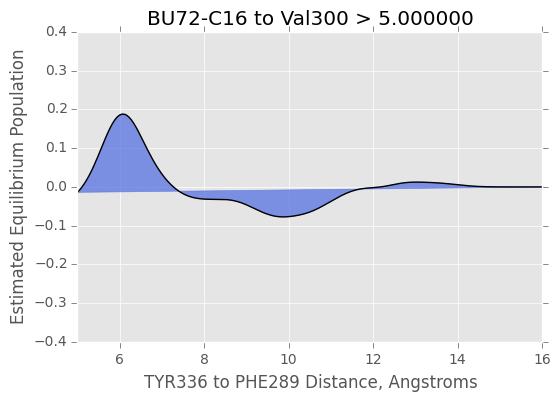

In [304]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
feature = "TYR336 to PHE289"
plt.clf()
#for i in range(0,100):
#    if "Tyr326" in df.index.values[i]:
data_i = y.loc[features_eq["Lig900-N1 to Tyr326"] < 5.][feature].values
data_j = y.loc[features_eq["Lig900-N1 to Tyr326"] > 5.][feature].values
        #data_i = y.loc[x[df.index.values[i]] == 1.][feature].values
        #data_j = y.loc[x[df.index.values[i]] == 0.][feature].values
        #if len(np.where(data > 10.)[0]) < 5*len(np.where(data < 10.)[0]): continue
        #if len(np.where(data > 10.)[0]) < 150: continue
title_i = df.index.values[i].replace("Lig900", "BU72")
title_j = "Not %s" %df.index.values[i].replace("Lig900", "BU72")
        #compute_and_plot_single_kde(data_i, title_i, 
        #                            "Phe289 to Asn150 Distance, Angstroms", "%s/%s.pdf" %(analysis_dir,title_i), custom_bounds=[5,16], custom_y_bounds=[0,.6])
        #compute_and_plot_single_kde(data_j, title_j, 
        #                            "Phe289 to Asn150 Distance, Angstroms", "%s/%s.pdf" %(analysis_dir,title_j), custom_bounds=[5,16], custom_y_bounds=[0,.6])
compute_and_plot_kde_difference(data_i, data_j, title_i, "%s Distance, Angstroms" %feature, "%s/%s_difference.pdf" %(analysis_dir,title_i), custom_bounds=[5,16], custom_y_bounds=[-.4,.4])
        

In [281]:
y_classified["tm6_tm3_packing"]

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       0
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       0
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       0
43       0
44       1
45       0
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
86       1
87       1
88       1
89       1
90       1

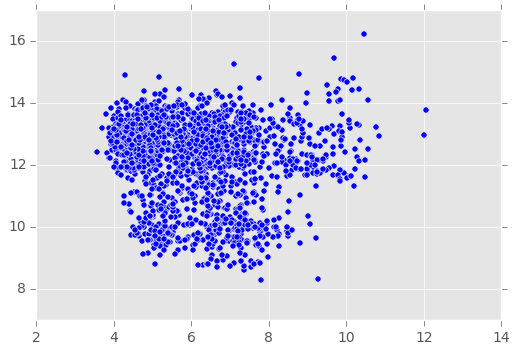

In [269]:
plt.scatter(features_eq["Lig900-N1 to Tyr326"].iloc[::10], features_eq["tm6_tm3_packing"].iloc[::10])
plt.show()

In [262]:
data_i

KeyboardInterrupt: 

In [176]:
analysis_dir

'/home/enf/md_simulations/MOR/h8_reimaged/sparse-tICA_t50_n_components10bp_residues_4dkl_5c1m_restricted_pairs_10A_regularization_wolf_autoShrinkage_rho0pt01-normalized-aromatic-binarize/analysis_n_clusters1000_random-1500clusters_25lag-time'

In [ ]:
#import matplotlib
#matplotlib.style.use('ggplot')
#from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from plots import *
sc = StandardScaler()

#importances_scaled = pearson_matrix.T
#importances_scaled = sc.fit_transform(importances)
importances_scaled = copy.deepcopy(importances)
#for j in range(0, importances_scaled.shape[1]):
#    importances_scaled[:,j] *= r2_scores[j]

#responses_to_keep = np.where(np.array(r2_scores) > 0.5)[0]
#importances_scaled = importances_scaled[:,responses_to_keep]
#predictors_to_keep = list(set(np.where(importances_scaled > 0.03)[0].tolist()))
#print(responses_to_keep)
#print(predictors_to_keep)
#importances_scaled = importances_scaled[predictors_to_keep,:]
#print(len(responses_to_keep))

row_labels = ["bu72 tIC.%d" %i for i in range(1, n_components+1)]
column_labels = ["mOR tIC.%d" %i for i in range(1, pp_n_components+1)]
#row_labels = x.columns.values[predictors_to_keep]
#column_labels = y.columns.values[responses_to_keep]

importance_df = pd.DataFrame(importances_scaled, columns=column_labels, index=row_labels)

plot_clustermap(importance_df, save_file="%s/all_features_rfr_feature_importances.pdf" %(analysis_dir), method='average', row_cluster=False, col_cluster=False, z_score=None, xtick_labelsize=8, ytick_labelsize=8)
plt.show()

"""

plot_clustermap(importances_df, save_file="%s/feature_importances.pdf" %(save_dir, experiment_name), method='average', z_score=None)



fig = plt.figure()
ax = fig.add_subplot(111)
heatmap = ax.pcolor(np.abs(pearson_matrix), cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(pearson_matrix.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(pearson_matrix.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False, rotation=270)
ax.set_yticklabels(column_labels, minor=False)
fig.subplots_adjust(bottom=0.2)

fig.savefig("%s/bu72_vs_pp_pearson_heatmap.svg" % analysis_dir, format='svg', dpi=1200)
plot_file = "%s/bu72_vs_pp_pearson_heatmap.pdf" % analysis_dir
pp = PdfPages(plot_file)

pp.savefig(fig)

pp.close()  
plt.show()
"""

In [ ]:
from jointplot_d3 import *
titles_j = [f for f in features_eq.columns.values if "Lig" in f and "Tyr326" in f]
print(titles_j)
jointplots(features_eq[titles_j].values, analysis_dir, titles=titles_j,
                           main = "mOR MSM", refcoords=None, refcoords_j=None, axes=None,
                               data_j=features_eq[["tm6_tm3_packing"]].values, titles_j=["tm6_tm3_packing"], reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    

r2_scores

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots(importances, plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=2, ref_df=None, save_dir=None):
    corr_matrix = importances.T
    ori_shape = np.shape(corr_matrix)
    
    if r2s is None:
        r2s = np.max(importances, axis=0)
    
    bu72_order = np.argsort(-1.0*r2s)
    all_features = []
    if features is None:
        for k, prot_idx in enumerate(bu72_order):
            if k == n_tICs:
                break
            lig_order = np.argsort(-1.0*importances[:,prot_idx])
            #if prot_idx != 9: continue
            print(lig_order)
            for l, lig_idx in enumerate(lig_order):
                if l == n_lig_tICs:
                    break
            
                features = []

                print("mOR tIC.%d" %(k+1))
                prot_features = ["mOR tIC.%d" %(prot_idx+1)]
                if custom_features is not None:
                    prot_features += custom_features[0]
                lig_features = ["bu72 tIC.%d" %(lig_idx+1)]
                all_prot_features = [str(f) for f in top_features_per_tIC_i[prot_idx]]
                all_lig_features = [str(f) for f in top_features_per_tIC_j[lig_idx]]
                pearson_matrix = compute_pearson_matrix(plmf[all_prot_features].values, plmf[all_lig_features].values)
                pearson_shape = pearson_matrix.shape
                inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(pearson_matrix).ravel()), pearson_shape))[0]
                prot_inds = []
                lig_inds = []

                for j, ind in enumerate([idx[0] for idx in inds]):
                    if len(prot_inds) == max_features: break
                    if ind in prot_inds: continue
                    prot_features.append(str(top_features_per_tIC_i[prot_idx][ind]))
                    prot_inds.append(ind)

                if custom_features is not None:
                    features += custom_features[0]

                for j, ind in enumerate([idx[1] for idx in inds]):
                    if len(lig_inds) == max_features: break
                    if ind in lig_inds: continue
                    lig_features.append(str(top_features_per_tIC_j[lig_idx][ind]))
                    lig_inds.append(ind)

                if make_jointplots:
                    print("Creating joint deltaG plots.")
                    data_i = features_eq[prot_features+all_prot_features].values
                    print(data_i.shape)
                    data_j = features_eq[lig_features+all_lig_features].values
                    print(data_j.shape)
                    tic_save_dir = "%s/mOR_tIC%d_vs_bu72_tIC%d" %(save_dir, prot_idx+1, lig_idx+1)
                    if not os.path.exists(tic_save_dir):
                        os.makedirs(tic_save_dir)
                    #else:
                    #    continue
                    
                    
                    if ref_df is not None:
                        refcoords = ref_df[prot_features+all_prot_features].values
                        print(refcoords.shape)
                        refcoords_j = ref_df[lig_features+all_lig_features].values
                        print(refcoords_j.shape)
                    else:
                        refcoords = None
                        refcoords_j = None

                    jointplots(data_i, tic_save_dir, titles=prot_features+all_prot_features,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                               data_j=data_j, titles_j=lig_features+all_lig_features, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    
                    jointplots(data_i, tic_save_dir, titles=prot_features+all_prot_features,
                               main = "mOR MSM", refcoords=refcoords, axes=None,
                               data_j=None, titles_j=None, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                    
                    jointplots(data_j, tic_save_dir, titles=lig_features+all_lig_features,
                           main = "mOR MSM", refcoords=refcoords_j, refcoords_j=refcoords, axes=None,
                               data_j=data_i, titles_j=prot_features+all_prot_features, reshape=False, max_tIC=20, 
                               min_density=None, max_diff=5., custom_lims=None, 
                               n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)

                features += (prot_features + lig_features)
    
                #plot_df_rolling(plmf[features].iloc[::subsample], "%s/key_measurements_tIC%d.pdf" %(save_dir, prot_idx+1), True, smoothing=smoothing, include_original=False, subplots=True, min_periods=None)
                #plt.show()  
                all_features.append(features)
    #features = ["tm6_tm3_packing", "rmsd_npxxy_active"]
    #features = ["mOR tIC.1", "mOR tIC.4", "mOR tIC.5"]
    #inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(corr_matrix).ravel()), ori_shape))[0]
    return all_features

jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

all_features= make_msm_features_plots(importances, protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      r2s = np.array(r2_scores), subsample=1, smoothing=100,
                                      n_tICs=5, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=None, save_dir=jointplots_dir)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

In [ ]:
protein_ligand_msm_featurized.columns.values.tolist()

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots(importances, plmf, features_i, features_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=100, ref_df=None, save_dir=None):
    corr_matrix = importances.T
    ori_shape = np.shape(corr_matrix)
    
    if r2s is None:
        r2s = np.max(importances, axis=0)
    
    bu72_order = np.argsort(-1.0*r2s)
    all_features = []
    if features is None:
        for k, prot_idx in enumerate(bu72_order):
            if k == n_tICs:
                break
            lig_order = np.argsort(-1.0*importances[:,prot_idx])
            
            if "PHE289 to ASN150" not in str(features_i[prot_idx]): continue
            
            all_prot_features = [str(features_i[prot_idx])]
            all_lig_features = [str(features_j[lig_idx]) for lig_idx in lig_order[:n_lig_tICs]]
            

            features = []
            prot_features = []
            lig_features = []

            if make_jointplots:
                print("Creating joint deltaG plots.")
                data_i = features_eq[prot_features+all_prot_features].values
                print(data_i.shape)
                data_j = features_eq[lig_features+all_lig_features].values
                print(data_j.shape)

                if ref_df is not None:
                    refcoords = ref_df[prot_features+all_prot_features].values
                    print(refcoords.shape)
                    refcoords_j = ref_df[lig_features+all_lig_features].values
                    print(refcoords_j.shape)
                    combined_refcoords = np.hstack([refcoords, refcoords_j])
                    custom_refcoords = ref_df[custom_features[0]].values
                else:
                    refcoords = None
                    refcoords_j = None
                    combined_refcoords = None
                    custom_refcoords = None

                jointplots(data_i, save_dir, titles=prot_features+all_prot_features,
                       main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=lig_features+all_lig_features, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8, custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                
                jointplots(data_j, save_dir, titles=lig_features + all_lig_features, 
                       main = "mOR MSM", refcoords=refcoords_j, refcoords_j=refcoords, axes=None,
                           data_j=data_i, titles_j=prot_features+all_prot_features, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)
                
                jointplots(np.hstack([data_i, data_j]), save_dir, titles=prot_features+all_prot_features+lig_features+all_lig_features,
                       main = "mOR MSM", refcoords=combined_refcoords, refcoords_j=custom_refcoords, axes=None,
                           data_j=features_eq[custom_features[0]].values, titles_j=custom_features[0], reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, remake=False)

    #features = ["tm6_tm3_packing", "rmsd_npxxy_active"]
    #features = ["mOR tIC.1", "mOR tIC.4", "mOR tIC.5"]
    #inds = np.dstack(np.unravel_index(np.argsort(-1.0*np.abs(corr_matrix).ravel()), ori_shape))[0]
    return all_features

jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

all_features= make_msm_features_plots(importances, protein_ligand_msm_featurized,
                                      y.columns, x.columns, n_combs=5,
                                      r2s = np.array(scores), subsample=1, smoothing=100,
                                      n_tICs=20, max_features=1,
                                      #custom_features = None,
                                      custom_features=[[], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=ref_features, save_dir=jointplots_refcoords_dir)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

In [ ]:
jointplots_dir

In [ ]:
names

In [ ]:
features_eq[ 'Lig1-C13 to Lys233']

In [ ]:
tpt_paths_features

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots_single(importances, plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, r2s = None, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=1, ref_df=None, save_dir=None, prot_pairs=[],
                            tpt_paths=None):

    for t, prot_pair in enumerate(prot_pairs):
        if t == n_tICs:
            break
        #if prot_pair[1] != 4: continue
        tIC_i, tIC_j = prot_pair
        tic_save_dir = "%s/tIC%d_tIC%d" %(save_dir, tIC_i+1, tIC_j+1)
        if not os.path.exists(tic_save_dir):
            os.makedirs(tic_save_dir)
        #else:
        #    continue
        
        features_i = ["mOR tIC.%d" %(tIC_i+1)] + [str(f) for f in top_features_per_tIC_i[tIC_i]]
        if custom_features is not None:
            features_i += custom_features[0]
        features_j = ["mOR tIC.%d" %(tIC_j+1)] + [str(f) for f in top_features_per_tIC_i[tIC_j]]
        
        data_i = features_eq[features_i].values
        data_j = features_eq[features_j].values

        if ref_df is not None:
            refcoords = ref_df[features_i].values
            refcoords_j = ref_df[features_j].values
        else:
            refcoords = None
            refcoords_j = None
        
        if tpt_paths is not None:
            paths_i = [p[features_i].values for p in tpt_paths]
            paths_j = [p[features_j].values for p in tpt_paths]
        
            paths_to_display = [p[features_i] for p in tpt_paths]
        else:
            paths_i = None
            paths_j = None
        
        jointplots(data_i, tic_save_dir, titles=features_i,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=features_j, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=5., custom_lims=None, 
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, tpt_paths=paths_i,
                           tpt_paths_j=paths_j)
                            
jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

jointplots_tpt_dir = "%s/jointplots_tpt_annotated" %analysis_dir
if not os.path.exists(jointplots_tpt_dir):
    os.makedirs(jointplots_tpt_dir)

tics_to_examine = [1, 3]
prot_pairs = []
for i in range(0, len(tics_to_examine)):
    for j in range(i+1, len(tics_to_examine)):
        prot_pairs.append((tics_to_examine[i], tics_to_examine[j]))
        prot_pairs.append((tics_to_examine[j], tics_to_examine[i]))
print(prot_pairs)
    
make_msm_features_plots_single(importances, protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      r2s = np.array(r2_scores), subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=apo_features_eq, ref_df=ref_features, save_dir=jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs)
                                      #tpt_paths=None)
#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "bu72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

In [ ]:
import jointplot_d3
reload(jointplot_d3)
from jointplot_d3 import *

def make_msm_features_plots_single(plmf, top_features_per_tIC_i, top_features_per_tIC_j, n_combs=3, n_tICs=3,
                            features=None, max_features=2,
                            subsample=1, smoothing=100, title="Key Measurements", custom_features=None,
                            make_jointplots=True, features_eq=None, n_lig_tICs=1, ref_df=None, save_dir=None, prot_pairs=[],
                            tpt_paths=None, alt_features_eq=None):

    for t, prot_pair in enumerate(prot_pairs):
        #if prot_pair[1] != 4: continue
        tIC_i, tIC_j = prot_pair
        tic_save_dir = "%s/tIC%d_tIC%d" %(save_dir, tIC_i+1, tIC_j+1)
        if not os.path.exists(tic_save_dir):
            os.makedirs(tic_save_dir)
        #else:
        #    continue
        
        features_i = ["mOR tIC.%d" %(tIC_i+1)] + [str(f) for f in top_features_per_tIC_i[tIC_i]]
        if custom_features is not None:
            features_i += custom_features[0]
        features_j = ["mOR tIC.%d" %(tIC_j+1)] + [str(f) for f in top_features_per_tIC_i[tIC_j]]
        
        data_i = features_eq[features_i].values
        data_j = features_eq[features_j].values

        if ref_df is not None:
            refcoords = ref_df[features_i].values
            refcoords_j = ref_df[features_j].values
        else:
            refcoords = None
            refcoords_j =  None
        
        if tpt_paths is not None:
            paths_i = [p[features_i].values for p in tpt_paths]
            paths_j = [p[features_j].values for p in tpt_paths]
        
            paths_to_display = [p[features_i] for p in tpt_paths]
        else:
            paths_i = None
            paths_j = None
        
        if alt_features_eq is not None:
            custom_lims = custom_lim_finder(np.vstack([features_eq[features_i].values, alt_features_eq[features_i].values]))
            custom_lims_j = custom_lim_finder(np.vstack([features_eq[features_j].values, alt_features_eq[features_j].values]))
        else:
            custom_lims = None
            custom_lims_j = None

        
        jointplots(data_i, tic_save_dir, titles=features_i,
                           main = "mOR MSM", refcoords=refcoords, refcoords_j=refcoords_j, axes=None,
                           data_j=data_j, titles_j=features_j, reshape=False, max_tIC=20, 
                           min_density=None, max_diff=8., custom_lims=custom_lims, custom_lims_j=custom_lims_j,
                           n_levels=15, worker_pool=None, parallel=True, n_pts=200j, tpt_paths=paths_i,
                           tpt_paths_j=paths_j, remake=False)
                            
jointplots_refcoords_dir = "%s/refcoords_jointplots" %analysis_dir
if not os.path.exists(jointplots_refcoords_dir):
    os.makedirs(jointplots_refcoords_dir)

apo_jointplots_refcoords_dir = "%s/apo_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(apo_jointplots_refcoords_dir):
    os.makedirs(apo_jointplots_refcoords_dir)

bu72_jointplots_refcoords_dir = "%s/bu72_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(bu72_jointplots_refcoords_dir):
    os.makedirs(bu72_jointplots_refcoords_dir)
    
apo_jointplots_dir = "%s/apo_refcoords_jointplots_8pt0" %analysis_dir
if not os.path.exists(apo_jointplots_refcoords_dir):
    os.makedirs(apo_jointplots_refcoords_dir)

jointplots_dir = "%s/jointplots" %analysis_dir
if not os.path.exists(jointplots_dir):
    os.makedirs(jointplots_dir)

jointplots_tpt_dir = "%s/jointplots_tpt_annotated" %analysis_dir
if not os.path.exists(jointplots_tpt_dir):
    os.makedirs(jointplots_tpt_dir)

tics_to_examine = [1,3,4,7]
prot_pairs = []
for i in tics_to_examine:
    for j in tics_to_examine:
        if j != i:
            prot_pairs.append((i,j))
print(prot_pairs)

make_msm_features_plots_single(protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=features_eq, ref_df=ref_features, save_dir=bu72_jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs, tpt_paths=None, alt_features_eq=apo_features_eq)
                                      #tpt_paths=None)

make_msm_features_plots_single(protein_ligand_msm_featurized,
                                      bu72_pp_tIC_features, all_tIC_features, n_combs=5,
                                      subsample=1, smoothing=100,
                                      n_tICs=10, max_features=1,
                                      #custom_features = None,
                                      custom_features=[["tm6_tm3_packing", "rmsd_npxxy_active", "rmsd_npxxy_inactive"], [], []], 
                                      make_jointplots=True, features_eq=apo_features_eq, ref_df=ref_features, save_dir=apo_jointplots_refcoords_dir,
                                      prot_pairs=prot_pairs, tpt_paths=None, alt_features_eq=features_eq)
                                      #tpt_paths=None)

#custom_features = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "BU72 tIC.4", "(Lig900-C7, Trp293)", "mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "BU72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]
#plot_features = make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features)


#plot_features
#make_msm_features_plot(pearson_matrix, pd.DataFrame(bu72_pp_tica, columns=["mOR tIC.%d" %i for i in range(1,6)]), bu72_pp_tIC_features, all_tIC_features, n_combs=2)

In [ ]:
custom_features_4 = ["mOR tIC.4", "(ASN150, PHE289)", "(ASP114, TYR336)", "(HIS319, TYR75)", "bu72 tIC.4", "(Lig900-C7, Tyr75)", "(Lig900-C7, Trp293)"]
make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features_4, title="Key Measurements: mOR tIC.4")


In [ ]:
custom_features_2 = ["mOR tIC.2", "(MET281_CA, MET161_CA)", "(GLN124, TYR326)", "bu72 tIC.2", "(Lig900-N1, Tyr326)", "(Lig900-C26, Tyr326)"]

make_msm_features_plot(importances, protein_ligand_msm_featurized, bu72_pp_tIC_features, all_tIC_features, n_combs=5, r2s = np.array(r2_scores), features=custom_features_2, title="Key Measurements: mOR tIC.2")




In [55]:
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
coords_bounds_dict = {"tm6_tm3_packing": [(8.0, 10.), (12., 15.)]}
all_traj_files = get_trajectory_files(traj_dir, traj_ext)
trajs_to_watch = reaction_coordinate_sampler([all_traj_files[i] for i in bu72_trajs], ".h5", [t.values for t in all_traj_features], 
                            all_traj_features[0].columns.values.tolist(), coords_bounds_dict, 
                            "%s/trajs_to_watch.csv" %pp_tica_dir)

Analyzing tm6_tm3_packing
{'tm6_tm3_packing': [(44, 'bu72_rep_139.h5'), (239, 'bu72_rep_84.h5'), (258, 'bu72_reseeded_rep_100.h5'), (278, 'bu72_reseeded_rep_119.h5'), (344, 'bu72_reseeded_rep_179.h5'), (350, 'bu72_reseeded_rep_184.h5'), (352, 'bu72_reseeded_rep_186.h5'), (412, 'bu72_reseeded_rep_24.h5'), (429, 'bu72_reseeded_rep_255.h5'), (432, 'bu72_reseeded_rep_27.h5'), (464, 'bu72_reseeded_rep_56.h5'), (466, 'bu72_reseeded_rep_58.h5'), (467, 'bu72_reseeded_rep_59.h5'), (472, 'bu72_reseeded_rep_63.h5'), (473, 'bu72_reseeded_rep_64.h5'), (494, 'bu72_reseeded_rep_83.h5')]}


In [56]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
chosen_features = ["tm6_tm3_packing", "rmsd_npxxy_inactive", "PHE338 to PHE84", "PHE289 to ASN150", "TYR336 to PHE289", "TYR336 to ASP114", "TRP293 to ALA240", "ASN332_CA to TRP293_CA", "Lig900-N1 to Tyr326", "Lig900-C27 to Gln124"]
for tup in [t for t
            in trajs_to_watch['tm6_tm3_packing']]:
    i = tup[0]
    name = tup[1]
    featurized_traj = all_traj_features[i]
    df = copy.deepcopy(featurized_traj[chosen_features])
    plot_df_rolling(df, "%s/bu72_plus_%s.png" %(analysis_dir, name), return_fig=True, subplots=True, smoothing=10, include_original=True, min_periods=1, ref_df=ref_features)

we are operating on biox3


In [ ]:
coords_bounds_dict = {"tm6_tm3_packing": [8.0, 10., 12.0, 16.0]}
trajs_to_watch = reaction_coordinate_sampler(traj_dir, ".h5",user_defined_coords, 
                            sorted(feature_name_residues_dict.keys()), coords_bounds_dict, 
                            "%s/trajs_to_watch.csv" %pp_tica_dir)
print([t for t in trajs_to_watch.values()[0] if "bu72" in t])